# Academic Article Series:
# Economics and Finance Study:

# Information Demand and Stock Return Predictability (Coded in R)
[Refinitiv](https://www.refinitiv.com/en) (all rights reserved)

This article addresses well established return forecasting challenges via frameworks that focus on the sign of the change in asset index excess returns using a family of GARCH models. It investigates them in the literature's original S&P 500 index to study the predictive power of information demand proxied by Google's internet search vector index and finds evidence suggesting that an efficient trading strategy stemming from this study can be constructed.
This article is aimed at academics from undergraduate level up, and thus will explain all mathematical notations to ensure that there is no confusion and so that anyone - no matter their expertise on the subject - can follow.

## Introduction

Since Tinbergen (1933)'s modelling work on business cycles post World War I, many
econometric methods were developed with the aim of constructing ever better economic and
financial forecasts. The subject evolved through statistical linear and non-linear relationships
with Autoregressive (AR) (Yule (1927)), Moving Average (MA) (N. and Wold (1939)), Autoregressive
Moving Average (ARMA) (Whittle (1951)), Autoregressive Conditional Heteroskedasticity
(ARCH) (Engle (1982)), Generalized ARCH (GARCH) (Bollerslev (1986)), Exponential
GARCH (EGARCH) (Nelson (1991)), threshold nonlinear ARMA (Tong (1990)), and Glosten-
Jagannathan-Runkle GARCH (GJR-GARCH) (Glosten, Jagannathan, and Runkle (1993)))
models amongst others. $$ \\ $$


#### Stylized Facts of Financial Return (SFFR)

These models’ uses in financial time-series analysis have grown to become staple tools in academia;
but many came upon what are now well established asset return forecasting challenges: [Stylized
Facts of Financial Return (SFFR)](https://towardsdatascience.com/introduction-to-quantitative-finance-part-i-stylised-facts-of-asset-returns-5190581e40ea) - a
set of properties found in most asset return datasets
(Booth and Gurun (2004); Harrison (1998); Mitchell, Brown, and Easton (2002)). Many SFFR
exist, but only a few are of interest in this instance: asset returns' (i) non-Gaussian distribution
(unconditional leptokurtosis/excess-kurtosis and negative-skewness/asymmetry), (ii) weak
serial correlation (*id est* (*i.e.*): the lack of correlation between returns on different days), (iii)
volatility clustering (heteroskedasticity), as well as (iv) serial correlation in squared returns,
and (v) leverage effects (the tendency for variance to rise more following large negative price
changes than positive ones of similar magnitude). (Taylor (2005)) \
Numerous time-series processes fail to encapsulate these SFFR, exempli gratia (e.g.): AR,
MA and ARMA models may necessitate the assumption of homoscedasticity (i.e.: constant variance
in error terms) - failing SFFR (iii), (iv) and (v) - which is a useful characteristic to include
as large changes (in asset prices) tend to be followed by large changes-of either sign-and small
changes tend to be followed by small changes" (Mandelbrot (1963), p.418).  \
In this article, I address these challenges using aforementioned models' forecasts in the
framework outlined in Christoffersen and Diebold (2006) (C&D hereon) to focus on asset return
sign changes instead of their level changes as highlighted in Pesaran and Timmermann (2000).
My investigation expands on the work of Chronopoulos, Papadimitriou, and Vlastakis (2018)
(CPV hereon) - replicating their research on the United States (U.S.)' Standard & Poor's 500
Index (SPX), and studies its feasible financial impact by constructing and assessing investment
strategies stemming from findings.  \
Evidence that an efficient trading strategy may be constructible for the SPX are found.

## Breakdown

In this article, I primarily study the frameworks outlined in CPV to investigate the explanatory
and forecasting powers of information demand on the SPX. \
$$ \\ $$
Financial applications of my models are studied via the perspective of a single profit maximising
investor in a manner akin to CPV (Kandel and Stambaugh (1996)). In the interest
of time, I only investigate the scenario  where the investing agent's risk aversion implies taking a risk as soon as its expected reward is positive. Later we will look into a framework to optimise this risk aversion level to allow for a truly profit maximising strategy.


-	**Part 1: Data Retrieval and Analysis**: In this part, we start the R code, construct some rudimentary functions and collect data from Refinitiv all while explaining their use. We also go through the concept of *risk-free* rates and *excess-returns* as well as *realised variance & realised volatility* in addition to Google’s Search Vector Index before lightly analysing the retrieved data.
-	**Part 2: Econometric Modelling of Non-Linear Variances**: In this section, there is no coding. Instead we go – step by step and including working outs – through ARMA models, their parameter estimation process (via *log-likelihood*), the concepts of *stationarity*, *Taylor’s expansion*, the calculus’ *chain rule*, *first order conditions*, and GARCH models (including the GACH, GJRGARCH and EGARCH models). Finally, we outline the way in which we construct error values from which to evaluate the performance of our models.
-	**Part 3: Coding Non-Linear Variance Econometric Models**: In this section we encode the mathematical models and concepts in Part 2. We build our code, explaining it step-by-step, using in-series (computationally slow) and in-parallel (computationally fast) methods. Finally we expose the Diebold-Mariano test results for each pair of model performances, with and without using SVIs.
-	**Part 4: Sign Forecast Frameworks**: Here we outline the Christopherson and Diebold model to estimate the probability of a positive returns, we compare the predictive performance of each model via rudimentary methods, *Brier Scores* and *Diebold and Mariano statistics*.
-	**Part 5: Financial significance**:  Finally, we put ourselves in the shoes of a profit maximising investor who reinvests – on a daily basis - in the risk-free asset or the S&P500 if the model suggests that its excess return will be positive with more probability than not. We graph the cumulative returns of such an investor for each model-following-strategy and discuss the results with the help of *Sharpe-Ratios* before concluding.


## Development Tools & Resources
Refinitiv's [DataStream](https://www.refinitiv.com/en/products/datastream-macroeconomic-analysis) Web Services for R ([DatastreamDSWS2R](https://developers.refinitiv.com/sites/default/files/Getting%20Started%20with%20R.pdf)): Access to DataStream data. A DataStream or Refinitiv Workspace IDentification (ID) will be needed to run the code bellow.

$$ \\ $$
# Part 1: Data Retrieval and Analysis

$$ \\ $$
## Getting to the Coding

###  Code preparation (clear memory, prepare libraries)

In [89]:
# remove all objects in the memory
rm(list = ls())

$$ \\ $$
We are using R version 3.6.1 in this article:

In [4]:
version$version.string

[1] "R version 3.6.1 (2019-07-05)"

$$ \\ $$
Install packages/libraries/dependencies needed

In [90]:
suppressMessages({options(warn = -1) # This will stop all warnings that will show up when importing libraries

    # # Install Packages: The line bellow is only needed if all the packages are not installes in your R enviroment yet:
    # install.packages(c("hash", "repr", "DatastreamDSWS2R", "readxl", "xts", "fpp", "astsa", "tidyverse", "dplyr",
    #                    "rugarch", "stats", "Metrics", "e1071", "forecast", "aTSA", "R.utils", "foreach", "zeallot",
    #                    "EnvStats", "ggplot2", "plotly", "tsoutliers", "data.table", "dplyr", "scales", "parallel"))

    library(DatastreamDSWS2R)
    # The two following lines allows us to input our credentials without them being shown:
    #    You will need 'DataStream_credentials.csv' to be a Comma-separated values file (readable by Excel) with your Datastream username in cell A1 and its password in cell A2
    library(zeallot)
    c(DS_username, DS_password) %<-% as.character(read.csv("DataStream_credentials.csv", header = F)$V1)[1:2]
    # DataStream needs to know our username to identify us:
    options(Datastream.Username = DS_username) 
    options(Datastream.Password = DS_password)
    # This line creates an instance of the DataStream Web Service:
    mydsws = dsws$new()

    library(plotly) # plotly will allow us to plot graphs
    # If you wish, you can connect to plotly:
    plotly_username = toString(read.csv("plotly_username.csv", header = F)[,1])
    Sys.setenv("plotly_username"=c(plotly_username))
    # Sys.setenv("plotly_api_key"=)

    library(ggplot2) # ggplot2 will allow us to plot graphs
    theme_set(theme_minimal()) # this will allow us to plot graphs with a specific theme.
    
    # The library 'rugarch' is used for GARCH Modelling. See more at:
    # https://stats.stackexchange.com/questions/93815/fit-a-garch-1-1-model-with-covariates-in-r
    # https://cran.r-project.org/web/packages/rugarch/rugarch.pdf
    # https://rdrr.io/rforge/rugarch/man/ugarchspec-methods.html
    library(rugarch)
    
    # The library 'astsa' is used for Econometric Modelling. See more at:
    # https://www.rdocumentation.org/packages/astsa/versions/1.6/
    library(astsa)
    
    # for variable control in Jupyter Notebook's Lab. See more at:
    # https://github.com/lckr/jupyterlab-variableInspector
    library(repr)
    
    library(data.table)
    library(tidyverse)
    library(readxl)
    library(dplyr)
    library(xts)
    library(forecast)
    library(dplyr)
    library(scales)
    library(ggplot2)
    library(hash)
    library(stats)
    # tsoutliers allows us to perform jarque-bera tests
    library(tsoutliers)
    # The library 'Metrics' allows for the calculation of RMSE
    library(Metrics)
    # The library 'e1071' allows for the calculation of skewness
    library(e1071)
    # The library 'aTSA' allows for the calculation of the ADF test
    library(aTSA)
    # R.utils is needed for timeout functions
    library(R.utils)
    # EnvStats is needed to plot pdf's
    library(EnvStats)
    # 'foreach' is used in parallel computing
    library(foreach)
    # 'parallel' is used in parallel computing
    library(parallel)
    
    options(warn=0) # This line returns warning prompts to default.
})

$$ \\ $$
## Define Functions

### Statistics Table
The function ' Statistics_Table ' will return a table of statistics for a data-set entered including its mean, absolute values' mean, standard deviation, median, skewness, kurtosis, and its 0th and 1st autocorrelation function values (ACF)

In [91]:
Statistics_Table = function(name, data)
{as.data.table(list(Data_Set = name, Mean = mean(data),
                    Mean_of_Absolute_Values = mean(abs(data)),
                    Standard_Deviation = sd(data),
                    Median = median(data),
                    Skewness = skewness(as.numeric(data)),
                    Kurtosis = kurtosis(as.numeric(data)),
                    ACF_lag_0 = acf(matrix(data),
                                    lag.max = 1,
                                    plot = FALSE)[[1]][[1]],
                    ACF_lag_1 = acf(matrix(data),
                                    lag.max = 1,
                                    plot = FALSE)[[1]][[2]]))}

### Specification Table
The function ' Spec_Table ' will return a table of specification of our R variable tabulating their type and dimension.

In [92]:
Spec_Table = function(variable){
    as.data.table(list(Type = typeof(variable), Dimension = toString(dim(variable))))}

$$ \ $$
## Set original datasets & variables

### S&P 500 Close Prices ($P_{SPX}$)
The close price of our index SPX at time $t$ is defined as $P_{SPX,t}$. Its vector through time is defined as:

$
\mathbf{SPX\_raw} = $ $\left[ \begin{matrix}
    P_{SPX, 1} \\
    P_{SPX, 2} \\
    \vdots\\
    P_{SPX, T_{SPX\_raw}}
\end{matrix} \right]
$

where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{SPX\_raw}$ where '$\in$' means 'in' and '$\mathbb{Z}$' is the set of whole numbers in the [real number](https://en.wikipedia.org/wiki/Real_number#:~:text=In%20mathematics%2C%20a%20real%20number,a%20distance%20along%20a%20line.&text=The%20real%20numbers%20include%20all,%2C%20an%20irrational%20algebraic%20number) line, an [integer](https://en.wikipedia.org/wiki/Integer) (as opposed to on the number plane that includes [imaginary](https://en.wikipedia.org/wiki/Imaginary_number) numbers). $\mathbf{SPX\_raw}$ is thus as defined in the cell bellow. It is captured from Refinitiv's [Datastream](https://www.refinitiv.com/en/products/datastream-macroeconomic-analysis).

In [93]:
SPX_raw = na.omit(
    mydsws$timeSeriesListRequest(
        instrument = c("S&PCOMP"),
        startDate = "1990-01-01", # You may gather all data on Datastream with ' startDate = "BDATE" '
        endDate = "-0D",
        frequency = "D",
        # datatype = c("P")
        format = "ByDatatype"))

Spec_Table(SPX_raw) # View variable details

Type,Dimension
<chr>,<chr>
double,"7981, 1"


$$ \\ $$
### U.S.A. Risk-Free Rate of Return ($r_f$)

In order to construct a theoretical risk-free return ($r_f$), we will import three candidate Government Bond Return data-sets:
- [TRUS1MT: Refinitiv United States Government Benchmark Bid Yield 1 Month](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+1+Month&prev=99_Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8)
- [TRUS3MT: Refinitiv United States Government Benchmark Bid Yield 3 Months](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&prev=99_DTB3%3A+Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8)
- [TRUS10T: Refinitiv United States Government Benchmark Bid Yield 10 Years](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=TRUS10T&prev=99_TRUS10T&prev_csrc=8)

We define, where $CRM=$ Constant Maturity Rate (*i.e.:* [TRUS1MT](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+1+Month&prev=99_Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8), [TRUS3MT](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&prev=99_DTB3%3A+Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8), or [TRUS10T](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=TRUS10T&prev=99_TRUS10T&prev_csrc=8)), the matrix

$ \mathbf{CRM\_raw} =$ $\left[ \begin{matrix}
    {CRM}_1 \\
    {CRM}_2 \\
    \vdots\\
    {CRM}_{T_{CRM\_raw}}
\end{matrix} \right]
$

Where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{CRM\_raw}$.

$\mathbf{CRM\_raw}$ is thus defined by its constituents $\mathbf{TRUS1MT\_raw}$, $\mathbf{TRUS3MT\_raw}$, and $\mathbf{TRUS10T\_raw}$ defined - themselves - in the cells bellow: 

#### [TRUS1MT: Refinitiv United States Government Benchmark Bid Yield 1 Month](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+1+Month&prev=99_Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8)

In [94]:
TRUS1MT_raw = na.omit(
    mydsws$timeSeriesListRequest(
        instrument = c("TRUS1MT"),
        startDate = "1990-01-01", # You may gather all data on Datastream with ' startDate = "BDATE" '
        endDate = "-0D",
        frequency = "D",
        format = "ByDatatype",
        datatype = c("X")))

We will construct a referential Data-Frame, ' df ':

In [95]:
df = na.omit(merge(x = SPX_raw, y = TRUS1MT_raw))

# # To see the Data-Frame this far, you may use:
# as_tibble(df, rownames = NA)

Let's have a look at what our latest data input looks like:

In [96]:
Spec_Table(TRUS1MT_raw)

Type,Dimension
<chr>,<chr>
double,"4960, 1"


This is what a row of our Data-Frame looks like at the moment:

In [97]:
print(df[c("2006-04-05"),])

           S.PCOMP TRUS1MT
2006-04-05 1311.56    4.54


$$ \\ $$
#### [TRUS3MT: Refinitiv United States Government Benchmark Bid Yield 3 Months](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&prev=99_DTB3%3A+Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8)

In [98]:
TRUS3MT_raw = na.omit(
    mydsws$timeSeriesListRequest(
        instrument = c("TRUS3MT"),
        startDate = "1990-01-01", # You may gather all data on Datastream with ' startDate = "BDATE" '
        endDate = "-0D",
        frequency = "D",
        format="ByDatatype",
        datatype = c("X")))

We will construct a referential Data-Frame, ' df ':

In [99]:
df = na.omit(merge(x = df, y = TRUS3MT_raw))

Let's have a look at what our latest data input looks like:

In [100]:
Spec_Table(TRUS3MT_raw)

Type,Dimension
<chr>,<chr>
double,"7981, 1"


This is what a row of our Data-Frame looks like at the moment:

In [101]:
print(df[c("2006-04-05"),])

           S.PCOMP TRUS1MT TRUS3MT
2006-04-05 1311.56    4.54   4.656


$$ \\ $$
#### [TRUS10T: Refinitiv United States Government Benchmark Bid Yield 10 Years](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=TRUS10T&prev=99_TRUS10T&prev_csrc=8)

In [102]:
TRUS10T_raw = na.omit(
    mydsws$timeSeriesListRequest(
        instrument = c("TRUS10T"),
        startDate = "1990-01-01", # You may gather all data on Datastream with ' startDate = "BDATE" '
        endDate = "-0D",
        frequency = "D",
        format="ByDatatype",
        datatype = c("X")))

We will construct a referential Data-Frame, ' df ':

In [103]:
df = na.omit(merge(x = df, y = TRUS10T_raw, all = TRUE))

Let's have a look at what our latest data input looks like:

In [104]:
Spec_Table(TRUS10T_raw)

Type,Dimension
<chr>,<chr>
double,"7981, 1"


This is what a row of our Data-Frame looks like at the moment:

In [105]:
print(df[c("2006-04-05"),])

           S.PCOMP TRUS1MT TRUS3MT TRUS10T
2006-04-05 1311.56    4.54   4.656   4.843


$$\\ $$
#### Risk Free Rate ($r_f$): US_1MO_r_f

This section explains what Net Present Values, Face Values, Maturities, Coupons, and risk-free rates are, how to compute them, and how they are used to calculate excess returns using only Zero-Coupon Bonds; other types of bonds will be investigated as such in further articles to come. It is aimed at academics from undergraduate level up, and thus will explain all mathematical notations to ensure that there is no confusion and so that anyone - no matter their expertise on the subject - can follow.

#### Use of Government Bonds in calculating risk-free rates:

Only certain banks have access to the primary sovereign bond markets where they may purchase Domestic Sovereign/Government Bonds. There are many such types of bonds. Among others, there are:


- United States (US): US Treasury securities are issued by the US Department of the Treasury and backed by the US government.
    - Fixed principal: A principal is the amount due on a debt. In the case of bonds, it is often referred to as the Face Value. The Face Value of all US Treasury securities is 1000 US Dollars (USD)
        - Treasury‐bills (as known as (a.k.a.): T-bills) have a maturity of less than a year (< 1 yr). These are bonds that do not pay coupons (Zero-Coupon Bonds).
        - Treasury‐notes (a.k.a.: T‐notes) have a maturity between 1 and 10 years (1‐10 yrs).
        - Treasury-bonds (a.k.a.: T‐bonds)  have a maturity between 10 and 30 years (10‐30 yrs). It is confusing calling a sub-set of bonds 'T-bonds', but that is their naming conventions. To avoid confusion, I will always refer to them explicitly as Treasury-bonds (or T‐bonds), not just bonds.
    - Inflation‐indexed: TIPS
    - Treasury STRIPS (created by private sector, not the US government)


- United Kingdom: Since1998, gilts have been issued by the UK Debt Management Office (DMO), an executive agency of HMT (Her Majesty's  Treasury).
    - Conventional gilts: Short (< 5 yrs), medium (5‐15 yrs), long (> 15 yrs)
    - Inflation‐indexed gilts


- Japan
    - Medium term (2, 3, 4 yrs), long term (10 yrs), super long term (15, 20 yrs)


- Eurozone government bonds


There are several ways to compute risk-free rates based on bonds. In this section, we will focus on T-bills, as US Sovereign Bonds are often deemed the safest (which is a reason why the USD is named the [world's reserve curency](https://www.investopedia.com/articles/forex-currencies/092316/how-us-dollar-became-worlds-reserve-currency.asp#:~:text=Standing%20on%20Its%20Own%20as,accumulated%20reserves%20of%20U.S.%20dollars.)) and T-bills are an example of Zero-Coupon Bonds (as per [the method outlined by the Business Research Plus](https://bizlib247.wordpress.com/2013/01/18/risk-free-rate-and-fama-french-factors/)). From there, a risk-free rate of return can be computed as **implied by its bond's Yield To Maturity** and **based the change in the same bond's market price from  one day to the next**.

#### YTM implied daily risk-free rate

A bond is a debt; a debt with the promise to pay a [Face Value](https://www.investopedia.com/terms/f/facevalue.asp) ($FV$) in $m$ years (m for maturity) in the future as well as [Coupons](https://www.investopedia.com/terms/c/coupon.asp) (summing to $C$ every year) at a fixed annual frequency ($f$) (usually every 6 months, such that $f = 0.5$) for an amount today. That latter amount paid for the bond may be fair; a fair value for a bond is calculated as its [Net Present Value](https://www.investopedia.com/terms/n/npv.asp) ($NPV$) such that, at time $t$:

$$ NPV_t = 
    \begin{Bmatrix}
         \frac{FV_t}{\left(1 + YTM_t\right)^m} + \sum^{^\frac{m}{f}}_{\tau=1} {\frac{f \text{ } C_{\tau}}{ (1 + f \text{ } YTM_t)^{\tau} }} & \text{if } m \geq 1 \\
         \\
         \frac{FV_t}{\left(1 + \text{ } m \text{ } YTM_t\right)} & \text{if } m < 1
     \end{Bmatrix}
$$

where $YTM$ is the annualised [Yield To Maturity](https://www.investopedia.com/terms/y/yieldtomaturity.asp) of the bond in question. Thus: **sub-year** interpolation of YTMs are linear/arithmetic; **yearly** extrapolation of YTMs are geometric. It is easy to see that NPVs and YTMs are therefore (inversely) related; if one changes, the other must change too. We may - therefore - equivalently speak about a change in NPV and a change in YTM since the FV (for each sovereign bond [issuer](https://www.investopedia.com/terms/i/issuer.asp)) does not change. The YTM acts as the [discount factor](https://www.investopedia.com/terms/d/discountrate.asp) here; as a matter of fact, we can see that the YTM is the annual growth rate of our NPV that leads it to the FV in the following:

$$ FV_t  = 
    \begin{Bmatrix}
         \left[ NPV_t - \sum^{^\frac{m}{f}}_{\tau=1} {\frac{f \text{ } C_{\tau}}{ \text{ } (1 + f \text{ } YTM_t)^{\tau} \text{ }}} \right] \text{ } {\left( 1 + YTM_t\right)^m} & \text{if } m \geq 1 \\
         \\
         NPV_t \text{ } {\left(1 + \text{ } m \text{ } YTM_t\right)} & \text{if } m < 1
     \end{Bmatrix}
$$

NPVs of different bonds are not comparable. That is because they account for bonds maturing at different times. Instead, YTMs of different bonds are comparable because they are annualised, therefore they account for different maturities. It is thus preferable to only speak of changes in sovereign bond NPVs in terms of the change in their YTMs; then we can compare them to each other, *e.g.*: in a Yield Curve (that can be seen [here](https://emea1.apps.cp.thomsonreuters.com/web/Explorer/EVzCURVEzFIxOV.aspx?s=0%23USBMK%3D&st=RIC) with Refinitiv credentials):

<img src="Yield Curve.PNG">

*N.B.*: It is important to note that the reason we can easily formulate NPV (and FV) in only two cases where $m \geq 1$ and $m < 1$ is because all maturities greater than 1 are a multiple of 1 (*i.e.*: they are whole numbers) (*i.e.*: no maturities past 1 year stop mid year, *e.g.*: 10 years and 6 months).

##### T-bill Example 1:

Therefore: a T-bill that matures in one month (One-month T-Bill, OMTB) has a Net Present Value:

$$ \begin{array}{ll}
{NPV}_{\text{OMTB}, t} &= 
    \begin{Bmatrix}
         \frac{{FV}_{\text{OMTB}, t}}{({1+{YTM}_{\text{OMTB}, t}})^{m_{\text{OMTB}}}}
         + \sum^{^\frac{m_{\text{OMTB}}}{f_{\text{OMTB}}}}_{\tau=1} {\frac{f_{\text{OMTB}} \text{ } C_{{\text{OMTB}}, \tau}}{ (1 + f_{\text{OMTB}} \text{ } YTM_{{\text{OMTB}},t})^{\tau} }}
         & \text{if } m_{\text{OMTB}} \geq 1 \\
         \\
         \frac{{FV}_{\text{OMTB}, t}}{{1+ \text{ } m_{\text{OMTB}} \text{ } {YTM}_{\text{OMTB}, t}}} & \text{if } m_{\text{OMTB}} < 1
     \end{Bmatrix} \\
     \\
&= \frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} {YTM}_{\text{OMTB}, t}}}
\end{array}$$

$\text{since } m_{\text{OMTB}} = \frac{1}{12} < 1$ and ${FV}_{\text{OMTB}, t} = $ 1000 U.S.D.; all US bonds have a $FV$ of 1000 U.S.D.. Lets use the $YTM_{OMTB}$ for the 13$^\text{rd}$ of July 2020 (2020-07-13) quoted on Datastream under [TRUS1MT](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+1+Month&prev=99_Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8): 0.112 U.S.D.. It is quoted in U.S.D. because it was normalised for every U.S.D.. This gives a YTM of 0.00112 (*i.e.*: 0.112%). Then:

$$ \begin{array}{ll}
{NPV}_{\text{OMTB}, t} &= \frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} {YTM}_{\text{OMTB}, t}}} \\
& = \frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} 0.00112}} \\
& \approx 999.906675 \text{ U.S.D.}
\end{array}$$

since:

In [1]:
1000 / (1 + (1/12) * 0.00112)

[1] 999.9067

$$ \\ $$
##### T-bill Example 2: Risk-free rate of a One-Month T-Bill

If an investor buys a One-month T-Bill for 900 U.S.D. at the start of a 30 day month, it will mature with a Face Value of 1000 U.S.D., and the investor would have made $1000 - 900 = 100$ U.S.D. in profit. Over that 30 days, that's a straight-line / arithmetic return rate of $\frac{1000 - 900}{900} = 0.\dot{1}$ (note that the [dot on top of $1$ in $0.\dot{1}$ is the standard notation of a recurring decimal](https://en.wikipedia.org/wiki/Repeating_decimal)) , *i.e.*: approximately 11.11%, since:

In [2]:
(1000 - 900)/900

0.1111111111111111

That - itself - is a straight-line / arithmetic daily return rate of $\frac{0.\dot{1}}{30} = 0.0\dot{0}3\dot{7} \approx 0.37 \%$ since:

In [3]:
((1000 - 900)/900)/30

0.0037037037037037034

(S)He **theoretically** gets that return every day (theoretically since it doesn't realise until the bond matures, *i.e.*: until the end of the Bond).

**But** investors are in the habit of re-investing their returns to benefit from [compounding](https://www.investopedia.com/terms/c/compounding.asp). This way we are not looking at straight-line / arithmetic interests, but [geometric](https://en.wikipedia.org/wiki/Exponential_growth) interest. The geometric daily interest of our investor is

$$\sqrt[30]{1 + \frac{1000 - 900}{900}} - 1 = \left( 1 + \frac{1000 - 900}{900} \right)^{\frac{1}{30}} - 1 \approx 0.0035181915469957303 \approx 0.35 \%$$

since:

In [4]:
((1 + ((1000-900)/900)))**(1/30) - 1

0.0035181915469957303

(note that the ${\frac{1}{n}}^{th}$ exponent of a value is its $n^{th}$ root; this is a concept that is imperative to comprehend to understand the coding we go through bellow) meaning that (s)he gets approximately $900 * 0.0035 = 3.15$ USD the first day, then $(900 + 3.15) * 0.0035 \approx 3.16$ USD the next day, and so on.

$$ \\ $$

Following the same logic, it is easy to calculate the risk-free rate ($r_f$) on any frequency. The compounding $r_f$ of our 1-Month T-Bill for any number of periods in a year (say, daily, *i.e.*: $d$) with a yield ${YTM}_{\text{OMTB}, t}$ is such that:

$$\mathbf{r_f = \sqrt[d]{1 + {YTM}_{\text{OMTB}, t}} - 1}$$

It is this simple because YTMs are annualised. *E.g.*: for a year with 252 trading days where ${YTM}_{\text{OMTB}, t} = 0.00091$ : $$r_f = \sqrt[252]{1 + 0.00091} - 1 \approx 0.0000036094755657689603 \approx 0.0004 \%$$ since:

In [5]:
(1.00091**(1/252))-1

3.6094755657689603e-06

This is the **YTM implied daily risk-free rate** ($r_f$) of our bond. A similar 'weekly' - 7 day - or 'monthly' - 30 day - rate can be made by letting $d$ be the number of weeks or months for the year in question.

Why would one use 30 days (as per our example)? Because the 1-, 2-, and 3-month rates are equivalent to the 30-, 60-, and 90-day dates respectively, reported on [the Board's Commercial Paper Web page](www.federalreserve.gov/releases/cp/). This is as per reference (see more [here](https://fred.stlouisfed.org/series/DGS1MO#0) and [here](https://www.federalreserve.gov/releases/h15/current/h15.pdf)) with that said, one ought to use the exact number of days to maturity.

Note - however - that We only looked at Zero-Coupon Bonds. If $m > 1$, then Coupons usually have to be taken into account.

We can create an R function to compute such Zero-Coupn Bond (ZCB) Yield To Maturity (YTM) Implied Risk Free Interest Rate:

In [108]:
ZCB_YTM_Implied_r_f  = function(CMR, Maturity, D){

#     This R function returns the Zero-Coupn Bond (ZCB) Yield To Maturity (YTM) Implied Risk Free Interest Rate, thus its name 'ZCB_YTM_Implied_r_f'
    
#     CMR (vector): The Constant Maturity Rate of the Zero-Coupon Bond in question.
    
#     Maturity (float): The number of years until the bond matures.
#     This can be lower than 1, e.g.: One-Month Zero-Coupon Bonds would have a 'Maturity' value of 1/12.
#     E.g.: Maturity = 1/12
    
#     D (int): The number of time periods (e.g.: days) until the bond matures
#     N.B.: The 1-, 2-, and 3-month rates are equivalent to 30-, 60-, and 90-day dates respectively, as reported on the Board's Commercial Paper Web page.
#     E.g.: D = 30

    
    # Calculate the YTM
    YTM = CMR/100
    
    # Calculate the r_f
    r_f = (((YTM + 1)^Maturity)^(1/D))-1
    
    # return a list including r_f 0th and YTM 1st.
    return(r_f)}

##### Risk-free rate based on the change in the same bond's market price from  one day to the next

Now we may compute a theoretical risk-free daily return value to use in our study

- 1st: As aforementioned, 
the 1-, 2-, and 3-month rates are equivalent to the 30-, 60-,
and 90-day dates respectively, reported on [the Board's Commercial Paper Web
page](www.federalreserve.gov/releases/cp/). This is as per reference (see more [here](https://fred.stlouisfed.org/series/DGS1MO#0) and [here](https://www.federalreserve.gov/releases/h15/current/h15.pdf)).
Figures [are annualized using a 360-day year or bank interest](https://www.federalreserve.gov/releases/h15/).
We are using Refinitiv's Datastream Constant Maturity Rate (CMR) data,  more info on [Constant Maturity](https://www.investopedia.com/terms/c/constantmaturity.asp) and [One-Year Constant Maturity Treasury](https://www.investopedia.com/terms/c/cmtindex.asp) can be found on Investopedia online and [here](https://fred.stlouisfed.org/release/tables?rid=18&eid=289&snid=316).

- 2nd: From there,
we workout bellow the unit return from holding a one-month Treasury bill over
the period from t-1 to t by calculating its difference in daily price
where:
$$
Daily Price = 1000 \left[ {\left( \frac{CMR}{100} + 1 \right)}^{-\frac{1}{12}} \right] 
$$
Where $CRM=$ Constant Maturity Rate (*i.e.:* [TRUS1MT](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+1+Month&prev=99_Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8), [TRUS3MT](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&prev=99_DTB3%3A+Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8), or [TRUS10T](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=TRUS10T&prev=99_TRUS10T&prev_csrc=8)). The price of the theoretical risk-free asset in our case is:
$$
P_{r_{f_{SPX}},t} =  1000 \left[ \left( \frac{TRUS1MT_t}{100} + 1 \right)^{-\frac{1}{12}} \right]
$$
and we define

$$
r_{{f_{SPX}},t} =
\frac{P_{r_{f_{SPX}},t} - P_{r_{f_{SPX}},t-1}}{P_{r_{f_{SPX}},t-1}} =
\frac{ \left[ 1000 \left[ \left( \frac{TRUS1MT_t}{100} + 1 \right)^{-\frac{1}{12}} \right] \right] - 
    \left[ 1000 \left[ \left( \frac{TRUS1MT_{t-1}}{100} + 1 \right)^{-\frac{1}{12}} \right] \right] }
    { 1000 \left[ \left( \frac{TRUS1MT_{t-1}}{100} + 1 \right)^{-\frac{1}{12}} \right]}
$$

where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{US\_1MO\_r\_f}$. We define the (time) vector

$
\mathbf{US\_1MO\_r\_f} =
$
$
\left[ \begin{matrix}
    r_{{f_{SPX}},1} \\
    r_{{f_{SPX}},2} \\
    \vdots\\
    r_{{f_{SPX}},T_{US\_1MO\_r\_f}}
\end{matrix} \right]
$

$\mathbf{US\_1MO\_r\_f}$ is thus as defined in the cell bellow.

In [109]:
US_1MO_r_f = ((((((TRUS1MT_raw/100)+1)^(-1/12))*1000) -
               ((((lag(TRUS1MT_raw)/100)+1)^(-1/12))*1000)) /
              ((((lag(TRUS1MT_raw)/100)+1)^(-(1/12)))*1000))
US_1MO_r_f_zoo = zoo(US_1MO_r_f) # Calculations and manipulations of ' US_1MO_r_f ' nessesitate it to be a 'zoo' R variable.
colnames(US_1MO_r_f_zoo) = "US_1MO_r_f"

If you are havving issues with vector lengths, try running the cell above replacing ' lag ' with ' stats::lag '

Let's have a look at what our latest data input looks like:

In [110]:
Spec_Table(US_1MO_r_f_zoo)

Type,Dimension
<chr>,<chr>
double,"4960, 1"


We will construct a referential Data-Frame, ' df ':

In [111]:
df = na.omit(merge(x = df, y = US_1MO_r_f_zoo, all = TRUE))

This is what a row of our Data-Frame looks like at the moment:

In [112]:
print(df[c("2006-04-05"),])

           S.PCOMP TRUS1MT TRUS3MT TRUS10T   US_1MO_r_f
2006-04-05 1311.56    4.54   4.656   4.843 1.195636e-05


$$\\ $$
### $R_t$ (and its lagged value, $R_{t-1}$)

The SPX's index excess returns at time t are computed as per CPV, Pesaran and Timmermann (1995)
and Chevapatrakul (2013) for each index such that:

$$\begin{equation}
    R_{SPX, t} = \frac{P_{SPX, t} - P_{SPX, t-1}}{P_{SPX, t-1}} - {r_{f_{SPX, t}}}
\end{equation}$$

Note here that:

- 1st: Due to the differencing nessesary to calculate 'R', the first value is empty. The following command displays this well:
    
    *as.matrix(((SPX_df-lag.xts(data.matrix(SPX_df)))/SPX_df)-US_1MO_r_f_r_f)*

- 2nd: In order for the correct *SPX_R* values to be associated with the correct dates, the element *SPX_R* has to be changed into a 'zoo' element. This will allow future models to have data points with correct date labels. A vector element is left however, for libraries and functions that do not support them.

We define the (time) vector

$\mathbf{SPX\_R}
=
\left[ \begin{matrix}
    R_{SPX, 1} \\
    R_{SPX, 2} \\
    \vdots\\
    R_{SPX, T_{SPX\_R}}
\end{matrix} \right]
$

where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{SPX\_R}$. $\mathbf{SPX\_R}$ is thus as defined in the cell bellow.

In [113]:
SPX_R = as.matrix(((zoo(SPX_raw)-lag.xts(zoo(SPX_raw))) / lag.xts(zoo(SPX_raw))) - zoo(US_1MO_r_f))
# the use of ' zoo() ' is a trick to make sure that only compatible data is manipulated.
# This far in our article we wouldn't need it, but it is better to generalise for other senarios.
colnames(SPX_R) = "SPX_R"

We will construct a referential Data-Frame, ' df ':

In [114]:
df = na.omit(merge(x = df, y = zoo(SPX_R, as.Date(row.names(SPX_R))), all = TRUE))

Let's have a look at what our latest data input looks like:

In [115]:
Spec_Table(SPX_R)

Type,Dimension
<chr>,<chr>
double,"4960, 1"


Note that due to the use of a lagged variable ($t-1$), the 1st value of $\mathbf{SPX\_R}$ is empty

$$ \ $$
### SPX's Realised Variance and Volatility

As per Barndorff-Nielsen and Shephard (2002), Realised Volatility (Andersen, Bollerslev, Diebold, and Ebens (2001)) has been shown to be an accurate, useful and model-free representation of volatility in the literature. I therefore use it as a benchmark against which to assess volatility forecasts.

The SPX close-prices ($P_{SPX}$) as well as their 5 minute subsampling Realised-Variances ($RVAR_{SPX}$ and $RV_{SPX}$) are Refinitiv data-sets compiled and collected from the [Realized Library of the Oxford-Man Institute](https://realized.oxford-man.ox.ac.uk/data). Realised Volatilities at time t are computed as

$
\begin{equation}
    {RV}_{SPX, t} = \sqrt{{RVAR}_{SPX, t}}
\end{equation}
$

where

$
\mathbf{SPX\_RV} = \left[ \begin{matrix} {RV}_{SPX, 1}\\ {RV}_{SPX, 2}\\ \vdots\\ {RV}_{SPX, T_{SPX\_RV}} \end{matrix} \right] = \left[ \begin{matrix}\sqrt{{RVAR}_{SPX, 1}}\\ \sqrt{{RVAR}_{SPX, 2}}\\ \vdots\\ \sqrt{{RVAR}_{SPX, T_{SPX\_RV}}} \end{matrix} \right]
$

and where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{SPX\_RV}$.

*Nota Bene* (*N.B.*): $\sqrt{x} = x^{0.5}$ $\forall x \in \mathbb{R}$ and that $\mathbb{Z} \subset \mathbb{R}$

In [125]:
current_directory = toString(getwd())

In [127]:
# First we setup dates:
SPX_Dates_df = read_excel(
    toString(
        paste(
            current_directory,
            "/Data/1-Month_Treasury_Rate/1-Month_Treasury_Constant_Maturity_Rate_FRED_id_DGS1MO_2004.01.01_to_2019.03.13.xlsx",
            sep = "")),
    sheet = "Without_FRED_or_O-M_Holidays",
    range = "A2:A3794",
    col_names = "SPX_Dates")
SPX_Dates = as.Date(SPX_Dates_df$SPX_Dates,"%Y-%m-%d", tz="Europe/London")

# Then setup the Variance:
SPX_RVar_df = read_excel(
    toString(
        paste(
            current_directory,
            "Data/Realised Volatility/5min_realised_volatility_from_Oxford-Man.xlsx",
            sep = "")),
    sheet = "SPX2004-2019.03.1WithoutFREDHol",
    range = "I2:I3794",
    col_names = "SPX_RVar")

# Note that the Ox-Man institute provides real VARIANCE as per
# https://realized.oxford-man.ox.ac.uk/documentation/estimators
SPX_RV_df = (SPX_RVar_df^0.5)
SPX_RV = as.matrix(SPX_RV_df)
colnames(SPX_RV) = c('SPX_RV')
SPX_RV_zoo = zoo(SPX_RV, as.Date(SPX_Dates))

Let's have a look at what our latest data input looks like:

In [26]:
Spec_Table(SPX_RV)

Type,Dimension
<chr>,<chr>
double,"3793, 1"


We will construct a referential Data-Frame, ' df ':

In [27]:
df = na.omit(merge(x = df, y = SPX_RV_zoo, all = TRUE))

This is what a row of our Data-Frame looks like at the moment:

In [28]:
print(df[c("2006-04-05"),])

           S.PCOMP TRUS1MT TRUS3MT TRUS10T   US_1MO_r_f       SPX_R      SPX_RV
2006-04-05 1311.56    4.54   4.656   4.843 1.195636e-05 0.004299148 0.005001079


$$ \\ $$
### Google's Search Vector Index (SVI)

  Alphabet Inc.'s Google Trends tool provides the number of times a specified term was searched on their website - for specified world regions and time-periods - normalised from 0 to 100, forming the SVI. In this article, SVI was gathered as outlined in CPV's Appendix A, normalising all results such that the day the term was searched the most in the period of choice is valued as 100 and the least as 0.

The worldwide searched term used as an SVI keyword here is "s\&p 500” - rendering $SVI_{SPX}$. This is in line with Vlastakis and Markellos (2012) and their study on the best terms to use in such investigations. They used several variations of the index term in addition to ones proposed by [Wordtracker](https://www.wordtracker.com/). ([Wordtracker](https://www.wordtracker.com/) offers Search Engine word search reports that include related search terms.) This study suggested picking the one with greatest search volume in the sample period. This is - naturally - in addition to picking no terms that may easily be misconstrued and have other meanings (*e.g.*: the listed company name 'Apple' which may also refer to the apple fruit).

We denote
$$
\Delta SVI_{SPX, t} = SVI_{SPX, t} - SVI_{SPX, t-1}
$$
where $t \in \mathbb{Z}$ denotes only trading days.

For completeness, I repeated my work relaxing $SVI_{SPX, t-1}$'s time set to any day, not only trading days, while keeping $SVI_{SPX, t}$'s strictly to trading days to allow for situations where, *e.g.*, $t$ would denote a Monday and $t-1$ a Sunday. Equally, I repeated my work on all $SVI_{SPX}$ moving averages from 2 days to one week.

All $SVI_{SPX}$ data represented Worldwide results.

We thus define 

$
\mathbf{SPX\_dSVI} =$ $ \left[ \begin{matrix}
     {\Delta SVI}_{SPX, 1}\\
     {\Delta SVI}_{SPX, 1}\\
     \vdots\\
     {\Delta SVI}_{SPX, T_{SPX\_dSVI}}
\end{matrix} \right]
$

where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{SPX\_dSVI}$ as per the bellow:

- 1st: Gather $SVI_t$ data

In [29]:
# The SVI Excel file tends to have empty values at its end.
# The 'slice' function bellow will remove them.
SPX_SVI_df = slice(
    read_excel(
        "C:/Users/U6082174.TEN/OneDrive - Refinitiv/UoE/Disertation/Data/SVI/SVI_from_2004.01.01_to_2019.03.13_normalised_by_2018.02.06_Only_Trading_Days.xlsx",
        sheet = "SVI_Without_O-M_Holidays",
        range = "A1:B3802",
        col_names = c("Dates", "SPX_SVI")),
    1:length(SPX_Dates))
SPX_SVI = as.matrix(SPX_SVI_df$SPX_SVI) # Convert the data frame 'SPX_SVI_df' into a matrix
SPX_SVI_zoo = zoo(SPX_SVI, as.Date(SPX_SVI_df$Dates,"%Y-%m-%d", tz="Europe/London"))
colnames(SPX_SVI_zoo) = "SPX_SVI"

let's have a look at its characteristics:

In [30]:
Spec_Table(SPX_SVI_zoo)

Type,Dimension
<chr>,<chr>
double,"3793, 1"


let's add this to our data-frame:

In [31]:
df = na.omit(merge(x = df, y = SPX_SVI_zoo, all = TRUE))

- 2nd: Now make $dSVI_t$ values

In [32]:
# Construct Google's Search Vecrot Index (SVI).
SPX_dSVI = zoo(SPX_SVI_zoo - lag.xts(data.matrix(SPX_SVI_zoo)))
colnames(SPX_dSVI) = "SPX_dSVI"

In [33]:
Spec_Table(SPX_dSVI)

Type,Dimension
<chr>,<chr>
double,"3793, 1"


In [34]:
df = na.omit(merge(x = df, y = SPX_dSVI, all = TRUE))

In [35]:
SPX_R = zoo(as_tibble(df, rownames = NA) %>% select(SPX_R))

Warning message:
"Calling `as_tibble()` on a vector is discouraged, because the behavior is likely to change in the future. Use `tibble::enframe(name = NULL)` instead.
This warning is displayed once per session."


In [36]:
Spec_Table(SPX_R)

Type,Dimension
<chr>,<chr>
double,"3792, 1"


Let's graph our SVI data:

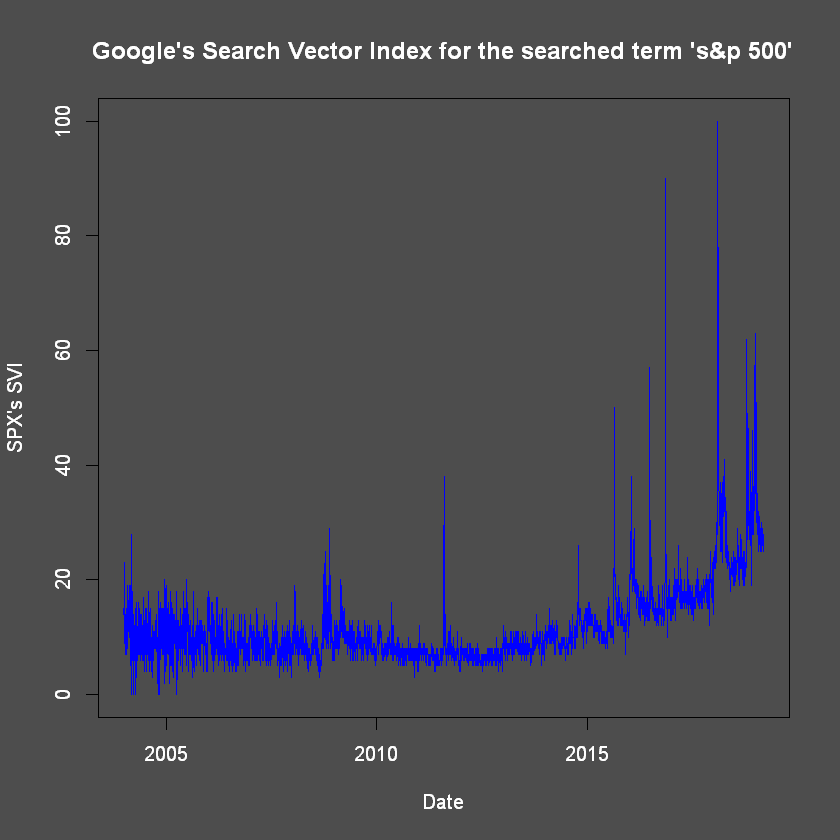

In [37]:
par(bg = "grey30", col.axis = "white", col.lab = "white", col.main = "white", col.sub = "white")
plot(SPX_SVI_zoo, xlab = 'Date', ylab = "SPX's SVI", col = "blue", type = 'l',
     main = "Google's Search Vector Index for the searched term 's&p 500'")

One can identify several key dates at peaks inthe figure above. Interestingly, it shows three peaks that did not show in [CVP](https://www.economist.com/finance-and-economics/2018/02/08/bets-on-low-market-volatility-went-spectacularly-wrong) (06/02/2018 and 09/02/2018), the days following the (more than) doubling of the fear-gauge Chicago Board Options Exchange Volatility Index (Economist (8th of Febuary 2018)); and 26/12/2018, [when tensions between the U.S. Federal Bank Chair and the Government's President were revealed as impactful](https://www.zacks.com/stock/news/344571/stock-market-news-for-dec-26-2018).

It is important to note several caveats with SVIs. First, SVI data has randomised elements so as to stop any individual form identifying any one particular person or group's internet searches.

Second, we must not forget that while Google's implementation of [caffeine](https://www.searchenginejournal.com/google-algorithm-history/caffeine-update/) (Dave Davis (2017)) on 08/06/2010 may have distorted SVI data little enough for CPV's work in 2017/2018, it may also have accumulated by 13/03/2019, rendering this dataset less consistent from year to year. To circumvent such issues, one might consider using other metrics (such as Reuters News) or splitting the sample into two (pre and post caffeine implementation).

$$ \\ $$
## Descriptive Statistics of variables

### Probability Distribution Function Plots

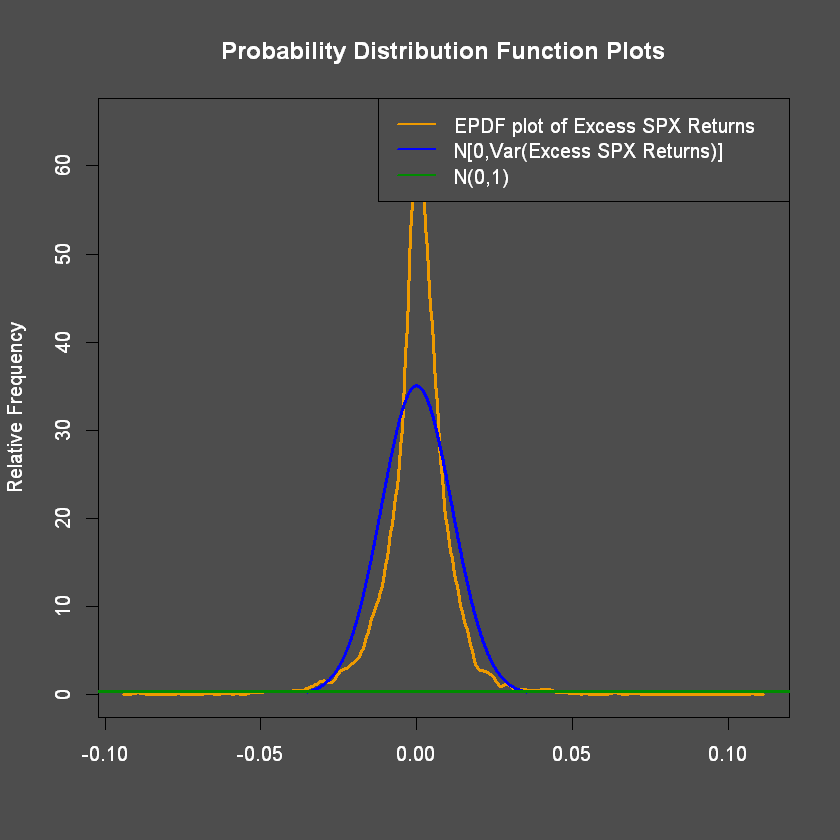

In [38]:
par(bg = "grey30", col.axis = "white", col.lab = "white", col.main = "white", col.sub = "white")
epdfPlot(as.numeric(SPX_R), main = "", xlab = "", epdf.col = "orange2")
pdfPlot(param.list = list(mean=0, sd = sd(na.omit(SPX_R))), add = TRUE, pdf.col = "blue")
pdfPlot(add = TRUE, pdf.col = "green4")
legend("topright", legend = c("EPDF plot of Excess SPX Returns", "N[0,Var(Excess SPX Returns)]", "N(0,1)"),
       col = c("orange2", "blue", "green4"), text.col = c("white"), lwd = 2 * par("cex"))
title("Probability Distribution Function Plots")

This PDF graph allows us to discern SPX_R's leptokurtoticity as anticipated by SFFR (i). One may also note the skewness that allows for the application of CDMTT's work.

$$ \\ $$
### Statistics

In [39]:
rbind(Statistics_Table("US_1MO_r_f_zoo", na.omit(US_1MO_r_f_zoo)),
      Statistics_Table("SPX_R", na.omit(SPX_R)),
      Statistics_Table("SPX_RV", SPX_RV_zoo),
      Statistics_Table("SPX_SVI", SPX_SVI), # Note that SVIFTSE_zoo's Mean is the same as 'mean(SPX_dSVI_zoo)'; after much study on the matter, it seems as though this mean and other statistics are correct, which only highlights how different seperate SVI draws can be.
      Statistics_Table("SPX_dSVI", na.omit(SPX_dSVI)))

Data_Set,Mean,Mean_of_Absolute_Values,Standard_Deviation,Median,Skewness,Kurtosis,ACF_lag_0,ACF_lag_1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US_1MO_r_f_zoo,5.797888e-07,2.085725e-05,5.064683e-05,0.000000e+00,-0.8774263,77.86414,1,0.02188150
SPX_R,2.827717e-04,7.347506e-03,1.138390e-02,6.618012e-04,-0.4009613,10.33001,1,-0.09659269
SPX_RV,7.907957e-03,7.907957e-03,6.101960e-03,6.119621e-03,3.6538825,22.38065,1,0.82340884
SPX_SVI,1.184630e+01,1.184630e+01,7.164055e+00,1.000000e+01,3.1354058,18.81460,1,0.86890496
SPX_dSVI,3.428270e-03,2.133175e+00,3.660369e+00,0.000000e+00,0.6474908,64.14817,1,-0.32774311


This statistics table allows us to discern SPX_R's leptokurtoticity again - as anticipated by SFFR (i). One may also note the skewness that allows for the application of CDMTT's work - yet again.

dSVI's ACFs also provide us with evidence that they are stationary. The concept of stationaity and its nessesity is explained in Part 2. For more on the necessity of stationary variables in research such as this one, see Verbeek (2008) Chapters 8 to 10.

Bellow, we perform an Augmented Dickey-Fuller Test:

In [40]:
print("Augmented Dickey-Fuller Test of SPX's SVI")
adf.test(matrix(SPX_SVI), nlag = NULL, output = TRUE) # Our ADF test here should show that we reject the Null Hypothesis (low p-value) in preference for the alternative of stationarity. One can see that dSVIFTSE_zoo is stationary by ploting it with:

[1] "Augmented Dickey-Fuller Test of SPX's SVI"
Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
      lag   ADF p.value
 [1,]   0 -8.13  0.0100
 [2,]   1 -5.76  0.0100
 [3,]   2 -4.55  0.0100
 [4,]   3 -3.92  0.0100
 [5,]   4 -3.69  0.0100
 [6,]   5 -3.33  0.0100
 [7,]   6 -3.05  0.0100
 [8,]   7 -2.69  0.0100
 [9,]   8 -2.41  0.0172
Type 2: with drift no trend 
      lag    ADF p.value
 [1,]   0 -16.20    0.01
 [2,]   1 -11.69    0.01
 [3,]   2  -9.32    0.01
 [4,]   3  -8.16    0.01
 [5,]   4  -7.75    0.01
 [6,]   5  -7.13    0.01
 [7,]   6  -6.62    0.01
 [8,]   7  -5.97    0.01
 [9,]   8  -5.39    0.01
Type 3: with drift and trend 
      lag    ADF p.value
 [1,]   0 -19.65    0.01
 [2,]   1 -14.38    0.01
 [3,]   2 -11.64    0.01
 [4,]   3 -10.26    0.01
 [5,]   4  -9.81    0.01
 [6,]   5  -9.05    0.01
 [7,]   6  -8.46    0.01
 [8,]   7  -7.67    0.01
 [9,]   8  -7.02    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


SVI's Augmented Dickey-Fuller (ADF) (Dickey and Fuller (1979)) tests indicate a rejection of the null in preference for the alternative of stationarity at the 99% Confidence Level (CL).

Bellow we perform a KPSS test:

In [41]:
print("KPSS Test of SPX_SVI_zoo")
kpss.test(matrix(SPX_SVI_zoo))

[1] "KPSS Test of SPX_SVI_zoo"
KPSS Unit Root Test 
alternative: nonstationary 
 
Type 1: no drift no trend 
 lag stat p.value
  14 27.2    0.01
----- 
 Type 2: with drift no trend 
 lag stat p.value
  14 9.41    0.01
----- 
 Type 1: with drift and trend 
 lag stat p.value
  14 3.26    0.01
----------- 
Note: p.value = 0.01 means p.value <= 0.01 
    : p.value = 0.10 means p.value >= 0.10 


The KPSS (Kwiatkowski–Phillips–Schmidt–Shin) tests are used for testing a null hypothesis that an observable time series is stationary around a deterministic trend against the alternative of a unit root. It similarly indicates that our SVI dataset is stationary.

As per the outlined methods, we will use the 1st difference in SVI in our models. If SVI is stationary, then dSVI is too, making it compatible with our work.

$$ \\ $$
Saving our data this far to help with de-bugging if needed: (It start with p4 as I ran debugging sessions 4 times by this point; I would advise anyone doing such a study necessitating a large amount of data computation to regularly save data progression in files using a logical naming procedure)

In [42]:
save.image(file = "IDaSRP_work_space_p4.00.01.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.01.RData")

$$ \\ $$
# Part 2: Econometric Modelling of Non-Linear Variances

## ARMA models

An AutoRegressive Moving Average model of order $p$ and $q$ (ARMA($p,q$)) represents $y_t$ in terms of $p$ of its own lags and $q$ lags of a white noise process such that:

$$\begin{align}
    y_t &= c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \epsilon_t + \psi_1 \epsilon_{t-1} + \psi_2 \epsilon_{t-2} + ... + \psi_q \epsilon_{t-q} \\
    y_t &= c + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right)  \\
    y_t - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) &= c + \epsilon_t + \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \\
    y_t - \phi_1 y_{t-1} - \phi_2 y_{t-2} - ... - \phi_p y_{t-p} &= c + \epsilon_t + \psi_1 \epsilon_{t-1} + \psi_2 \epsilon_{t-2} + ... + \psi_q \epsilon_{t-q} \\
    y_t \left( 1 - \phi_1 L^1 - \phi_2 L^2 - ... - \phi_p L^{p} \right) &= c + \epsilon_t \left( 1 + \psi_1 L^1 + \psi_2 L^2 + ... + \psi_q L^{q} \right) \\
    \label{eq:ARMApq} \tag{1} y_t \left( 1 - \sum_{i=1}^{p}\phi_i L^{i} \right) &= c + \epsilon_t \left( 1 + \sum_{j=1}^{q} \psi_j L^{j} \right)
\end{align}$$

where $L$ is the Lag opperator such that $x_t L^i = x_{t-i} $ $ \forall $  $ x, t, i \in \mathbb{R}$.


It is important to note that due to the fact that we use $p$ autoregressive and $q$ moving average componants, we use $p$ lags of our dependent variable - $y$ - and $q$ lags of our error term - $\epsilon$. This means that the first forecast produced by an ARMA($p,q$) model must use at least $max(p,q)$ lags and we thus loose these observations from our observation data-set.
\
$\textbf{Example:}$ Let $p = 2$ and $q = 3$, then

$$\begin{align}
    y_t &= c + \left( \sum_{i=1}^{2}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{3} \psi_j \epsilon_{t-j} \right) \\
    y_t - \left( \sum_{i=1}^{2}\phi_i y_{t-i} \right) &= c + \epsilon_t + \sum_{j=1}^{3} \psi_j \epsilon_{t-j} \\
    y_t - \phi_1 y_{t-1} - \phi_2 y_{t-2} &= c + \epsilon_t + \psi_1 \epsilon_{t-1} + \psi_2 \epsilon_{t-2} + \psi_q \epsilon_{t-3} \\
    y_t \left( 1 - \phi_1 L^1 - \phi_2 L^2 \right) &= c + \epsilon_t \left( 1 + \psi_1 L^1 + \psi_2 L^2 \psi_q L^{3} \right) \\
    y_t \left( 1 - \sum_{i=1}^{2}\phi_i L^{i} \right) &= c + \epsilon_t \left( 1 - \sum_{j=1}^{3} \psi_j L^{j} \right)
\end{align}$$


### ARMA models' Stationarity

Now we can see that \eqref{eq:ARMApq} can be re-written such that

$$\begin{align}
    y_t \left( 1 - \sum_{i=1}^{p}\phi_i L^{i} \right) &= c + \epsilon_t \left( 1 + \sum_{j=1}^{q} \psi_j L^{j} \right) \\
    y_t \Phi_p(L) &= c + \epsilon_t \Psi_q(L)
\end{align}$$

where the AR (AutoRegressive) component of our model is encapsulated in $\Phi_p(z) \equiv (1 - \sum_{i=1}^{p}\phi_i z^{i})$ and the MA (Moving Average)'s in $\Psi_q(z) \equiv (1 + \sum_{j=1}^{q} \psi_j z^{j})$  $\forall p,q,z \in \mathbb{R}$. From there, we can see that

$$\begin{align}
    y_t &= \frac{c + \epsilon_t \Psi_q(L)}{\Phi_p(L)} \\
    y_t &= \frac{c}{\Phi_p(L)} + \frac{\epsilon_t \Psi_q(L)}{\Phi_p(L)}
\end{align}$$

$c$ is just an arbitrary constant, so we can use an arbitrary $c_{_{\Psi}}$ for $\frac{c}{\Psi_q(L)}$ such that:

$$\begin{align}
    y_t &= c_{_{\Psi}} + \epsilon_t \frac{\Psi_q(L)}{\Phi_p(L)} \\
    &= c_{_{\Psi}} + \epsilon_t \Psi_q(L) \frac{1}{\Phi_p(L)} \\
    &= c_{_{\Psi}} + \epsilon_t \Psi_q(L) \frac{1}{1 - \phi_1 L^1 - \phi_2 L^2 - ... - \phi_p L^p}
\end{align}$$

$\\ $

#### N.B.: Taylor's expansion

By Tylor's expansion, $\frac{1}{1 - x} = \sum_{n=0}^{∞}{x^n}$, thus $\frac{1}{1 - x} \rightarrow ∞ \text{ if } \begin{Bmatrix} x > 1 & \text{if } x \in \mathbb{R} \\ x \text{ lies outside the unit circle } & \text{if } x \in \mathbb{Z} \end{Bmatrix}$.

$\textbf{Example 1:}$ The last equality only applies thanks to Taylor's expansion:
$$\begin{equation}
    \frac{1}{\Phi_1(L)} = \frac{1}{1 - \phi_1 L^1} = \sum_{n=0}^{∞}{(\phi_1 L)^n}
\end{equation}$$

$\textbf{Example 2:}$ The last equality only applies thanks to Taylor's expansion:
$$\begin{equation}
    \frac{1}{\Phi_p(L)} = \frac{1}{1 - \phi_1 L^1 - \phi_2 L^2 - ... - \phi_p L^p} = \frac{1}{1 - (\phi_1 L^1 + \phi_2 L^2 + ... + \phi_p L^p)} = \sum_{n=0}^{∞}{(\phi_1 L^1 + \phi_2 L^2 + ... + \phi_p L^p)^n}
\end{equation}$$
similarly to how
$$\begin{equation}
    \frac{1}{\Phi_p(L)} = \frac{1}{1 - \sum_{i=1}^{p}\phi_i L^{i}} = \sum_{n=0}^{∞}{\left(\sum_{i=1}^{p}\phi_i L^{i} \right)^n}
\end{equation}$$

Thus, $\forall (\sum_{i=1}^{p}\phi_i L^{i})$ lying outside the unit circle, we end up with $\frac{1}{\Phi_p(L)} \rightarrow ∞$; *i.e.*:

$ \\ $

<ins> An AR process is called **stationary** if the roots of its equation $ \Phi_p(z)$ ( denoted with a star: $z^*$ ) lie outside the unit circle </ins>


In practice, an ARMA($p$, $q$) model (${y_t \Phi_p(L) = c + \epsilon_t \Psi_q(L)}$) is stationary if its AR part ($\Phi_p(L)$) is stationary, which itself only occurs if its roots lie outside the unit circle (i.e.: ${|z^*| > 1}$). More explicitly, for $\Phi_p(z)$:

$$\begin{align}
    \Phi_p(z) &= 0 \\
    1 - (\phi_1 z^1 + \phi_2 z^2 + ... + \phi_p z^p) &= 0 \\
    \label{eq:roots}\phi_1 z^1 + \phi_2 z^2 + ... + \phi_p z^p &= 1 \tag{2}
\end{align}$$

The z value abiding by \eqref{eq:roots} are its roots, ${|z^*|}$, and there often are more than one. As long as they are all greater than one, then the process is stationary.

$\textbf{Example:}$ For AR(1) processes, (i.e.: when $p = 1$)
$$\begin{align}
    \Phi_1(z) &= 0 \\
    1 - \phi_1 z^1 &= 0 \\
    \phi_1 z &= 1 \\
    z &= \frac{1}{\phi_1} \\
\end{align}$$
\
Then the modulus is simply the absolute value; and so ${|z^*| > 1}$ if ${\phi_1 < 1}$, by extention: when $\sum_{i=1}^{p}\phi_i L^{i}$ is lying inside the unit circle, $\frac{1}{\Phi_p(L)}$ is finite (or, with notational abuse: $\frac{1}{\Phi_p(L)} < ∞$).

$$ \ $$
### Generic ARMA(p,q) model Estimation

#### Method of parameter estimation

In this study, we will use the Maximum Likelihood method of estimation of our unknown parameters.

The log likelihood function of independantly and identically distributed $y$ variables is defined as $L_T(\Theta) \equiv \prod_{t=1}^T{f(y_t|y_{1}, y_{2}, ... , y_{t}; \Theta)}.$ It is often normalised (without loss of information or generalisation) by $T$ such that $L_T(\Theta) \equiv \frac{1}{T} \prod_{t=1}^T{f(y_t|y_{1}, y_{2}, ... , y_{t}; \Theta)}.$

#### Likelyhood function with normally, identically and independently distributed independent-variables and only with known parameters $\Theta = $[${\mu, \sigma^2}$]

Asumming independently and normaly distributed independent variables {$y_t$}$^T_1$, i.e.: assuming that ${y_t \stackrel{iid}{\sim} N \left( \mu, \sigma^2 \right)}$, then - with known parameters $\Theta = $[${\mu, \sigma^2}$]:

$$\begin{array}{ll}
    f(y_t;\Theta) = \frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right]
        &
        & \text{where $exp[\cdot] \equiv e^{[\cdot]}$, since ${y_t \sim N(\mu, \sigma^2)}$}, \\
    \prod_{t=1}^T{f(y_t|y_1;\Theta)} = \prod_{t=1}^T{f(y_t|y_{t-1}, y_{t-2}, ... , y_{1}; \Theta) } = \prod_{t=1}^T{\frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right]}
        &
        & \text{due to the independance in $y_t$'s distributions ${ \left( \text{i.e.: }  y_t \stackrel{\textbf{iid}}{\sim} N(\mu, \sigma^2) \right) }$,} \\
    L_T(\Theta) = \prod_{t=1}^T{\frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right]}
        &
        & \text{since the likelihood function is } L_T(\Theta) \equiv \prod_{t=1}^T{f(y_t|y_{1}, y_{2}, ... , y_{t}; \Theta)}.
\end{array}$$

Then, we define the log-likelihood functin as ${ln[ L_T(\Theta) ]}$ such that:
$$\begin{align}
    ln[ L_T(\Theta) ] \equiv ln[ f(y_T|y_{T-1}, y_{T-2}, ... , y_{1}; \Theta) ] &= ln \left( \prod_{t=1}^T{\frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right]} \right) \\
    &= ln \left[ \prod_{t=1}^T{f(y_t;\Theta)} \right] \\
    &= \sum_{t=1}^T{ln [ f(y_t;\Theta) ] } \\
\end{align}$$

Without loss of generality, and to take an individualistic aproach - normalising by $T$, we can write

$$\begin{align}
    ln[ L_T(\Theta) ] &= \frac{1}{T} \sum_{t=1}^T{ln [ f(y_t;\Theta) ] } \\
    &= \frac{1}{T} \sum_{t=1}^T{ln \left( \frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right] \right) } \\
    &= \frac{1}{T} \sum_{t=1}^T{ln \left( \left[2 \pi \sigma^2 \right]^{ - \frac{1}{2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right] \right) } \\
    &= \frac{1}{T} \sum_{t=1}^T{ \left[ - \frac{1}{2} ln(2 \pi) - \frac{1}{2} ln \left( \sigma^2 \right) - \frac{(y_t - \mu)^2}{2 \sigma^2} \right]} \\
    &= - \frac{1}{2} ln(2 \pi) - \frac{1}{2} ln \left( \sigma^2 \right) - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ (y_t - \mu)^2} \\
\end{align}$$

$ \\ $
#### With unknown parameters

We may have situations where we do not know all the parameters in $\Theta$ (which, as a reminder, previously was [${\mu, \sigma^2}$]). Then, we may estimate it as:

$
\begin{equation}
    { \hat{\Theta} = \stackrel{\Theta}{arg max} ln[L_T(\Theta)]}.
\end{equation}
$

There, the notation $\stackrel{x}{arg max} f(x)$ denotes 'the value of $x$ maximising the function $f(x)$', *i.e.*: $\hat{\Theta} = \stackrel{\Theta}{arg max}[f(\Theta)]$ denotes 'the value of $\Theta$ maximising the function $f(\Theta)$'.

$ \\ $

#### With normally, identically and independently distributed independent-variables and unknown ARMA parameters (i.e.: $\Theta = $[${c, \phi_1, ... , \phi_p, \psi_1, ... , \psi_q, \sigma^2}$])


The assumption of 'normally, identically and independently distributed independent-variables' translates to: $ \epsilon_t \stackrel{\textbf{iid}}{\sim} N \left( 0, \sigma^2 \right) $, which itself implies that $ \epsilon_{t \vert t-1} \sim N \left( 0, \sigma^2 \right) $


We may define our (fixed but) unknown parameters as $\Theta = \left[ {c, \phi_1, ... , \phi_p, \psi_1, ... , \psi_q, \sigma^2}\right]$ and estimate them as $\hat{\Theta} = \left[ {\hat{c}, \hat{\phi_1}, ... , \hat{\phi_p}, \hat{\psi_1}, ... , \hat{\psi_q}, \hat{\sigma^2}} \right]$:



$$\begin{array}{ll}
    \hat{\Theta}
    &
    = \stackrel{\Theta}{arg max} ln[L_T(\Theta)]
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
                - \frac{ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ (y_t - \mu)^2}
        \right]
    &
    \text{since } ln[L_T(\Theta)] =
        \left[
            - \frac{ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ (y_t - \mu)^2}
        \right]
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ (y_t -
                    \mathbb{E} \left( y_t \vert y_{t-1} \right)
                )^2}
        \right]
    & {\text{since $\mu = \mathbb{E} \left( y_t \vert y_{t-1} \right)$ and where $ \vert $ is the standard notation for 'knowing'} \\ \text{Here we only look at conditional Likelihood.}}
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                        y_t - \mathbb{E} \left[
                            c + \left(
                                \sum_{i=1}^{p}\phi_i y_{t-i}
                                \right) \\
                            + \epsilon_t + \left(
                                \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                            \right)
                        \vert y_{t-1} \right]
                \right)^2
            }
        \right]
    & \text{since } y_t = c + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right)
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                        y_t - \left[
                            \mathbb{E}(c \vert y_{t-1} ) + \left(
                                \sum_{i=1}^{p} \mathbb{E}( \phi_i y_{t-i} \vert y_{t-1})
                            \right) \\ + \mathbb{E}(\epsilon_t \vert y_{t-1} ) + \left(
                                \sum_{j=1}^{q} \mathbb{E} (\psi_j \epsilon_{t-j} \vert y_{t-1} )
                            \right)
                        \right]
                \right)^2
            }
        \right]
    & \text{since the Expectation of summs is the sum of Expectations}
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                    y_t -  c + \left(
                        \sum_{i=1}^{p}\phi_i y_{t-i}
                    \right) \\
                    + \mathbb{E}(\epsilon_t \vert y_{t-1} ) + \left(
                        \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                    \right)
                \right)^2
            }
        \right]
    & \text{since only } \epsilon_t \text{ is random in } y_t \text{ (knowing } y_{t-1}\text{)}
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                    y_t -  c + \left(
                        \sum_{i=1}^{p}\phi_i y_{t-i}
                    \right) \\
                    + 0 + \left(
                        \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                    \right)
                \right)^2
            }
        \right]
    & \text{since } \mathbb{E}(\epsilon_t \vert y_{t-1} ) = \mathbb{E}(\epsilon_{t \vert t-1} ) = 0 \text{, since } \epsilon_t \sim N \left( 0, \sigma^2 \right)
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                    c + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \\ -  c + \left(
                        \sum_{i=1}^{p}\phi_i y_{t-i}
                    \right)
                    + \left(
                        \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                    \right)
                \right)^2
            }
        \right]
    & \text{since } y_t = c + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right)
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{\epsilon_t^2
            }
        \right]
    & \text{rearanging}
\end{array}$$

Thus:

$$
\begin{array}{ll}
\hat{\Theta} &= \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ \left(
                    {\left[ y_t - c - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) - \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \right]}^2
                \right)}
        \right] \\
\hat{\Theta} &= \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ \left(
                    \left[ y_t - c - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) - \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \right]
                    \left[ y_t - c - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) - \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \right]
                \right)}
        \right] \\
&= \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ \left[
                {y_t}^2 - y_t c - y_t \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) - y_t \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \\
                - c y_t + c^2 + c \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) + c \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \\
                - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) {y_t} + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) c +  {\left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)}^2 + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \\
                - \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) {y_t} + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) c + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) + {\left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right)}^2 \right] }
        \right] \\
&= \stackrel{\Theta}{arg max}
    \left[
        - \frac{ln(2 \pi)}{2}
        - \frac{ln \left( \sigma^2 \right)}{2}
        - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
            \left[ {y_t}^2 - 2 y_t c
                - 2 y_t \left(
                    \sum_{i=1}^{p}\phi_i y_{t-i}
                \right)
                - 2 y_t \left(
                    \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                \right) \\
                + c^2
                + 2 c \left(
                    \sum_{i=1}^{p}\phi_i y_{t-i}
                \right)
                + 2 c \left(
                    \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                \right) \\
                + {
                    \left(
                        \sum_{i=1}^{p}\phi_i y_{t-i}
                    \right)
                }^2
                + 2 \left(
                    \sum_{i=1}^{p}\phi_i y_{t-i}
                \right)
                \left(
                    \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                \right) \\
                + {
                    \left(
                        \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                    \right)
                }^2
            \right]
        }
    \right]
\end{array}
$$

$ \\ $

N.B.: The **Chain Rule** states that:

if $f$ and $g$ are both differntiatable and $F(x)$ is the composite funcition defined by $F(x) = f(g(x))$, then $F$ is diferentiatable and its 1st derivative (i.e.: $F'$) is given by the product:

$$
F'(x) = f'(g(x))g'(x)
$$

To maximise $- \frac{ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{\epsilon_t^2}$  with respect to $\Theta$, we differentiate with respect to $\Theta$ and equate it to $0$, this is known as **First Order Condition** maximisation; thus:

$ \\ $
##### First Order Condition with Respect to $c$

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\Theta)]}{\delta c} &=
- \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[
        - 2 y_t + 2 c
        + 2 \left(
            \sum_{i=1}^{p}\phi_i y_{t-i}
        \right)
        + 2 \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&=
- \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ 2
    \left[
        - y_t + c
        + \left(
            \sum_{i=1}^{p}\phi_i y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&=
- \frac{2}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[
        - y_t + c
        + \left(
            \sum_{i=1}^{p}\phi_i y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&=
- \frac{1}{\sigma^2 T} \sum_{t=1}^T{
    \left[
        - y_t + c
        + \left(
            \sum_{i=1}^{p}\phi_i y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

by **FOC**, $\Theta = \widehat{\Theta}$ when $\frac{\delta ln[L_T(\Theta)]}{\delta c} = 0$, therefore $\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{c}} = 0$, and:

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{c}} = 0 &=
- \frac{1}{\widehat{\sigma^2} T} \sum_{t=1}^T{
    \left[
        - y_t + \widehat{c}
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} & \\
&=
- \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t + \widehat{c}
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} & \text{multiplying both sides by } \widehat{\sigma^2} \\
&= - \frac{T \widehat{c}}{T}
- \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} & \\
&= - \widehat{c}
- \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

then:

$$
\begin{array}{ll}
\widehat{c} &= - \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

$ \\ $
##### First Order Condition with Respect to $\phi_i$

The notation here might seem a litle confusing, but it is actually ergonomic. We are going to investigate the $ln[L_T(\Theta)]$ function with respect to any one $\phi_i$ for any applicable $i$. The bellow is thus for any one applicable $i$:

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\Theta)]}{\delta \phi_i}
&= - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[- 2 y_t y_{t-i}
        + 2 c y_{t-i}
        + 2 {
            \left(
                \sum_{k=1}^{p}\phi_k y_{t-k}
            \right)
        } y_{t-i}
        + 2  y_{t-i} \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&= - \frac{2}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[- y_t y_{t-i}
        + c y_{t-i}
        + {
            \left(
                \sum_{k=1}^{p}\phi_k y_{t-k}
            \right)
        } y_{t-i}
        + y_{t-i} \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&= - \frac{1}{\sigma^2 T} \sum_{t=1}^T{
    \left[- y_t y_{t-i}
        + c y_{t-i}
        + {
            \left(
                \sum_{k=1}^{p}\phi_k y_{t-k}
            \right)
        } y_{t-i}
        + y_{t-i} \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

by **FOC**, $\Theta = \widehat{\Theta}$ when $\frac{\delta ln[L_T(\Theta)]}{\delta \phi_i} = 0$, therefore $\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \phi_i} = 0$, and (again, for any applicable $i$) :

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{\phi_i}} = 0 &= - \frac{1}{\widehat{\sigma^2} T} \sum_{t=1}^T{
    \left[- y_t y_{t-i}
        + \widehat{c} y_{t-i}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        } y_{t-i}
        + y_{t-i} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} \\
&= \sum_{t=1}^T{
    \left[- y_t y_{t-i}
        + \widehat{c} y_{t-i}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        } y_{t-i}
        + y_{t-i} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} \\
&= \sum_{t=1}^T{ y_{t-i}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        }
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

$ \\ $
##### First Order Condition with Respect to $\psi_j$

The notation here might seem a litle confusing, but it is actually ergonomic. We are going to investigate the $ln[L_T(\Theta)]$ function with respect to any one $\psi_j$ for any applicable $j$. The bellow is thus for any one applicable $j$:

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\Theta)]}{\delta \psi_j}
&= - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[- 2 y_t \epsilon_{t-j}
        + 2 c \epsilon_{t-j}
        + 2 {
            \left(
                \sum_{i=1}^{p}\phi_i y_{t-i}
            \right)
        } \epsilon_{t-j}
        + 2 \left(
            \sum_{k=1}^{q} \psi_k \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
} \\
&= - \frac{2}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[- y_t \epsilon_{t-j}
        + c \epsilon_{t-j}
        + {
            \left(
                \sum_{i=1}^{p}\phi_i y_{t-i}
            \right)
        } \epsilon_{t-j}
        + \left(
            \sum_{k=1}^{q} \psi_k \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
} \\
&= - \frac{1}{\sigma^2 T} \sum_{t=1}^T{
    \left[- y_t \epsilon_{t-j}
        + c \epsilon_{t-j}
        + {
            \left(
                \sum_{i=1}^{p}\phi_i y_{t-i}
            \right)
        } \epsilon_{t-j}
        + \left(
            \sum_{k=1}^{q} \psi_k \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
}
\end{array}
$$

by **FOC**, $\Theta = \widehat{\Theta}$ when $\frac{\delta ln[L_T(\Theta)]}{\delta \psi_j} = 0$, therefore $\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \psi_j} = 0$, and (again, for any applicable $j$) :

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{\psi_j}} = 0 &= - \frac{1}{\widehat{\sigma^2} T} \sum_{t=1}^T{
    \left[- y_t \epsilon_{t-j}
        + \widehat{c} \epsilon_{t-j}
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        } \epsilon_{t-j}
        + \left(
            \sum_{k=1}^{q} \widehat{\psi_k} \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
} \\
&= \sum_{t=1}^T{
    \left[- y_t \epsilon_{t-j}
        + \widehat{c} \epsilon_{t-j}
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        } \epsilon_{t-j}
        + \left(
            \sum_{k=1}^{q} \widehat{\psi_k} \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
} \\
&= \sum_{t=1}^T{ \epsilon_{t-j}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }
        + \left(
            \sum_{k=1}^{q} \widehat{\psi_k} \epsilon_{t-k}
        \right)
    \right]
}
\end{array}
$$

$ \\ $
##### First Order Condition with Respect to $\sigma^2$

Letting

$$
S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j}) = 
\sum_{t=1}^T {
    \left[
        {y_t}^2 - 2 y_t \widehat{c}
        - 2 y_t \left(
        \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        - 2 y_t \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + \widehat{c}^2
        + 2 \widehat{c} \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + 2 \widehat{c} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }^2
        + 2 \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + {
        \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
        }^2
    \right]
}
$$

then:

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\Theta)]}{\delta \sigma^2}
&= - \frac{1}{2 \sigma^2} + \frac{1}{2 {\left( \sigma^2 \right)}^2 T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j})
\end{array}
$$

Note that the $+$ in $+ \frac{1}{2 {\left( \sigma^2 \right)}^2 T}$ comes from the differential of $- \frac{1}{2 \sigma^2 T}$, *i.e.*: of $- \frac{(\sigma^2)^{-1}}{2 T}$ 

by **FOC**, $\Theta = \widehat{\Theta}$ when $\frac{\delta ln[L_T(\Theta)]}{\delta \sigma^2} = 0$, therefore $\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \sigma^2} = 0$, and:

$
\begin{array}{ll}
\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{\sigma^2}} = 0
&= - \frac{1}{2 \widehat{\sigma^2}} + \frac{1}{2 {\left( \widehat{\sigma^2} \right)}^2 T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j})
\end{array}
$

Thus:

$
\begin{array}{ll}
\frac{1}{2 \widehat{\sigma^2}}
&= \frac{1}{2 {\left( \widehat{\sigma^2} \right)}^2 T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j})
\end{array}
$

then:

$
\begin{array}{ll}
\frac{1}{\widehat{\sigma^2}} &= \frac{1}{{\left( \widehat{\sigma^2} \right)}^2 T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j})
\end{array} $

then:

$$
\begin{array}{ll}
\widehat{\sigma^2} &= \frac{1}{T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j}) \\
&= \frac{1}{T} \sum_{t=1}^T {
    \left[
        {y_t}^2 - 2 y_t \widehat{c} - 2 y_t \left(
        \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) - 2 y_t \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\ + \widehat{c}^2 + 2 \widehat{c} \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) + 2 \widehat{c} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\ + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }^2 + 2 \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\ + {
        \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
        }^2
    \right]
} \\
\end{array}
$$

$ \\ $
##### First Order Conditions
Resuming; our FOC equations produced:

$$
\begin{equation}
\widehat{c} = - \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
\end{equation}
$$

$$ \\ $$

$$\begin{align}
0 = \sum_{t=1}^T{ y_{t-i}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        }
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
& \text{   for all } i \leq p
\end{align}$$

$$ \\ $$

$$\begin{align}
0 = \sum_{t=1}^T{ \epsilon_{t-j}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }
        + \left(
            \sum_{k=1}^{q} \widehat{\psi_k} \epsilon_{t-k}
        \right)
    \right]
}
& \text{   for all } j \leq q
\end{align}$$

$$ \\ $$

$$
\begin{equation}
\widehat{\sigma^2} = \frac{1}{T} \sum_{t=1}^T {
    \left[
        {y_t}^2 - 2 y_t \widehat{c} - 2 y_t \left(
        \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) - 2 y_t \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + \widehat{c}^2 + 2 \widehat{c} \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) + 2 \widehat{c} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }^2
        + 2 \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + {
        \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
        }^2
    \right]
} \\
\end{equation}
$$

From there one can only compute the parameters numerically. It does not look like it due to the large amounts of substitutions that would be required but these FOC equations offer a closed system solvable itteratively from the data we have. Remember that the data we have consist of $y_t, y_{t-1}, ... , y_1, \epsilon_{t-1}, \epsilon_{t-2}, ..., \epsilon_{1}$, *i.e.*: everything without a hat.

$$ \\ $$
## GARCH models

### Modelling Level Changes

Let $\{R_t\}_{t \in \mathbb{Z}}$ be the level change in index excess return such that (i.e.: $\textbf{:}$) $R_t \in \mathbb{R}$ at time $t$. Then one may attempt to encapsulate the movement in $R_t$ via the discrete-time stochastic process
$$\begin{equation}
    \label{eq:AR1} R_t = C + \phi_1 R_{t-1} + \epsilon_t \tag{3}
\end{equation}$$
where $C \in \mathbb{R}$ is an unknown constant, $\phi_1$ is the cofactor of the regressor $R_{t-1}$ - the 1$^{st}$ lag of $R_{t}$, and the error term $\epsilon_{t} \stackrel{iid}{\sim} N(0,\sigma^2)$ has standard deviation $\sigma \in \mathbb{R}$. This is an AR process of order one - AR(1). It is then easy to incorporate SVI - enabling us to study its effect on $R_t$ - with the cofactor $\phi_2 \in \mathbb{R}$ via the AR(1)-SVI model:
$$\begin{equation}
    \label{eq:AR1SVI} R_t = C + \phi_1 R_{t-1} + \phi_2 \Delta SVI_{t-1} + \epsilon_t \text{ .} \tag{4}
\end{equation}$$

These two models will be used throughout this article to model the level change in index excess returns.

### Modelling Non-Linear Variances

#### ARCH Models

As aforementioned, the lack of time-dependence in $\sigma$ results in the AR(1) model outlined in the above AR(1) Equation \ref{eq:AR1} and \ref{eq:AR1SVI} failing to represent SFFR (iii). To account for this heteroscedasticity, ARCH models of order $q \in \mathbb{Z}$ where $q > 0$ can be used. These ARCH($q$) models  render $\sigma$ into time-dependent $\sigma_{t}$ $\textbf{:}$ $\epsilon_t \stackrel{iid}{\sim} N(0,\sigma^2_{t})$. To do so, let $\Omega_t$ denote the information set at time $t$; let the conditional mean and variance of $R_{t+1}$ respectively be $\mu_{t+1|t} = E(R_{t+1} | \Omega_{t})$ and  $\sigma_{t+1|t}^2 = Var(R_{t+1} | \Omega_t)$ where $E$ and $Var$ are respectively the expectation and variance operators; let

$$\begin{equation}
    \epsilon_t = \sigma_{t|t-1} \eta_t
\end{equation}$$

where $\eta_t$ is independent from $\Omega_t$ and $\eta_t \stackrel{iid}{\sim} N(0,1)$; and let

$$\begin{equation}
    \sigma_{t|t-1}^2 = c + \sum_{i=1}^{q}\alpha_i \epsilon_{t-i}^2
\end{equation}$$

where $c,\alpha_i \in \mathbb{R}$, $c>0$ and $\alpha_i \geq 0 \quad \forall i=(1,2,...,q)$ to allow only for positive - thus valid - variances.


Several expansions were applied to the ARCH model; the ones of interest here are namely the GARCH, GJRGARCH and EGARCH models of order one.

$$ \\ $$

#### GARCH models

GARCH(1,1) account for SFFR (iv) and (v) in addition to (iii) and non-normal unconditional distributions in levels, which works in parallel with SFFR (i). To do so, an MA component is added to the ARCH(1):

$$\begin{equation}
    \sigma_{t|t-1}^2 = c + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2
\end{equation}$$

where elements are as aforementioned, $\beta \in \mathbb{R}$ is positive and in this specific case: $(\alpha + \beta) < 1$ for stationarity. I implement the SVI factor with positive $\delta \in \mathbb{R}$ - enabling us to study its effect on $R_t$'s variance - via:

$$\begin{equation}
    \sigma_{t|t-1}^2 = c + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2 + \delta \Delta SVI_{t-1}
\end{equation}$$

Whilst GARCH models are a natural fit in this study by the virtues mentioned, “*in general, models that incorporate volatility asymmetry such as EGARCH and GJR-GARCH perform better*” (Poon and Granger (2003), p.507). Indeed, GARCH models cannot account for SFFR (v) of leverage effects, whereas GJRGARCH and EGACH models may; CPV therefore considered them too - as do I. The thicker bottom left tail of the Empirical Probability Distribution Functions (EPDFs) suggest such leverage effects.

$$ \\ $$

#### GJRGARCH Models

GJRGARCH models account for asymmetry (SFFR (i)) via the last summand in

$$\begin{equation}
    \sigma_{t|t-1}^2 = c + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-i}^2 + \gamma I(\epsilon_{t-1}<0) \epsilon_{t-1}^2
\end{equation}$$

and second to last in
$$\begin{equation}
    \sigma_{t|t-1}^2 = c + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2 + \gamma I(\epsilon_{t-1}<0) \epsilon_{t-1}^2 + \delta \Delta SVI_{t-1}
\end{equation}$$
where a leverage case would result in $\gamma > 0$, and $I(\cdot)$ is the indicator function returning $1$ if its bracketed statement is true, $0$ otherwise - in this case:

$$\begin{equation}
    I(\epsilon_{t-1}<0) = \begin{Bmatrix} 1 & \text{if } \epsilon_{t-1}<0 \\ 0 & \text{otherwise} \end{Bmatrix} .
\end{equation}$$

$$ \\ $$

#### EGARCH Models

The use of the logarithm function insures non-negativity in EGARCH models

$$\begin{equation}
    ln(\sigma_{t|t-1}^2) = c + \alpha \Bigg[ \frac{|\epsilon_{t-1}|}{\sigma_{t-1}} - \sqrt{\frac{2}{\pi}} \Bigg] +  \beta ln(\sigma_{t-1}^2) + \gamma \frac{\epsilon_{t-1}}{\sigma_{t-1}}
\end{equation}$$

and

$$\begin{equation}
    ln(\sigma_{t|t-1}^2) = c + \alpha \Bigg[ \frac{|\epsilon_{t-1}|}{\sigma_{t-1}} - \sqrt{\frac{2}{\pi}} \Bigg] +  \beta ln(\sigma_{t-1}^2) + \gamma \frac{\epsilon_{t-1}}{\sigma_{t-1}} + \delta \Delta SVI_{t-1}
\end{equation}$$

where  ln($\cdot$) and |$\cdot$| denote the logarithm base $e$ and the absolute value functions respectively and where $c, \alpha, \beta, \gamma \in \mathbb{R}$ are not constrained $\textbf{: } c + \alpha + \beta + \gamma > 0$ . If $Var(R_t|\Omega_{t-1})$ and $R_t$ react negatively to each other, $\beta$ would be negative, and *vice versa*.

$$ \ $$
#### Generic ARMA(p,q)-Non-Linear-Variance model Estimation

ARMA(p,q)-GARCH(P,Q), ARMA(p,q)-GJRGARCH(P,Q) and ARMA(p,q)-EGARCH(P,Q) models' estimates can be computed via the same method as the generic ARMA(p,q) model above, but substituting in the modeled value for $\sigma_{t|t-1}^2$. This would then be a (Conditional) Quazi Maximum Likelihood estimation method where (assuming normality in the errors):

$$
L_T(\Theta) = \prod_{t=1}^T{\frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right]}
$$

where $\sigma^2$ is recursively computed $\forall t \geq 1$ as dictated by the non-linear variance model GARCH(P,Q), GJRGARCH(P,Q) or EGARCH(P,Q).

$$ \\ $$

$$ \\ $$

#### Error Functions

To asses the accuracy of volatility and positive sign probability forecasts, this sub-section specifies error functions.

Variance forecasts from the models GARCH to EGARCH-SVI are simply compared against realised volatilities to compute variance forecast errors as
$$ \hat{\sigma}_{t|t-1} - RV_t \text{ .}$$


Sign forecast errors are computed as 

$$\begin{equation} \label{eq:SignForecastErrors}
\hat{\pi}_{t+1}^{j} - \mathbb{P}(R_{t+1} > 0 | \Omega_{t \textbf{+1}})
\end{equation}$$

where $j = (C\&D_M,  Naive)$, and where $M$ can be replaced by a model name ranging from GARCH to EGARCH-SVI (Note the bold `$+1$' in $\Omega_{t \textbf{+1}}$ here to emphasise how $\mathbb{P}(R_{t+1}>0|\Omega_{t \textbf{+1}})=I(R_{t+1}>0)$.) and also where:

#### Naïve Framework

A Naïve model of sign change is used as a benchmark to construct comparisons. It is formulated as
$$ \hat{\pi}_{t+1}^{Naive} = \hat{\mathbb{P}}_{Naive}(R_{t+1|t}>0) = \frac{1}{t} \sum_{k=1}^{t} I (R_k > 0) \text{ .}$$

$ \ $
### Part 2 References

P.S.: Plenty of help on MLE can be foud on:

http://www.science.unitn.it/AnalisiInfoTLC/SSP/SSP14_15/lectures/lecture14.pdf

https://faculty.washington.edu/ezivot/econ584/notes/armaestimation.pdf

https://pdfs.semanticscholar.org/e3f5/90f5614a25b688c3d8bea67aad21c6840bc0.pdf

https://stats.stackexchange.com/questions/349214/some-aspects-of-maximum-likelihood-estimation-of-garchp-q-model

http://fmwww.bc.edu/repec/sce2004/up.27698.1075991479.pdf

http://www.math.chalmers.se/~palbin/dongthesis.pdf

https://www.youtube.com/watch?v=ul3u2yLPwU0

https://dachxiu.chicagobooth.edu/download/NGQMLE.pdf

https://rady.ucsd.edu/faculty/directory/valkanov/pub/classes/mfe/docs/lecture6_2010.pdf

https://stats.stackexchange.com/questions/35488/conditional-maximum-likelihood-estimation-for-armap-q

https://jeanmariedufour.github.io/ResE/Dufour_2008_C_TS_ARIMA_Estimation.pdf

http://www.real-statistics.com/time-series-analysis/autoregressive-processes/autoregressive-processes-basic-concepts/autoregressive-process-proofs/

https://www.real-statistics.com/time-series-analysis/autoregressive-processes/autoregressive-processes-basic-concepts/

https://msu.edu/~baillie/822/MLE.pdf

https://www.real-statistics.com/time-series-analysis/arma-processes/arma-coefficients-maximum-likelihood/

http://www.maths.qmul.ac.uk/~bb/TimeSeries/TS_Chapter6_3_3.pdf

http://www.phdeconomics.sssup.it/documents/Lesson12.pdf

https://math.berkeley.edu/~btw/thesis4.pdf

https://pdfs.semanticscholar.org/9e19/c169fd51c9beddf1007c8b95331619ceea20.pdf

https://pdfs.semanticscholar.org/e3f5/90f5614a25b688c3d8bea67aad21c6840bc0.pdf

$$ \\ $$
# Part 3: Coding Non-Linear Variance Econometric Models

$$ \\ $$
### Creating functions for our GARCH models

'**roll**' will be the number of out-of-sample predictions.

In [43]:
roll = length(index(df)) - 252
roll

[1] 3540

#### Define functions to make our code easier to read

##### Series Functions

*GARCH_model_spec* is defined as an R function to streamline the use of *ugarchspec*

In [44]:
GARCH_model_spec = function(mod, exreg)
{ugarchspec(variance.model = list(model = mod, garchOrder = c(1, 1),
                                  external.regressors = exreg),
            mean.model = list(armaOrder = c(1, 0), include.mean = TRUE,
                            external.regressors = exreg),
            distribution.model = "norm")}

GARCH_model_forecast = function(mod)
{ugarchforecast(mod, n.ahead = 1, n.roll = 0, data = NULL, out.sample = 0)}

Now we can define the R function *GARCHprocess_ser* to go through our method. ('ser' for 'series' as opposed to 'par' for 'parallel'.) This function goes through our method in series, which means that it performs every step one after the other, none in parallel at the same time another step is being processed. There we:
- 1st: Define our *training_sample_size* R variable. It is a number, the number of observations in our training sample. We want to split our sample between the in- and out-of-smaple samples. The training sample is used to compute the first set of estimates of our model. In the case of the GARCH model, we use the first 252 observations (253rd element will be computed - there are approximately 253 trading days per year) to estimate $\Theta = $[${c, \phi_1, \psi_q, \sigma^2}$] into $\hat{\Theta} = $[${\hat{c}, \hat{\phi_1}, \hat{\psi_q}, \hat{\sigma^2}}$]

In [45]:
length(df[, c("SPX_R")]) - roll

[1] 252

- 2nd: That's why we create R variables *in_sample_GARCH* and *in_sample_GARCHfit*, they include specifications for the in-traning-smaple model
- 3rd: We define R variables *GARCH_mu_hat* and *GARCH_sigma_hat* as matricies to be filled by the folowing for loop. There we increase the training sample by 1 for every step in the loop.
- 4th: then we can populate our *GARCH_mu_hat* and *GARCH_sigma_hat* matrices and compute our desiered R variables, *RV_no_GARCH_sigma_hat_na_dated*, *GARCHforecasterror*, a *stats_table* with statistics of our variables, and the [Root Mean Scuared Error](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/#:~:text=Root%20Mean%20Square%20Error%20(RMSE)%20is%20the%20standard%20deviation%20of,the%20line%20of%20best%20fit.) of our results.

In [46]:
GARCHprocess_ser = function(regressand = df[, c("SPX_R")],
                            roll = roll,
                            exreg = NULL,
                            mod = "sGARCH",
                            RV = df[, c("SPX_RV")],
                            model_name)
{
    training_sample_size = length(regressand) - roll
    in_sample_GARCH = GARCH_model_spec(mod = mod, exreg = exreg)
    in_sample_GARCHfit = ugarchfit(data = list(regressand)[[1]][1:training_sample_size],
                                   spec = in_sample_GARCH)
    
    GARCH_mu_hat = zoo(matrix(, nrow = roll, ncol = 1),
                       as.Date(index(regressand[(training_sample_size+1):(training_sample_size+roll)])))
    colnames(GARCH_mu_hat) = c('GARCH_mu_hat')
    
    GARCH_sigma_hat = zoo(matrix(, nrow=roll, ncol=1),
                          as.Date(index(regressand[(training_sample_size+1):(training_sample_size+roll)])))
    colnames(GARCH_sigma_hat) = c('GARCH_sigma_hat')
    
    for (i in c(1:roll))
    {GARCH_spec = GARCH_model_spec(mod = mod, exreg = exreg)
     try(
         withTimeout({(
             GARCHfit = ugarchfit(data = as.matrix(regressand)[1:((training_sample_size-1)+i)],
                                  spec = GARCH_spec)
         )}, timeout = 5),
         silent = TRUE)
     try((GARCHfitforecast = GARCH_model_forecast(mod = GARCHfit)), silent = TRUE
         # suppressWarnings(expr)
        )
     try((GARCH_mu_hat[i] = GARCHfitforecast@forecast[["seriesFor"]]), silent = TRUE)
     try((GARCH_sigma_hat[i] = GARCHfitforecast@forecast[["sigmaFor"]]), silent = TRUE)
     rm(GARCH_spec)
     rm(GARCHfit)
     rm(GARCHfitforecast)
    }
    # fitted(GARCHfitforecast)
    
    RV_no_GARCH_sigma_hat_na_dated = as.matrix(
        zoo(df[, c("SPX_RV")]) - (na.omit(GARCH_sigma_hat*0)))
    # This above is just a neat trick that returns strictly the RV (Realised Volatility) values corresponding to the dates for which GARCH11_sigma_hat values are not NA without any new functions or packages.
    
    # Forecast Error, Mean and S.D.:
    GARCHforecasterror = (na.omit(GARCH_sigma_hat) - RV_no_GARCH_sigma_hat_na_dated)
    colnames(GARCHforecasterror) = c("GARCHforecasterror")
    
#     plot(zoo(GARCHforecasterror, as.Date(index(GARCHforecasterror))), 
#          type='l', ylab='GARCHforecasterror', xlab='Date')
    
    stats_table = Statistics_Table(paste(model_name, " forecast error", sep = ""),
                                   na.omit(GARCHforecasterror))
    
    # RMSE of the sigma (standard deviations) of the forecast:
    print(paste("RMSE of the sigma (standard deviations) of the forecast from the model ",
                model_name, sep = ""))
    print(rmse(RV_no_GARCH_sigma_hat_na_dated, (na.omit(GARCH_sigma_hat)))) # Note that this is the same as: sqrt(mean((RV[(252+1):(length(FTSE_R_matrix)+1)] - as.matrix((GARCH11fitforecast@forecast[["sigmaFor"]]))[1:roll]) ^2))
    
    return(list(in_sample_GARCH,
                in_sample_GARCHfit,
                GARCH_mu_hat,
                GARCH_sigma_hat,
                RV_no_GARCH_sigma_hat_na_dated,
                GARCHforecasterror,
                stats_table,
                rmse(RV_no_GARCH_sigma_hat_na_dated, (na.omit(GARCH_sigma_hat)))))
}

##### Parallel Functions

This time we will try and create a *GARCHprocess_ser* but ask for it to be done in parallel, call it *GARCHprocess_par*, 'par' for 'parallel'.
To do so, the *GARCHprocess_out_of_sample_par* R function is needed. You see, in order to parallelise our method, we use the R function *clusterApply* from the library *parallel*; this nessesitates the method to be fully self contained in order to send orders to each CPU (Computer Processing Unit); we thus go through steps such as importing the *rugarch* library and defining *GARCH_model_spec* and *GARCH_model_forecast* again:

In [47]:
GARCHprocess_out_of_sample_par = function(StartEnd,
                                          mod,
                                          exreg,
                                          roll,
                                          regressand = df[, c("SPX_R")]){

    library(rugarch)
    
    tryCatch({
        
        training_sample_size = length(regressand) - roll
        
        GARCH_model_spec = function(mod, exreg)
        {ugarchspec(variance.model = list(model = mod, garchOrder = c(1, 1),
                                          external.regressors = exreg),
                    mean.model = list(armaOrder = c(1, 0), include.mean = TRUE,
                                      external.regressors = exreg),
                    distribution.model = "norm")}
        
        GARCH_model_forecast = function(mod)
        {ugarchforecast(mod, n.ahead = 1, n.roll = 0, data = NULL, out.sample = 0)}
        
        GARCH_spec = GARCH_model_spec(mod = mod, exreg = exreg)
        GARCHfit = ugarchfit(data = as.matrix(regressand)[1:((training_sample_size-1)+StartEnd)], spec = GARCH_spec)
        GARCHfitforecast = GARCH_model_forecast(mod = GARCHfit)
        
        return(list(GARCHfitforecast@forecast[["seriesFor"]], GARCHfitforecast@forecast[["sigmaFor"]]))
    },
             error = function(e){return(list(NA,NA))})
}

Incorporating a Parallel Computing Framework:

In [48]:
GARCHprocess_par = function(regressand = df[, c("SPX_R")],
                            roll = roll,
                            exreg = NULL,
                            mod = "sGARCH",
                            no_of_clusters = detectCores(logical = FALSE),
                            RV = df[, c("SPX_RV")],
                            model_name = "Econometric Method")
{
    training_sample_size = length(regressand) - roll
    in_sample_GARCH = GARCH_model_spec(mod = mod, exreg = exreg)
    in_sample_GARCHfit = ugarchfit(data = list(regressand)[[1]][1:training_sample_size],
                                   spec = in_sample_GARCH)
    
    GARCH_mu_hat = zoo(matrix(, nrow = roll, ncol = 1),
                       as.Date(index(regressand[(training_sample_size+1):(training_sample_size+roll)])))
    colnames(GARCH_mu_hat) = c('GARCH_mu_hat')
    
    GARCH_sigma_hat = zoo(matrix(, nrow = roll, ncol=1),
                          as.Date(index(regressand[(training_sample_size+1):(training_sample_size+roll)])))
    colnames(GARCH_sigma_hat) = c('GARCH_sigma_hat')
    
    
    # Parallel part:
    cl = makeCluster(no_of_clusters)
    mu_and_sigma_out_of_sample = clusterApply(cl,
                                              x = 1:roll, # StartEnd
                                              fun = GARCHprocess_out_of_sample_par,
                                              roll = roll,
                                              mod = mod,
                                              exreg = exreg,
                                              regressand = df[, c("SPX_R")])
    stopCluster(cl)
    
    
    # Back to series processing:
    for (i in c(1:roll))
    {try({GARCH_mu_hat[i] = mu_and_sigma_out_of_sample[[i]][[1]]}, silent = TRUE)
     try({GARCH_sigma_hat[i] = mu_and_sigma_out_of_sample[[i]][[2]]}, silent = TRUE)}
    
    # The ' - (na.omit(GARCH_sigma_hat*0)) ' bellow is just a trick that returns strictly
    # the RV (Realised Volatility) values corresponding to the dates for which
    # GARCH11_sigma_hat values are not NA without any new functions or packages.
    RV_no_GARCH_sigma_hat_na_dated = as.matrix(zoo(RV) - (na.omit(GARCH_sigma_hat*0)))
    
    # Forecast Error, Mean and S.D.:
    GARCHforecasterror = (na.omit(GARCH_sigma_hat) - RV_no_GARCH_sigma_hat_na_dated)
    colnames(GARCHforecasterror) = c("GARCHforecasterror")
    
    #  plot(zoo(GARCHforecasterror, as.Date(index(GARCHforecasterror))), 
    #       type='l', ylab='GARCHforecasterror', xlab='Date')
    
    stats_table = Statistics_Table(paste(model_name, " forecast error", sep = ""),
                                   na.omit(GARCHforecasterror))
    
    # RMSE of the sigma (standard deviations) of the forecast:
    print(paste("RMSE of the sigma (standard deviations) of the forecast from the model ",
                model_name, sep = ""))
    print(rmse(RV_no_GARCH_sigma_hat_na_dated, (na.omit(GARCH_sigma_hat)))) # Note that this is the same as: sqrt(mean((RV[(252+1):(length(FTSE_R_matrix)+1)] - as.matrix((GARCH11fitforecast@forecast[["sigmaFor"]]))[1:roll]) ^2))
    
    return(list(in_sample_GARCH,
                in_sample_GARCHfit,
                GARCH_mu_hat,
                GARCH_sigma_hat,
                RV_no_GARCH_sigma_hat_na_dated,
                GARCHforecasterror,
                stats_table,
                rmse(RV_no_GARCH_sigma_hat_na_dated, (na.omit(GARCH_sigma_hat)))))
}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [49]:
save.image(file = "IDaSRP_work_space_p4.00.02.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.02.RData")

$$ \\ $$

Now we can apply our newly defined R functions with a graph of our non-linear-variance model's results' errors when comparing them to $\mathbf{SPX\_RV}$. The graphs will only be there to give us visual confirmation that the R function worked properly:

$$ \\ $$
#### AR(1)-GARCH(1,1) Model

Remember that we outlined our GARCH models as follows:

GARCH(1,1) accounts for SFFR (iv) and (v) in addition to (iii) and non-normal unconditional distributions in levels, which works in parallel with SFFR (i). To do so, an MA component is added to the ARCH(1):

$$\begin{equation}
    \sigma_{t|t-1}^2 = c + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2
\end{equation}$$

where elements are as aforementioned, $\beta \in \mathbb{R}$ is positive and in this specific case: $(\alpha + \beta) < 1$ for stationarity. I implement the SVI factor with positive $\delta \in \mathbb{R}$ - enabling us to study its effect on $R_t$'s variance - via:

$$\begin{equation}
    \sigma_{t|t-1}^2 = c + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2 + \delta \Delta SVI_{t-1}
\end{equation}$$

Whilst GARCH models are a natural fit in this study by the virtues mentioned, “*in general, models that incorporate volatility asymmetry such as EGARCH and GJR-GARCH perform better*” (Poon and Granger (2003), p.507). Indeed, GARCH models cannot account for SFFR (v) of leverage effects, whereas GJRGARCH and EGACH models may; CPV therefore considered them too - as do I. The thicker bottom left tail of the EPDFs suggest such leverage effects.

##### Series

In [50]:
GARCH11process_series = GARCHprocess_ser(regressand = df[, c("SPX_R")],
                                         roll = roll, mod = "sGARCH",
                                         exreg = NULL,
                                         model_name = "GARCH11_ser",
                                         RV = df[, c("SPX_RV")])

Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"


[1] "RMSE of the sigma (standard deviations) of the forecast from the model GARCH11_ser"
[1] 0.00427858


In [51]:
in_sample_GARCH11_ser = GARCH11process_series[[1]]
in_sample_GARCH11fit_ser = GARCH11process_series[[2]]
GARCH11_mu_hat_ser = GARCH11process_series[[3]]
GARCH11_sigma_hat_ser = GARCH11process_series[[4]]
RV_no_GARCH11_sigma_hat_na_dated_ser = GARCH11process_series[[5]]
GARCH11forecasterror_ser = GARCH11process_series[[6]]
GARCH11_stats_table_ser = GARCH11process_series[[7]]
GARCH11_rmse_ser = GARCH11process_series[[8]]

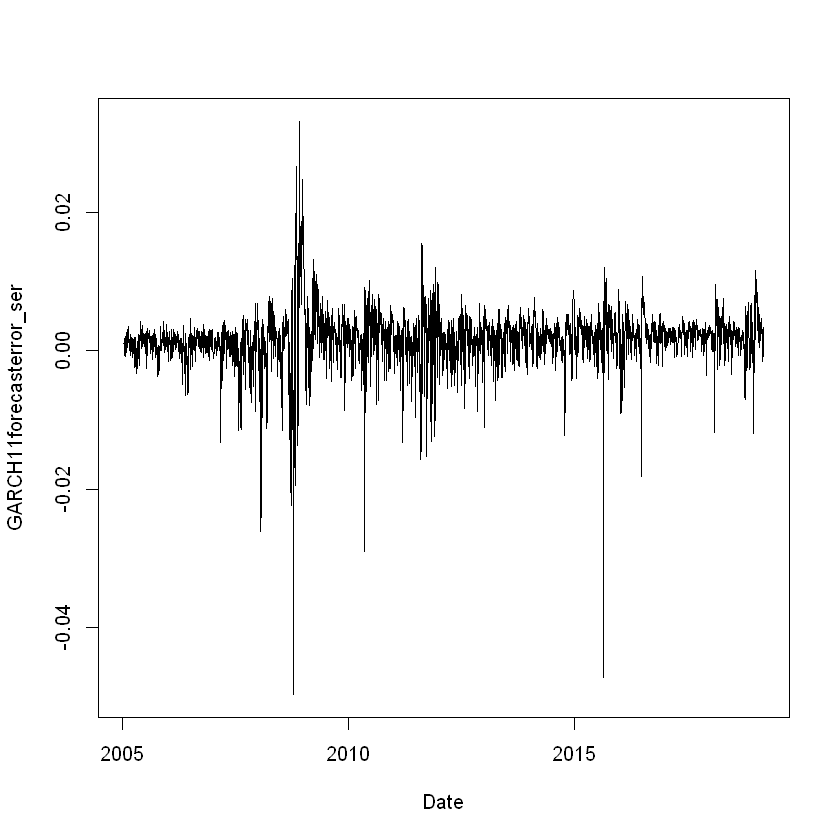

In [52]:
plot(zoo(GARCH11forecasterror_ser, as.Date(index(GARCH11forecasterror_ser))), 
     type='l', ylab='GARCH11forecasterror_ser', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [53]:
save.image(file = "IDaSRP_work_space_p4.00.03.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.03.RData")

##### Parallel

In [54]:
GARCH11process_parallel = GARCHprocess_par(regressand = df[, c("SPX_R")],
                                           roll = roll, exreg = NULL, mod = "sGARCH",
                                           no_of_clusters = detectCores(logical = FALSE),
                                           RV = df[, c("SPX_RV")], model_name = "GARCH11_par")

[1] "RMSE of the sigma (standard deviations) of the forecast from the model GARCH11_par"
[1] 0.004278812


In [55]:
in_sample_GARCH11_par = GARCH11process_parallel[[1]]
in_sample_GARCH11fit_par = GARCH11process_parallel[[2]]
GARCH11_mu_hat_par = GARCH11process_parallel[[3]]
GARCH11_sigma_hat_par = GARCH11process_parallel[[4]]
RV_no_GARCH11_sigma_hat_na_dated_par = GARCH11process_parallel[[5]]
GARCH11forecasterror_par = GARCH11process_parallel[[6]]
GARCH11_stats_table_par = GARCH11process_parallel[[7]]
GARCH11_rmse_par = GARCH11process_parallel[[8]]

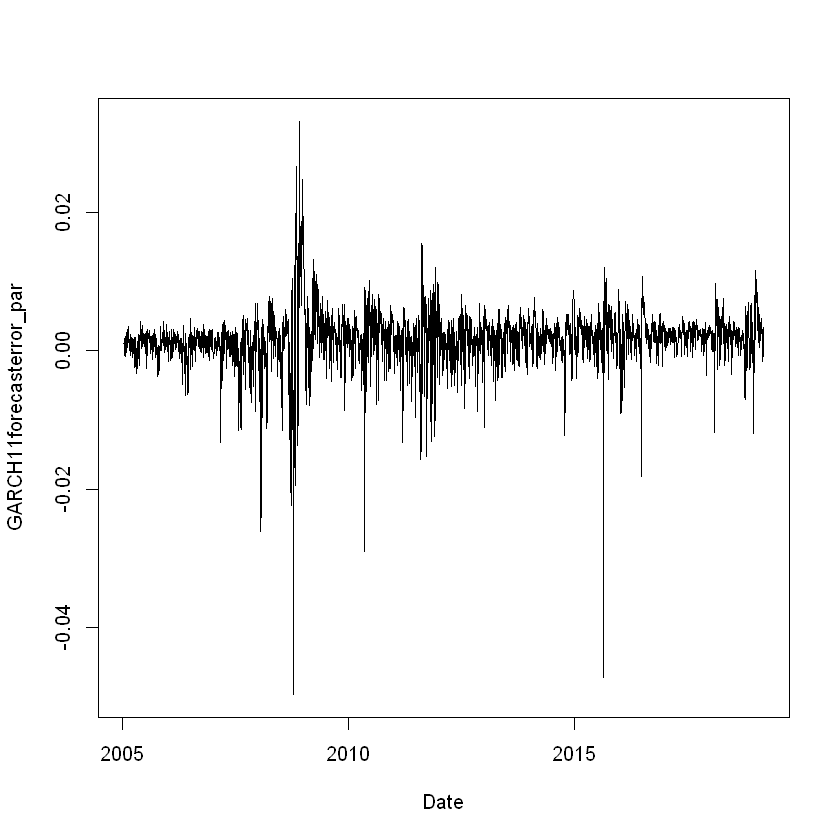

In [56]:
plot(zoo(GARCH11forecasterror_par, as.Date(index(GARCH11forecasterror_par))), 
     type='l', ylab='GARCH11forecasterror_par', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [57]:
save.image(file = "IDaSRP_work_space_p4.00.04.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.04.RData")

$$ \\ $$
#### AR(1)-GARCH(1,1)-SVI Model

##### Series

In [58]:
GARCH11SVIprocess_series = GARCHprocess_ser(regressand = df[, c("SPX_R")],
                                            roll = roll, mod = "sGARCH",
                                            exreg = matrix(df[, c("SPX_dSVI")]),
                                            model_name = "GARCH11SVI_ser",
                                            RV = df[, c("SPX_RV")])

Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning m


ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"


[1] "RMSE of the sigma (standard deviations) of the forecast from the model GARCH11SVI_ser"
[1] 0.004297524


In [59]:
in_sample_GARCH11SVI_ser = GARCH11SVIprocess_series[[1]]
in_sample_GARCH11SVIfit_ser = GARCH11SVIprocess_series[[2]]
GARCH11SVI_mu_hat_ser = GARCH11SVIprocess_series[[3]]
GARCH11SVI_sigma_hat_ser = GARCH11SVIprocess_series[[4]]
RV_no_GARCH11SVI_sigma_hat_na_dated_ser = GARCH11SVIprocess_series[[5]]
GARCH11SVIforecasterror_ser = GARCH11SVIprocess_series[[6]]
GARCH11SVI_stats_table_ser = GARCH11SVIprocess_series[[7]]
GARCH11SVI_rmse_ser = GARCH11SVIprocess_series[[8]]

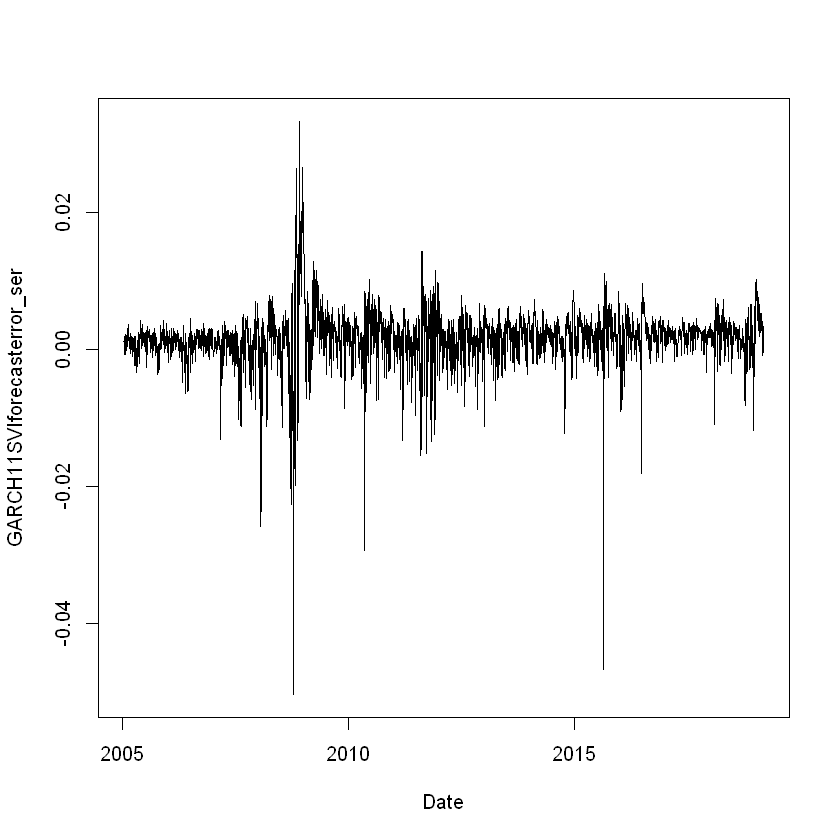

In [60]:
plot(zoo(GARCH11SVIforecasterror_ser, as.Date(index(GARCH11SVIforecasterror_ser))), 
     type='l', ylab='GARCH11SVIforecasterror_ser', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [61]:
save.image(file = "IDaSRP_work_space_p4.00.05.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.05.RData")

##### Parallel

In [62]:
GARCH11SVIprocess_parallel = GARCHprocess_par(regressand = df[, c("SPX_R")],
                                          roll = roll,
                                          mod = "sGARCH",
                                          exreg = matrix(df[, c("SPX_dSVI")]),
                                          no_of_clusters = detectCores(logical = FALSE),
                                          model_name = "GARCH11SVI_par",
                                          RV = df[, c("SPX_RV")])

[1] "RMSE of the sigma (standard deviations) of the forecast from the model GARCH11SVI_par"
[1] 0.004298738


In [63]:
in_sample_GARCH11SVI_par = GARCH11SVIprocess_parallel[[1]]
in_sample_GARCH11SVIfit_par = GARCH11SVIprocess_parallel[[2]]
GARCH11SVI_mu_hat_par = GARCH11SVIprocess_parallel[[3]]
GARCH11SVI_sigma_hat_par = GARCH11SVIprocess_parallel[[4]]
RV_no_GARCH11SVI_sigma_hat_na_dated_par = GARCH11SVIprocess_parallel[[5]]
GARCH11SVIforecasterror_par = GARCH11SVIprocess_parallel[[6]]
GARCH11SVI_stats_table_par = GARCH11SVIprocess_parallel[[7]]
GARCH11SVI_rmse_par = GARCH11SVIprocess_parallel[[8]]

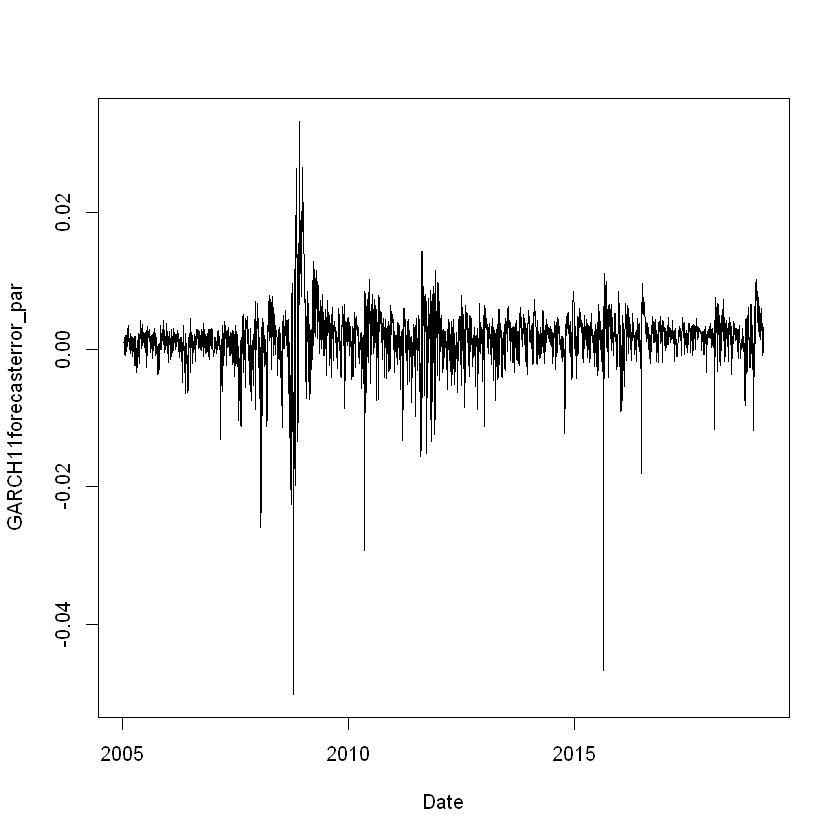

In [64]:
plot(zoo(GARCH11SVIforecasterror_par, as.Date(index(GARCH11SVIforecasterror_par))), 
     type='l', ylab='GARCH11forecasterror_par', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [65]:
save.image(file = "IDaSRP_work_space_p4.00.06.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.06.RData")

$$ \\ $$

#### GJRGARCH Models

GJRGARCH models account for asymmetry (SFFR (i)) via the last summand in

$$\begin{equation}
    \sigma_{t|t-1}^2 = c + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-i}^2 + \gamma I(\epsilon_{t-1}<0) \epsilon_{t-1}^2
\end{equation}$$

and second to last in
$$\begin{equation}
    \sigma_{t|t-1}^2 = c + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2 + \gamma I(\epsilon_{t-1}<0) \epsilon_{t-1}^2 + \delta \Delta SVI_{t-1}
\end{equation}$$
where a leverage case would result in $\gamma > 0$, and $I(\cdot)$ is the indicator function returning $1$ if its bracketed statement is true, $0$ otherwise - in this case:

$$\begin{equation}
    I(\epsilon_{t-1}<0) = \begin{Bmatrix} 1 & \text{if } \epsilon_{t-1}<0 \\ 0 & \text{otherwise} \end{Bmatrix} .
\end{equation}$$

$$ \\ $$
#### AR(1)-GJRGARCH(1,1) Model

##### Series

In [66]:
GJRGARCH11process_series = GARCHprocess_ser(regressand = df[, c("SPX_R")],
                                         roll = roll, mod = "sGARCH",
                                         exreg = NULL,
                                         model_name = "GJRGARCH11_ser",
                                         RV = df[, c("SPX_RV")])

Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"


[1] "RMSE of the sigma (standard deviations) of the forecast from the model GJRGARCH11_ser"
[1] 0.004277899


In [67]:
in_sample_GJRGARCH11_ser = GJRGARCH11process_series[[1]]
in_sample_GJRGARCH11fit_ser = GJRGARCH11process_series[[2]]
GJRGARCH11_mu_hat_ser = GJRGARCH11process_series[[3]]
GJRGARCH11_sigma_hat_ser = GJRGARCH11process_series[[4]]
RV_no_GJRGARCH11_sigma_hat_na_dated_ser = GJRGARCH11process_series[[5]]
GJRGARCH11forecasterror_ser = GJRGARCH11process_series[[6]]
GJRGARCH11_stats_table_ser = GJRGARCH11process_series[[7]]
GJRGARCH11_rmse_ser = GJRGARCH11process_series[[8]]

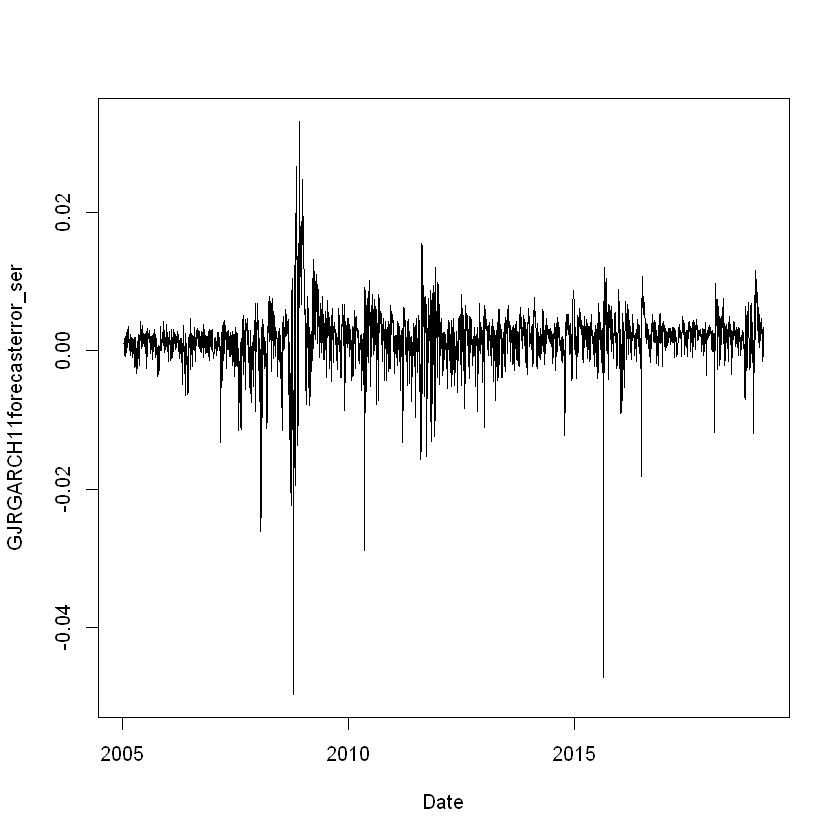

In [68]:
plot(zoo(GJRGARCH11forecasterror_ser, as.Date(index(GJRGARCH11forecasterror_ser))), 
     type='l', ylab='GJRGARCH11forecasterror_ser', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [69]:
save.image(file = "IDaSRP_work_space_p4.00.07.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.07.RData")

##### Parallel

In [70]:
# Parallel:
GJRGARCH11process_parallel = GARCHprocess_par(regressand = df[, c("SPX_R")],
                                          roll = roll,
                                          mod = "gjrGARCH",
                                          exreg = NULL,
                                          no_of_clusters = detectCores(logical = FALSE),
                                          model_name = "GJRGARCH11_par",
                                          RV = df[, c("SPX_RV")])

[1] "RMSE of the sigma (standard deviations) of the forecast from the model GJRGARCH11_par"
[1] 0.003897316


In [124]:
in_sample_GJRGARCH11_par = GJRGARCH11process_parallel[[1]]
in_sample_GJRGARCH11fit_par = GJRGARCH11process_parallel[[2]]
GJRGARCH11_mu_hat_par = GJRGARCH11process_parallel[[3]]
GJRGARCH11_sigma_hat_par = GJRGARCH11process_parallel[[4]]
RV_no_GJRGARCH11_sigma_hat_na_dated_par = GJRGARCH11process_parallel[[5]]
GJRGARCH11forecasterror_par = GJRGARCH11process_parallel[[6]]
GJRGARCH11_stats_table_par = GJRGARCH11process_parallel[[7]]
GJRGARCH11_rmse_par = GJRGARCH11process_parallel[[8]]

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [72]:
save.image(file = "IDaSRP_work_space_p4.00.08.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.08.RData")

$$ \\ $$
#### AR(1)-GJRGARCH(1,1)-SVI Model

##### Series

In [73]:
GJRGARCH11SVIprocess_series = GARCHprocess_ser(regressand = df[, c("SPX_R")],
                                            roll = roll, mod = "sGARCH",
                                            exreg = matrix(df[, c("SPX_dSVI")]),
                                            model_name = "GJRGARCH11SVI_ser",
                                            RV = df[, c("SPX_RV")])

Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning m


ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"


[1] "RMSE of the sigma (standard deviations) of the forecast from the model GJRGARCH11SVI_ser"
[1] 0.004297734


In [74]:
in_sample_GJRGARCH11SVI_ser = GJRGARCH11SVIprocess_series[[1]]
in_sample_GJRGARCH11SVIfit_ser = GJRGARCH11SVIprocess_series[[2]]
GJRGARCH11SVI_mu_hat_ser = GJRGARCH11SVIprocess_series[[3]]
GJRGARCH11SVI_sigma_hat_ser = GJRGARCH11SVIprocess_series[[4]]
RV_no_GJRGARCH11SVI_sigma_hat_na_dated_ser = GJRGARCH11SVIprocess_series[[5]]
GJRGARCH11SVIforecasterror_ser = GJRGARCH11SVIprocess_series[[6]]
GJRGARCH11SVI_stats_table_ser = GJRGARCH11SVIprocess_series[[7]]
GJRGARCH11SVI_rmse_ser = GJRGARCH11SVIprocess_series[[8]]

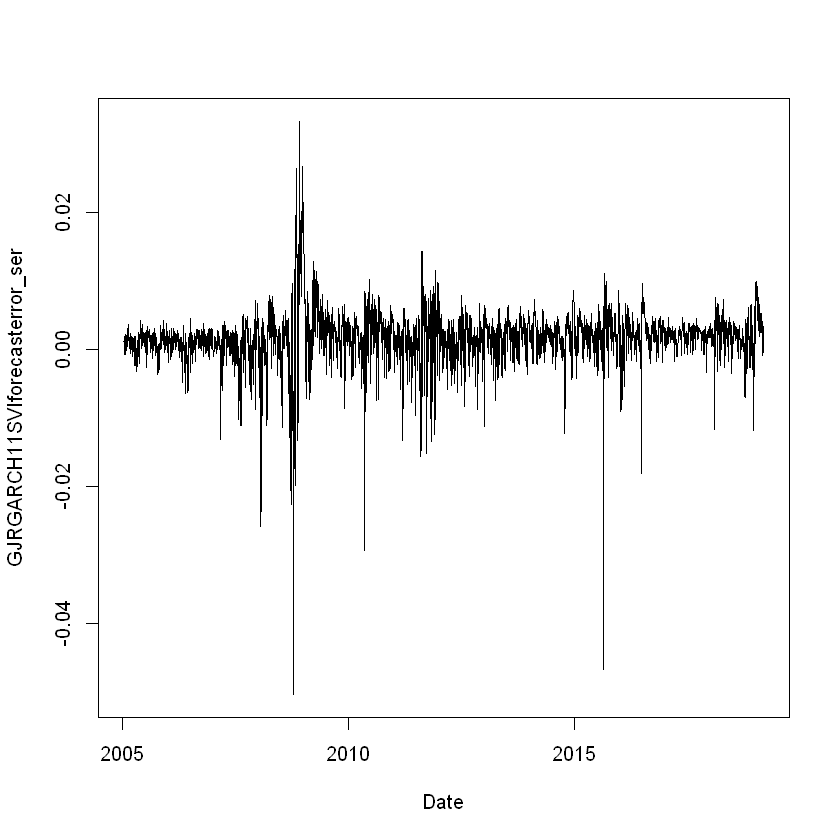

In [75]:
plot(zoo(GJRGARCH11SVIforecasterror_ser, as.Date(index(GJRGARCH11SVIforecasterror_ser))), 
     type='l', ylab='GJRGARCH11SVIforecasterror_ser', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [76]:
save.image(file = "IDaSRP_work_space_p4.00.09.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.09.RData")

##### Parallel

In [77]:
GJRGARCH11SVIprocess_parallel = GARCHprocess_par(regressand = df[, c("SPX_R")],
                                             roll = roll,
                                             mod = "gjrGARCH",
                                             exreg = matrix(df[, c("SPX_dSVI")]),
                                             no_of_clusters = detectCores(logical = FALSE),
                                             model_name = "GJRGARCH11SVI_par",
                                             RV = df[, c("SPX_RV")])

[1] "RMSE of the sigma (standard deviations) of the forecast from the model GJRGARCH11SVI_par"
[1] 0.003910605


In [78]:
in_sample_GJRGARCH11SVI_par = GJRGARCH11SVIprocess_parallel[[1]]
in_sample_GJRGARCH11SVIfit_par = GJRGARCH11SVIprocess_parallel[[2]]
GJRGARCH11SVI_mu_hat_par = GJRGARCH11SVIprocess_parallel[[3]]
GJRGARCH11SVI_sigma_hat_par = GJRGARCH11SVIprocess_parallel[[4]]
RV_no_GJRGARCH11SVI_sigma_hat_na_dated_par = GJRGARCH11SVIprocess_parallel[[5]]
GJRGARCH11SVIforecasterror_par = GJRGARCH11SVIprocess_parallel[[6]]
GJRGARCH11SVI_stats_table_par = GJRGARCH11SVIprocess_parallel[[7]]
GJRGARCH11SVI_rmse_par = GJRGARCH11SVIprocess_parallel[[8]]

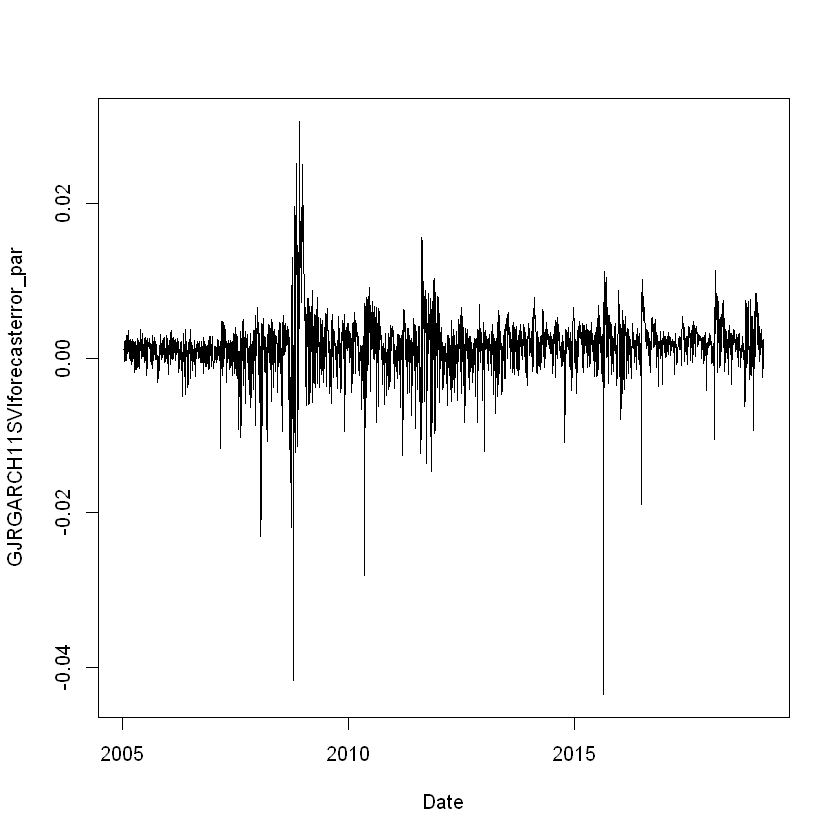

In [79]:
plot(zoo(GJRGARCH11SVIforecasterror_par, as.Date(index(GJRGARCH11SVIforecasterror_par))), 
     type='l', ylab='GJRGARCH11SVIforecasterror_par', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [80]:
save.image(file = "IDaSRP_work_space_p4.00.10.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.10.RData")

$$ \\ $$

#### EGARCH Models

The use of the logarithm function insures non-negativity in EGARCH models

$$\begin{equation}
    ln(\sigma_{t|t-1}^2) = c + \alpha \Bigg[ \frac{|\epsilon_{t-1}|}{\sigma_{t-1}} - \sqrt{\frac{2}{\pi}} \Bigg] +  \beta ln(\sigma_{t-1}^2) + \gamma \frac{\epsilon_{t-1}}{\sigma_{t-1}}
\end{equation}$$

and

$$\begin{equation}
    ln(\sigma_{t|t-1}^2) = c + \alpha \Bigg[ \frac{|\epsilon_{t-1}|}{\sigma_{t-1}} - \sqrt{\frac{2}{\pi}} \Bigg] +  \beta ln(\sigma_{t-1}^2) + \gamma \frac{\epsilon_{t-1}}{\sigma_{t-1}} + \delta \Delta SVI_{t-1}
\end{equation}$$

where  ln($\cdot$) and |$\cdot$| denote the logarithm base $e$ and the absolute value functions respectively and where $c, \alpha, \beta, \gamma \in \mathbb{R}$ are not constrained $\textbf{: } c + \alpha + \beta + \gamma > 0$ . If $Var(R_t|\Omega_{t-1})$ and $R_t$ react negatively to each other, $\beta$ would be negative, and \textit{vice versa}.

$$ \\ $$
#### AR(1)-EGARCH(1,1) Model

##### Series

In [81]:
EGARCH11process_series = GARCHprocess_ser(regressand = df[, c("SPX_R")],
                                         roll = roll, mod = "sGARCH",
                                         exreg = NULL,
                                         model_name = "EGARCH11_ser",
                                         RV = df[, c("SPX_RV")])

Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 omega alpha1 beta1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"


[1] "RMSE of the sigma (standard deviations) of the forecast from the model EGARCH11_ser"
[1] 0.004278411


In [82]:
in_sample_EGARCH11_ser = EGARCH11process_series[[1]]
in_sample_EGARCH11fit_ser = EGARCH11process_series[[2]]
EGARCH11_mu_hat_ser = EGARCH11process_series[[3]]
EGARCH11_sigma_hat_ser = EGARCH11process_series[[4]]
RV_no_EGARCH11_sigma_hat_na_dated_ser = EGARCH11process_series[[5]]
EGARCH11forecasterror_ser = EGARCH11process_series[[6]]
EGARCH11_stats_table_ser = EGARCH11process_series[[7]]
EGARCH11_rmse_ser = EGARCH11process_series[[8]]

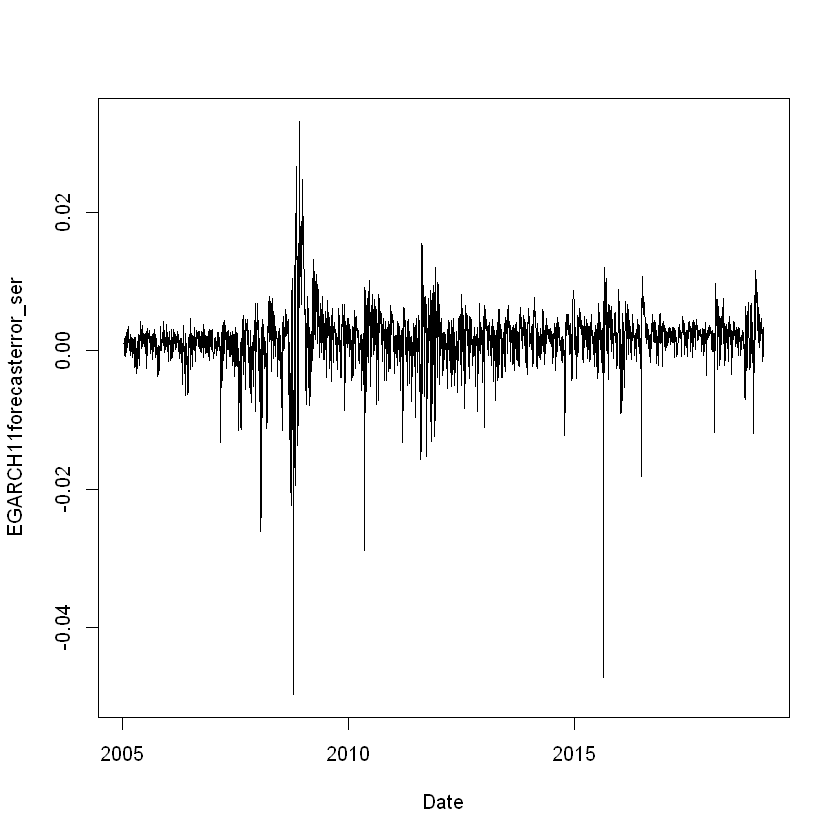

In [83]:
plot(zoo(EGARCH11forecasterror_ser, as.Date(index(EGARCH11forecasterror_ser))), 
     type='l', ylab='EGARCH11forecasterror_ser', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [84]:
save.image(file = "IDaSRP_work_space_p4.00.11.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.11.RData")

##### Parallel

In [85]:
EGARCH11process_parallel = GARCHprocess_par(regressand = df[, c("SPX_R")],
                                        roll = roll,
                                        mod = "eGARCH",
                                        exreg = NULL,
                                        no_of_clusters = detectCores(logical = FALSE),
                                        model_name = "EGARCH11_par",
                                        RV = df[, c("SPX_RV")])

[1] "RMSE of the sigma (standard deviations) of the forecast from the model EGARCH11_par"
[1] 0.003657765


In [139]:
in_sample_EGARCH11_par = EGARCH11process_parallel[[1]]
in_sample_EGARCH11fit_par = EGARCH11process_parallel[[2]]
EGARCH11_mu_hat_par = EGARCH11process_parallel[[3]]
EGARCH11_sigma_hat_par = EGARCH11process_parallel[[4]]
RV_no_EGARCH11_sigma_hat_na_dated_par = EGARCH11process_parallel[[5]]
EGARCH11forecasterror_par = EGARCH11process_parallel[[6]]
EGARCH11_stats_table_par = EGARCH11process_parallel[[7]]
EGARCH11_rmse_par = EGARCH11process_parallel[[8]]

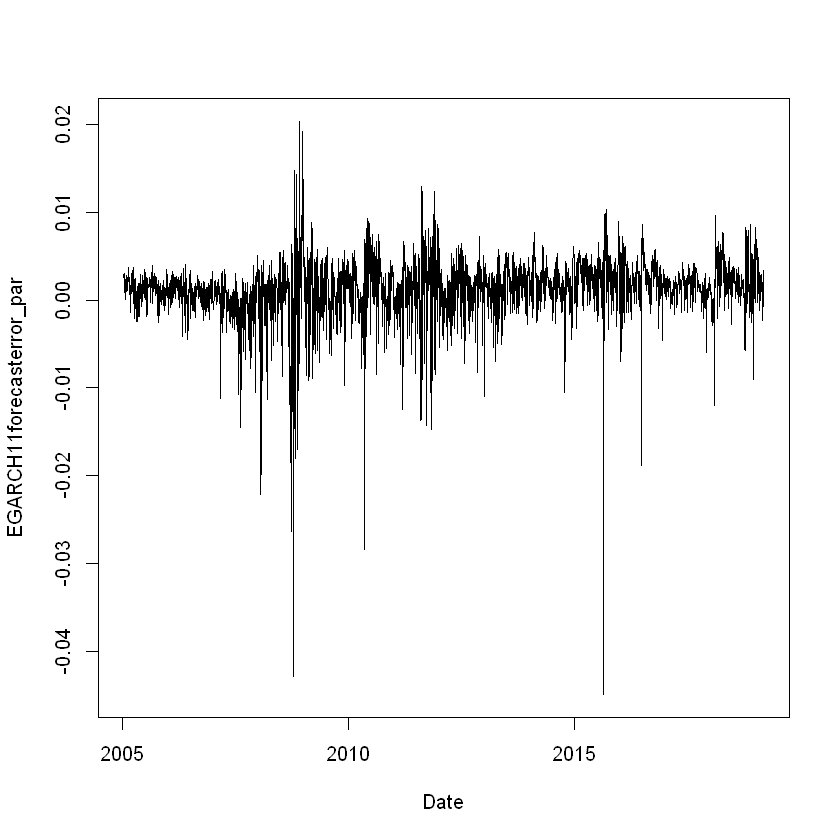

In [87]:
plot(zoo(EGARCH11forecasterror_par, as.Date(index(EGARCH11forecasterror_par))), 
     type='l', ylab='EGARCH11forecasterror_par', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [88]:
save.image(file = "IDaSRP_work_space_p4.00.12.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.12.RData")

$$ \\ $$
#### AR(1)-EGARCH(1,1)-SVI Model

##### Series

In [90]:
EGARCH11SVIprocess_series = GARCHprocess_ser(regressand = df[, c("SPX_R")],
                                         roll = roll, mod = "sGARCH",
                                         exreg = matrix(df[, c("SPX_dSVI")]),
                                         model_name = "EGARCH11_ser",
                                         RV = df[, c("SPX_RV")])

Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning m


ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
"
ugarchfit-->warning: solver failer to converge."



ugarchfilter-->error: parameters names do not match specification
Expected Parameters are: mu ar1 mxreg1 omega alpha1 beta1 vxreg1


Warning message in rm(GARCHfitforecast):
"object 'GARCHfitforecast' not found"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"
Warning message in sqrt(ans$h):
"NaNs produced"


[1] "RMSE of the sigma (standard deviations) of the forecast from the model EGARCH11_ser"
[1] 0.004298382


In [91]:
in_sample_EGARCH11SVI_ser = EGARCH11SVIprocess_series[[1]]
in_sample_EGARCH11SVIfit_ser = EGARCH11SVIprocess_series[[2]]
EGARCH11SVI_mu_hat_ser = EGARCH11SVIprocess_series[[3]]
EGARCH11SVI_sigma_hat_ser = EGARCH11SVIprocess_series[[4]]
RV_no_EGARCH11SVI_sigma_hat_na_dated_ser = EGARCH11SVIprocess_series[[5]]
EGARCH11SVIforecasterror_ser = EGARCH11SVIprocess_series[[6]]
EGARCH11SVI_stats_table_ser = EGARCH11SVIprocess_series[[7]]
EGARCH11SVI_rmse_ser = EGARCH11SVIprocess_series[[8]]

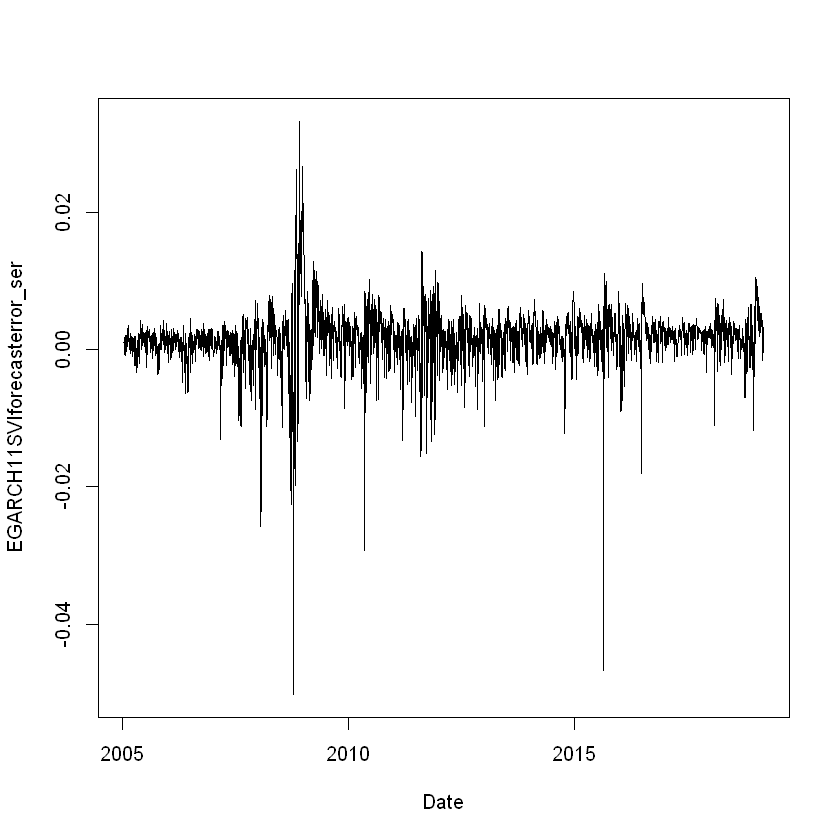

In [92]:
plot(zoo(EGARCH11SVIforecasterror_ser, as.Date(index(EGARCH11SVIforecasterror_ser))), 
     type='l', ylab='EGARCH11SVIforecasterror_ser', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [93]:
save.image(file = "IDaSRP_work_space_p4.00.13.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.13.RData")

##### Parallel

In [94]:
EGARCH11SVIprocess_parallel = GARCHprocess_par(regressand = df[, c("SPX_R")],
                                               roll = roll,
                                               mod = "eGARCH",
                                               exreg = matrix(df[, c("SPX_dSVI")]),
                                               no_of_clusters = detectCores(logical = FALSE),
                                               model_name = "EGARCH11SVI_par",
                                               RV = df[, c("SPX_RV")])

[1] "RMSE of the sigma (standard deviations) of the forecast from the model EGARCH11SVI_par"
[1] 0.007463993


In [95]:
in_sample_EGARCH11SVI_par = EGARCH11SVIprocess_parallel[[1]]
in_sample_EGARCH11SVIfit_par = EGARCH11SVIprocess_parallel[[2]]
EGARCH11SVI_mu_hat_par = EGARCH11SVIprocess_parallel[[3]]
EGARCH11SVI_sigma_hat_par = EGARCH11SVIprocess_parallel[[4]]
RV_no_EGARCH11SVI_sigma_hat_na_dated_par = EGARCH11SVIprocess_parallel[[5]]
EGARCH11SVIforecasterror_par = EGARCH11SVIprocess_parallel[[6]]
EGARCH11SVI_stats_table_par = EGARCH11SVIprocess_parallel[[7]]
EGARCH11SVI_rmse_par = EGARCH11SVIprocess_parallel[[8]]

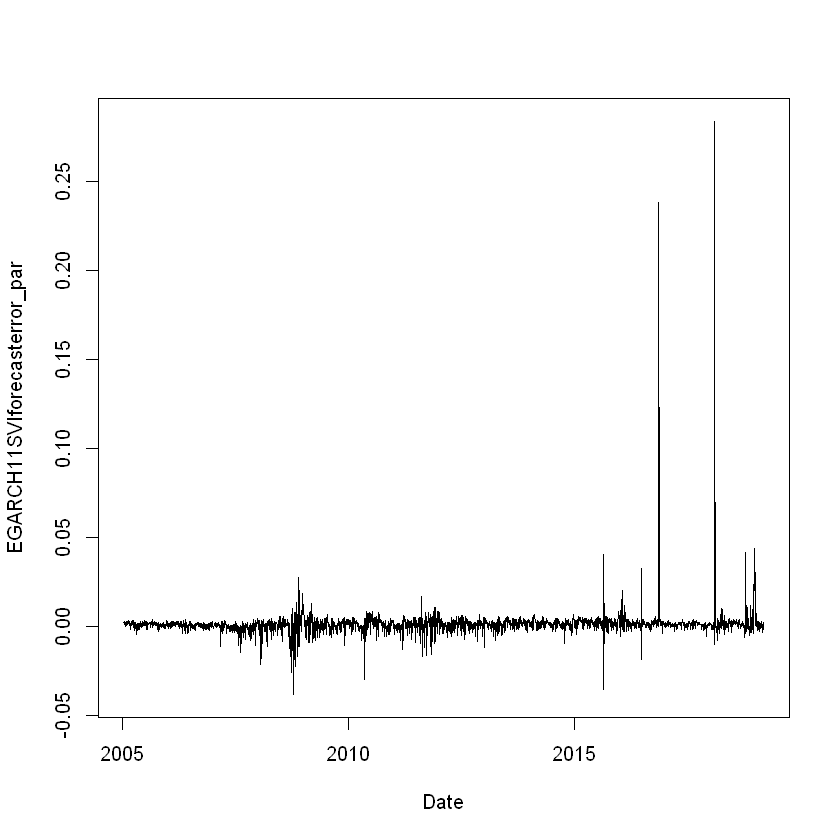

In [96]:
plot(zoo(EGARCH11SVIforecasterror_par, as.Date(index(EGARCH11SVIforecasterror_par))), 
     type='l', ylab='EGARCH11SVIforecasterror_par', xlab='Date')

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [97]:
save.image(file = "IDaSRP_work_space_p4.00.14.RData")
# To restore your workspace, type this:
# load("IDaSRP_work_space_p4.00.14.RData")

$$ \ $$
### Standard Deviation Forecast Diebold-Mariano tests

This function implements the modified test proposed by Harvey, Leybourne and Newbold (1997). The null hypothesis is that the two methods have the same forecast accuracy. For alternative=less, the alternative hypothesis is that method 2 is less accurate than method 1. For alternative=greater, the alternative hypothesis is that method 2 is more accurate than method 1. For alternative=two.sided, the alternative hypothesis is that method 1 and method 2 have different levels of accuracy.

In [15]:
print("Diebold and Mariano test GARCH11 with and without SVI")
GARCH11forecasterror_par_dm = GARCH11forecasterror_par - (GARCH11SVIforecasterror_par*0)
GARCH11SVIforecasterror_par_dm = GARCH11SVIforecasterror_par - (GARCH11forecasterror_par*0)
dm.test(matrix(GARCH11forecasterror_par_dm), matrix(GARCH11SVIforecasterror_par_dm), alternative = "less")

print("Diebold and Mariano test GJRGARCH11 with and without SVI")
GJRGARCH11forecasterror_par_dm = GJRGARCH11forecasterror_par - (GJRGARCH11SVIforecasterror_par*0)
GJRGARCH11SVIforecasterror_par_dm = GJRGARCH11SVIforecasterror_par - (GJRGARCH11forecasterror_par*0)
dm.test(matrix(GJRGARCH11forecasterror_par_dm), matrix(GJRGARCH11SVIforecasterror_par_dm), alternative = "less")

print("Diebold and Mariano test EGARCH11 with and without SVI")
EGARCH11forecasterror_par_dm = EGARCH11forecasterror_par - (EGARCH11SVIforecasterror_par*0)
EGARCH11SVIforecasterror_par_dm = EGARCH11SVIforecasterror_par - (EGARCH11forecasterror_par*0)
dm.test(matrix(EGARCH11forecasterror_par_dm), matrix(EGARCH11SVIforecasterror_par_dm), alternative = "less")

[1] "Diebold and Mariano test GARCH11 with and without SVI"



	Diebold-Mariano Test

data:  matrix(GARCH11forecasterror_par_dm)matrix(GARCH11SVIforecasterror_par_dm)
DM = -1.9405, Forecast horizon = 1, Loss function power = 2, p-value =
0.0262
alternative hypothesis: less


[1] "Diebold and Mariano test GJRGARCH11 with and without SVI"



	Diebold-Mariano Test

data:  matrix(GJRGARCH11forecasterror_par_dm)matrix(GJRGARCH11SVIforecasterror_par_dm)
DM = -1.1588, Forecast horizon = 1, Loss function power = 2, p-value =
0.1233
alternative hypothesis: less


[1] "Diebold and Mariano test EGARCH11 with and without SVI"



	Diebold-Mariano Test

data:  matrix(EGARCH11forecasterror_par_dm)matrix(EGARCH11SVIforecasterror_par_dm)
DM = -1.5212, Forecast horizon = 1, Loss function power = 2, p-value =
0.06415
alternative hypothesis: less


Here, the alternative hypothesis is that method 2 (SVI-implementing) is less accurate than method 1 (SVI-free). The fact that all test scores were negative suggest that the SVI-free models are not better performing than the SVI-implementing ones. However, only the GARCH and EGARCH models' D-M tests provided statistically significant results (at the 10% Confidence Level / 90% Statistical Significance). All in all, more is needed to evaluate the efficiency of our method.

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [99]:
save.image(file = "IDaSRP_work_space_p4.01.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.01.RData")

$$ \\ $$

## Part 4: Sign Forecast Frameworks

### Christopherson and Diebold Framework

Following from C\&D, Christoffersen, Diebold, Mariano, Tay & Tse (2006)'s working paper outlined how the conditional probability of a positive return in the next time period is
$$\begin{equation}
    \mathbb{P}(R_{t+1} > 0 | \Omega_{t}) = 1 - \mathbb{P} \bigg( \frac{R_{t+1} - \mu}{\sigma_{t+1|t}} \leq \frac{-\mu}{\sigma_{t+1|t}} \bigg) = 1 - F\bigg( \frac{-\mu}{\sigma_{t+1|t}} \bigg)
\end{equation}$$

where $\mathbb{P}$ denotes probability, where there is no conditional mean predictability in returns $\textbf{: } \mu_{t+1|t} = \mu$, where $R_{t+1}\sim D(\mu,\sigma_{t+1|t})$ for a generic distribution  $D$ dependent only on $\mu$ and $\sigma$ (such as the Normal distribution), and where $F$ is the distribution function of the “standardized” return $\frac{R_{t+1} - \mu}{\sigma_{t+1|t}}$. Then $R_{t+1}$'s sign is predictable even if its conditional mean isn't,
provided that $\mu \neq 0$. If $F$ is asymmetric - as per SFFR(i) - then forecast constructions are still possible if $\mu = 0$.

$R_{t+1}$ sign forecasts are formulated as
$$\begin{equation} \label{eq:PiCandD}
    \hat{\pi}_{C\&D_M, t+1} = \hat{\mathbb{P}}_{C\&D_M}(R_{t+1|t}>0) = 1 - \frac{1}{t} \sum_{k=1}^{t} I \bigg( \frac{R_{k} - {\hat{\mu}_{k|k-1}}}{\hat{\sigma}_{k|k-1}} \leq \frac{-\hat{\mu}_{t+1|t}}{\hat{\sigma}_{t+1|t}} \bigg)
\end{equation}$$

where $M$ is the model used to compute recursive one-step-ahead out-of-sample forecasts $\hat{\mu}$ and $\hat{\sigma}$ ranging from GARCH to EGARCH-SVI (note that the model used to estimate $\hat{\mu}_{t+1|t}$ and $\hat{\sigma}_{t+1|t}$ are not specified on the right-hand-side of this equation to keep the notation uncluttered; it is so throughout the article), and where $k \in \mathbb{Z}$.

$$ \\ $$
### Estimates of the probability of a positive return

#### Naive Model and its forecast error statistics

Remember our Naïve Framework. A Naïve model of sign change is used as a benchmark to construct comparisons. It is formulated as
$$ \hat{\pi}_{Naive, t+1} = \hat{\mathbb{P}}_{Naive}(R_{t+1|t}>0) = \frac{1}{t} \sum_{k=1}^{t} I (R_k > 0) \text{ .}$$

In [101]:
# Naive-Model's Indicator function according to the GARCH11 Model:
Naive_I = ifelse(matrix(df[, c("SPX_R")])>0 , 1 , 0)

# Naive Model:
Naive = (1:(length(matrix(df[, c("SPX_R")]))))
for(t in c(1:(length(matrix(df[, c("SPX_R")])))))
{Naive[t] = (1/t) * sum(matrix(df[, c("SPX_R")])[1:t])}

In [102]:
Naive_zoo = zoo(Naive, index(df[, c("SPX_R")]))

$$ \\ $$
### C&D's GARCH models with and without SVI (Model independent variables' construction)

A few pre-required variables (and R variables) have to be constructed first:

In [18]:
# mean of return up to time 'k'
R_mu = (1:length(matrix(df[, c("SPX_R")])))
for (i in c(1:length(matrix(df[, c("SPX_R")]))))
{R_mu[i] = mean(matrix(df[, c("SPX_R")])[1:i])}

# standard deviation of return up to time 'k'.
# Note that its 1st value is NA since there is no standard deviation for a 
# constant (according to R).
R_sigma = (1:length(matrix(df[, c("SPX_R")])))
for (i in c(1:length(matrix(df[, c("SPX_R")]))))
{R_sigma[i] = sd(matrix(df[, c("SPX_R")])[1:i])}
R_sigma[1] = 0 # Since the variance of a constant is 0.

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [104]:
save.image(file = "IDaSRP_work_space_p4.02.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.02.RData")

#### GARCH11's C&D Model

##### Series

Computing in series the values $\hat{\pi}_{C\&D_{GARCH(1,1)}, t+1} $

In [105]:
CnDprocess_ser = function(regressand = df[, c("SPX_R")],
                          GARCH_mu_hat,
                          GARCH_sigma_hat)
{
    # # Create our variables:

    # C&D's Indicator function according to the GARCH11 Model:
    GARCH_CandD_I = matrix(, nrow = roll, ncol = roll)
    GARCH_CandD_I_k = matrix(, nrow = roll, ncol = roll)
    GARCH_CandD_I_t = matrix( - (GARCH_mu_hat/GARCH_sigma_hat))
    
    
    for(t in c(1:roll))
    {for (k in c(1:t))
    {GARCH_CandD_I_k[k,t] =
     ifelse(((matrix(regressand)[252+k] - GARCH_mu_hat[k])/GARCH_sigma_hat[k])
            <= GARCH_CandD_I_t[t+1],
            1,0)

    # Note that we have some missing values due to the model not always managing
    # to converge to estimates of sigma and mu; since we need the t+1 model
    # estimates to compute its CandD_I_k, we also loose its t'th value for
    # each model's missing value.
    # We also lose the last value (the roll'th value) for the same reason.
    GARCH_CandD_I[k,t] =  ifelse((is.na(GARCH_CandD_I_k[k,t])), NA,
                                 (sum(GARCH_CandD_I_k[1:k,t], na.rm = TRUE)))}}
    
    # C&D's model according to the GARCH11 Model:
    GARCH_CandD = (1:(roll-1))
    for(i in c(1:(roll-1)))
    {GARCH_CandD[i] = 1 - ((GARCH_CandD_I[i,i])/
                           length(na.omit(GARCH_CandD_I[1:i,i])))}
    GARCH_CandD_zoo = zoo(GARCH_CandD, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))
    
    # This zoo object has missing values, so we can remove them:
    GARCH_CandD_zoo_no_nas = na.omit(GARCH_CandD_zoo)

    ## Cleaning datasets
    # rm(GARCH_CandD_I_t)
    # rm(GARCH_CandD_I_k)
    # rm(GARCH_CandD_I)
    
    return(list(GARCH_CandD_I_k,
                GARCH_CandD_I,
                GARCH_CandD,
                GARCH_CandD_zoo,
                GARCH_CandD_zoo_no_nas
               ))
}

In [106]:
GARCH11_CandD_process_ser = CnDprocess_ser(regressand = df[, c("SPX_R")],
                                           GARCH_mu_hat = GARCH11_mu_hat_ser,
                                           GARCH_sigma_hat = GARCH11_sigma_hat_ser)

In [107]:
GARCH11_CandD_I_k_ser = GARCH11_CandD_process_ser[[1]]
GARCH11_CandD_I_ser = GARCH11_CandD_process_ser[[2]]
GARCH11_CandD_ser = GARCH11_CandD_process_ser[[3]]
GARCH11_CandD_zoo_ser = zoo(GARCH11_CandD_ser, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))
GARCH11_CandD_zoo_no_nas_ser = zoo(na.omit(GARCH11_CandD_zoo_ser))

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [108]:
save.image(file = "IDaSRP_work_space_p4.03.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.03.RData")

##### Parallel

Computing in parallel the values $\hat{\pi}_{C\&D_{GARCH(1,1)}, t+1} $

In [109]:
CnDprocess_t_par = function(
    t,
    regressand = df[, c("SPX_R")],
    pre_GARCH_mu_hat = GARCH11_mu_hat_par,
    pre_GARCH_sigma_hat = GARCH11_sigma_hat_par,
    pre_GARCH_CandD_I_k = matrix(, nrow = roll, ncol = 1),
    pre_GARCH_CandD_I = matrix(, nrow = roll, ncol = 1))
{
    pre_GARCH_CandD_I_t = matrix( - (pre_GARCH_mu_hat/pre_GARCH_sigma_hat))
    
    for (k in c(1:t))
    {pre_GARCH_CandD_I_k[k] =
     ifelse(((matrix(regressand)[252+k] -
              pre_GARCH_mu_hat[k])/
             pre_GARCH_sigma_hat[k])
            <= pre_GARCH_CandD_I_t[t+1],
            1,0)

    # Note that we have some missing values due to the model not always managing
    # to converge to estimates of sigma and mu; since we need the t+1 model
    # estimates to compute its CandD_I_k, we also loose its t'th value for
    # each model's missing value.
    # We also lose the last value (the roll'th value) for the same reason.
    pre_GARCH_CandD_I[k] = 
     ifelse((is.na(pre_GARCH_CandD_I_k[k])),
            NA,
            (sum(pre_GARCH_CandD_I_k[1:k],
                 na.rm = TRUE)))}
    
    return(list(pre_GARCH_CandD_I_k, pre_GARCH_CandD_I))
}

In [110]:
no_of_clusters = detectCores(logical = FALSE)
cl = makeCluster(no_of_clusters)

GARCH11_CnDprocess_par = clusterApply(cl,
                                     x = 1:roll, # t
                                     fun = CnDprocess_t_par,
                                     regressand = df[, c("SPX_R")],
                                     pre_GARCH_mu_hat = GARCH11_mu_hat_par,
                                     pre_GARCH_sigma_hat = GARCH11_sigma_hat_par,
                                     pre_GARCH_CandD_I_k = matrix(, nrow = roll, ncol = 1),
                                     pre_GARCH_CandD_I = matrix(, nrow = roll, ncol = 1))
stopCluster(cl)

In [111]:
# C&D's model according to the GARCH11 Model:
GARCH11_CandD_par = (1:(roll-1))
for(i in c(1:(roll-1)))
{GARCH11_CandD_par[i] = 1 - ((GARCH11_CnDprocess_par[[i]][[2]][i])/
                       length(na.omit(GARCH11_CnDprocess_par[[i]][[2]])))}
GARCH11_CandD_zoo_par = zoo(GARCH11_CandD_par, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))

# This zoo object has missing values, so we can remove them:
GARCH11_CandD_zoo_no_nas_par = na.omit(GARCH11_CandD_zoo_par)

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [112]:
save.image(file = "IDaSRP_work_space_p4.04.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.04.RData")

It is interesting to see that each 'CnDprocess_t' column is not the same. In addition to having 'NA's at different locations, they were built off recursive modellings of $\hat{\mu_t}$ and $\hat{\sigma_t}$. This is most apparent in the second element of the last list in 'CnDprocess_t', where the summation of previous outputs emphasise this effect:

$$ \\ $$
#### GARCH11SVI's C&D Model

##### Series

Computing in series the values $\hat{\pi}_{C\&D_{GARCH(1,1)-SVI}, t+1} $

In [113]:
GARCH11SVI_CandD_process_ser = CnDprocess_ser(regressand = df[, c("SPX_R")],
                                              GARCH_mu_hat = GARCH11SVI_mu_hat_ser,
                                              GARCH_sigma_hat = GARCH11SVI_sigma_hat_ser)

In [114]:
GARCH11SVI_CandD_I_k_ser = GARCH11SVI_CandD_process_ser[[1]]
GARCH11SVI_CandD_I_ser = GARCH11SVI_CandD_process_ser[[2]]
GARCH11SVI_CandD_ser = GARCH11SVI_CandD_process_ser[[3]]
GARCH11SVI_CandD_zoo_ser = zoo(GARCH11SVI_CandD_ser, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))
GARCH11SVI_CandD_zoo_no_nas_ser = zoo(na.omit(GARCH11SVI_CandD_zoo_ser))

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [115]:
save.image(file = "IDaSRP_work_space_p4.05.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.05.RData")

##### Parallel

Computing in parallel the values $\hat{\pi}_{C\&D_{GARCH(1,1)-SVI}, t+1} $

In [117]:
no_of_clusters = detectCores(logical = FALSE)
cl = makeCluster(no_of_clusters)

GARCH11SVI_CnDprocess_par = clusterApply(cl,
                                         x = 1:roll, # t
                                         fun = CnDprocess_t_par,
                                         regressand = df[, c("SPX_R")],
                                         pre_GARCH_mu_hat = GARCH11SVI_mu_hat_par,
                                         pre_GARCH_sigma_hat = GARCH11SVI_sigma_hat_par,
                                         pre_GARCH_CandD_I_k = matrix(, nrow = roll, ncol = 1),
                                         pre_GARCH_CandD_I = matrix(, nrow = roll, ncol = 1))
stopCluster(cl)

In [118]:
# C&D's model according to the GARCH11SVI Model:
GARCH11SVI_CandD_par = (1:(roll-1))
for(i in c(1:(roll-1)))
{GARCH11SVI_CandD_par[i] = 1 - ((GARCH11SVI_CnDprocess_par[[i]][[2]][i])/
                       length(na.omit(GARCH11SVI_CnDprocess_par[[i]][[2]])))}
GARCH11SVI_CandD_zoo_par = zoo(GARCH11SVI_CandD_par, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))

# This zoo object has missing values, so we can remove them:
GARCH11SVI_CandD_zoo_no_nas_par = na.omit(GARCH11SVI_CandD_zoo_par)

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [119]:
save.image(file = "IDaSRP_work_space_p4.06.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.06.RData")

$$ \\ $$
#### GJRGARCH11's C&D Model

##### Series

Computing in series the values $\hat{\pi}_{C\&D_{GJRGARCH(1,1)}, t+1} $

In [120]:
GJRGARCH11_CandD_process_ser = CnDprocess_ser(regressand = df[, c("SPX_R")],
                                              GARCH_mu_hat = GJRGARCH11_mu_hat_ser,
                                              GARCH_sigma_hat = GJRGARCH11_sigma_hat_ser)

In [121]:
GJRGARCH11_CandD_I_k_ser = GJRGARCH11_CandD_process_ser[[1]]
GJRGARCH11_CandD_I_ser = GJRGARCH11_CandD_process_ser[[2]]
GJRGARCH11_CandD_ser = GJRGARCH11_CandD_process_ser[[3]]
GJRGARCH11_CandD_zoo_ser = zoo(GJRGARCH11_CandD_ser, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))
GJRGARCH11_CandD_zoo_no_nas_ser = zoo(na.omit(GJRGARCH11_CandD_zoo_ser))

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [122]:
save.image(file = "IDaSRP_work_space_p4.07.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.07.RData")

##### Parallel

Computing in parallel the values $\hat{\pi}_{C\&D_{GJRGARCH(1,1)}, t+1} $

In [125]:
no_of_clusters = detectCores(logical = FALSE)
cl = makeCluster(no_of_clusters)

GJRGARCH11_CnDprocess_par = clusterApply(cl,
                                         x = 1:roll, # t
                                         fun = CnDprocess_t_par,
                                         regressand = df[, c("SPX_R")],
                                         pre_GARCH_mu_hat = GJRGARCH11_mu_hat_par,
                                         pre_GARCH_sigma_hat = GJRGARCH11_sigma_hat_par,
                                         pre_GARCH_CandD_I_k = matrix(, nrow = roll, ncol = 1),
                                         pre_GARCH_CandD_I = matrix(, nrow = roll, ncol = 1))
stopCluster(cl)

In [126]:
# C&D's model according to the GJRGARCH11 Model:
GJRGARCH11_CandD_par = (1:(roll-1))
for(i in c(1:(roll-1)))
{GJRGARCH11_CandD_par[i] = 1 - ((GJRGARCH11_CnDprocess_par[[i]][[2]][i])/
                       length(na.omit(GJRGARCH11_CnDprocess_par[[i]][[2]])))}
GJRGARCH11_CandD_zoo_par = zoo(GJRGARCH11_CandD_par, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))

# This zoo object has missing values, so we can remove them:
GJRGARCH11_CandD_zoo_no_nas_par = na.omit(GJRGARCH11_CandD_zoo_par)

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [127]:
save.image(file = "IDaSRP_work_space_p4.08.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.08.RData")

$$ \\ $$
#### GJRGARCH11SVI's C&D Model

##### Series

Computing in series the values $\hat{\pi}_{C\&D_{GJRGARCH(1,1)-SVI}, t+1} $

In [128]:
GJRGARCH11SVI_CandD_process_ser = CnDprocess_ser(regressand = df[, c("SPX_R")],
                                              GARCH_mu_hat = GJRGARCH11SVI_mu_hat_ser,
                                              GARCH_sigma_hat = GJRGARCH11SVI_sigma_hat_ser)

In [129]:
GJRGARCH11SVI_CandD_I_k_ser = GJRGARCH11SVI_CandD_process_ser[[1]]
GJRGARCH11SVI_CandD_I_ser = GJRGARCH11SVI_CandD_process_ser[[2]]
GJRGARCH11SVI_CandD_ser = GJRGARCH11SVI_CandD_process_ser[[3]]
GJRGARCH11SVI_CandD_zoo_ser = zoo(GJRGARCH11SVI_CandD_ser, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))
GJRGARCH11SVI_CandD_zoo_no_nas_ser = zoo(na.omit(GJRGARCH11SVI_CandD_zoo_ser))

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [130]:
save.image(file = "IDaSRP_work_space_p4.09.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.09.RData")

##### Parallel

Computing in parallel the values $\hat{\pi}_{C\&D_{GJRGARCH(1,1)-SVI}, t+1} $

In [132]:
no_of_clusters = detectCores(logical = FALSE)
cl = makeCluster(no_of_clusters)

GJRGARCH11SVI_CnDprocess_par = clusterApply(cl,
                                            x = 1:roll, # t
                                            fun = CnDprocess_t_par,
                                            regressand = df[, c("SPX_R")],
                                            pre_GARCH_mu_hat = GJRGARCH11SVI_mu_hat_par,
                                            pre_GARCH_sigma_hat = GJRGARCH11SVI_sigma_hat_par,
                                            pre_GARCH_CandD_I_k = matrix(, nrow = roll, ncol = 1),
                                            pre_GARCH_CandD_I = matrix(, nrow = roll, ncol = 1))
stopCluster(cl)

In [133]:
# C&D's model according to the GJRGARCH11SVI Model:
GJRGARCH11SVI_CandD_par = (1:(roll-1))
for(i in c(1:(roll-1)))
{GJRGARCH11SVI_CandD_par[i] = 1 - ((GJRGARCH11SVI_CnDprocess_par[[i]][[2]][i])/
                                   length(na.omit(GJRGARCH11SVI_CnDprocess_par[[i]][[2]])))}
GJRGARCH11SVI_CandD_zoo_par = zoo(GJRGARCH11SVI_CandD_par, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))

# This zoo object has missing values, so we can remove them:
GJRGARCH11SVI_CandD_zoo_no_nas_par = na.omit(GJRGARCH11SVI_CandD_zoo_par)

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [134]:
save.image(file = "IDaSRP_work_space_p4.10.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.10.RData")

$$ \\ $$
#### EGARCH11's C&D Model

##### Series

Computing in series the values $\hat{\pi}_{C\&D_{EGARCH(1,1)}, t+1} $

In [135]:
EGARCH11_CandD_process_ser = CnDprocess_ser(regressand = df[, c("SPX_R")],
                                              GARCH_mu_hat = EGARCH11_mu_hat_ser,
                                              GARCH_sigma_hat = EGARCH11_sigma_hat_ser)

In [136]:
EGARCH11_CandD_I_k_ser = EGARCH11_CandD_process_ser[[1]]
EGARCH11_CandD_I_ser = EGARCH11_CandD_process_ser[[2]]
EGARCH11_CandD_ser = EGARCH11_CandD_process_ser[[3]]
EGARCH11_CandD_zoo_ser = zoo(EGARCH11_CandD_ser, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))
EGARCH11_CandD_zoo_no_nas_ser = zoo(na.omit(EGARCH11_CandD_zoo_ser))

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [137]:
save.image(file = "IDaSRP_work_space_p4.11.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.11.RData")

##### Parallel

Computing in parallel the values $\hat{\pi}_{C\&D_{EGARCH(1,1)}, t+1} $

In [140]:
no_of_clusters = detectCores(logical = FALSE)
cl = makeCluster(no_of_clusters)

EGARCH11_CnDprocess_par = clusterApply(cl,
                                       x = 1:roll, # t
                                       fun = CnDprocess_t_par,
                                       regressand = df[, c("SPX_R")],
                                       pre_GARCH_mu_hat = EGARCH11_mu_hat_par,
                                       pre_GARCH_sigma_hat = EGARCH11_sigma_hat_par,
                                       pre_GARCH_CandD_I_k = matrix(, nrow = roll, ncol = 1),
                                       pre_GARCH_CandD_I = matrix(, nrow = roll, ncol = 1))
stopCluster(cl)

In [141]:
# C&D's model according to the EGARCH11 Model:
EGARCH11_CandD_par = (1:(roll-1))
for(i in c(1:(roll-1)))
{EGARCH11_CandD_par[i] = 1 - ((EGARCH11_CnDprocess_par[[i]][[2]][i])/
                              length(na.omit(EGARCH11_CnDprocess_par[[i]][[2]])))}
EGARCH11_CandD_zoo_par = zoo(EGARCH11_CandD_par, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))

# This zoo object has missing values, so we can remove them:
EGARCH11_CandD_zoo_no_nas_par = na.omit(EGARCH11_CandD_zoo_par)

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [142]:
save.image(file = "IDaSRP_work_space_p4.12.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.12.RData")

$$ \\ $$
#### EGARCH11SVI's C&D Model

##### Series

Computing in series the values $\hat{\pi}_{C\&D_{EGARCH(1,1)-SVI}, t+1} $

In [143]:
EGARCH11SVI_CandD_process_ser = CnDprocess_ser(regressand = df[, c("SPX_R")],
                                              GARCH_mu_hat = EGARCH11SVI_mu_hat_ser,
                                              GARCH_sigma_hat = EGARCH11SVI_sigma_hat_ser)

In [144]:
EGARCH11SVI_CandD_I_k_ser = EGARCH11SVI_CandD_process_ser[[1]]
EGARCH11SVI_CandD_I_ser = EGARCH11SVI_CandD_process_ser[[2]]
EGARCH11SVI_CandD_ser = EGARCH11SVI_CandD_process_ser[[3]]
EGARCH11SVI_CandD_zoo_ser = zoo(EGARCH11SVI_CandD_ser, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))
EGARCH11SVI_CandD_zoo_no_nas_ser = zoo(na.omit(EGARCH11SVI_CandD_zoo_ser))

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [145]:
save.image(file = "IDaSRP_work_space_p4.13.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.13.RData")

##### Parallel

Computing in parallel the values $\hat{\pi}_{C\&D_{EGARCH(1,1)-SVI}, t+1} $

In [146]:
no_of_clusters = detectCores(logical = FALSE)
cl = makeCluster(no_of_clusters)

EGARCH11SVI_CnDprocess_par = clusterApply(cl,
                                          x = 1:roll, # t
                                          fun = CnDprocess_t_par,
                                          regressand = df[, c("SPX_R")],
                                          pre_GARCH_mu_hat = EGARCH11SVI_mu_hat_par,
                                          pre_GARCH_sigma_hat = EGARCH11SVI_sigma_hat_par,
                                          pre_GARCH_CandD_I_k = matrix(, nrow = roll, ncol = 1),
                                          pre_GARCH_CandD_I = matrix(, nrow = roll, ncol = 1))
stopCluster(cl)

In [151]:
# C&D's model according to the EGARCH11SVI Model:
EGARCH11SVI_CandD_par = (1:(roll-1))
for(i in c(1:(roll-1)))
{EGARCH11SVI_CandD_par[i] = 1 - ((EGARCH11SVI_CnDprocess_par[[i]][[2]][i])/
                                 length(na.omit(EGARCH11SVI_CnDprocess_par[[i]][[2]])))}
EGARCH11SVI_CandD_zoo_par = zoo(EGARCH11SVI_CandD_par, index(df[, c("SPX_R")][(253+1):(253+(roll-1))]))

# This zoo object has missing values, so we can remove them:
EGARCH11SVI_CandD_zoo_no_nas_par = na.omit(EGARCH11SVI_CandD_zoo_par)

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [152]:
save.image(file = "IDaSRP_work_space_p4.14.1.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.14.1.RData")

$$ \\ $$
## Comparing the predictive performance of each model:
Forecast error mean, sd (standard deviation), Brier Scores and Diebold&Mariano statistics based on results from the parallel methods used above:

Mean of the probabilistic forecast errors derived from each model letting $ \pi_{Observed,t} = I(R_{SPX,t} > 0) = \begin{Bmatrix} 1 & \text{if } R_{SPX,t} > 0 \\ 0 & \text{otherwise} \end{Bmatrix} $ and $ \mathbf{Observed\_pi} = $ $\left[ \begin{matrix}
    \pi_{Observed,1} \\
    \pi_{Observed,2} \\
    \vdots\\
    \pi_{Observed,T_{Observed\_pi}}
\end{matrix} \right]
$ = $\left[ \begin{matrix}
    I(R_{SPX,1} > 0) \\
    I(R_{SPX,2} > 0) \\
    \vdots\\
    I(R_{SPX,T_{Observed\_pi}} > 0)
\end{matrix} \right]
$

In [153]:
Observed_pi = ifelse(matrix(df[, c("SPX_R")])>0,1,0)
Observed_pi_zoo = zoo(Observed_pi, index(df[, c("SPX_R")]))

To asses the accuracy of volatility and positive sign probability forecasts, this sub-section specifies error functions.

Variance forecasts from the models GARCH to EGARCH-SVI are simply compared against realised volatilities to compute variance forecast errors as
$$ \hat{\sigma}_{t|t-1} - RV_t \text{ .}$$


Sign forecast errors are computed as 

$$\begin{equation} \label{eq:SignForecastErrors}
\hat{\pi}_{j, t+1} - \mathbb{P}(R_{t+1} > 0 | \Omega_{t \textbf{+1}}) = \hat{\pi}_{j, t+1} - \pi_{Observed,t+1}
\end{equation}$$

where $j = (C\&D_M,  Naive)$, and where $M$ can be replaced by a model name ranging from GARCH to EGARCH-SVI (Note the bold `$+1$' in $\Omega_{t \textbf{+1}}$ here to emphasise how $\mathbb{P}(R_{t+1}>0|\Omega_{t \textbf{+1}})=I(R_{t+1}>0)$.)

In [154]:
Naive_pi_error = Naive_zoo - Observed_pi_zoo
GARCH11_pi_error = GARCH11_CandD_zoo_no_nas_par - Observed_pi_zoo
GARCH11SVI_pi_error = GARCH11SVI_CandD_zoo_no_nas_par - Observed_pi_zoo
GJRGARCH11_pi_error = GJRGARCH11_CandD_zoo_no_nas_par - Observed_pi_zoo
GJRGARCH11SVI_pi_error = GJRGARCH11SVI_CandD_zoo_no_nas_par - Observed_pi_zoo
EGARCH11_pi_error = EGARCH11_CandD_zoo_no_nas_par - Observed_pi_zoo
EGARCH11SVI_pi_error = EGARCH11SVI_CandD_zoo_no_nas_par - Observed_pi_zoo

In [12]:
rbind(Statistics_Table("Naive_pi_error", na.omit(Naive_pi_error)),
      Statistics_Table("GARCH11_pi_error", na.omit(GARCH11_pi_error)),
      Statistics_Table("GARCH11SVI_pi_error", na.omit(GARCH11SVI_pi_error)),
      Statistics_Table("GJRGARCH11_pi_error", na.omit(GJRGARCH11_pi_error)),
      Statistics_Table("GJRGARCH11SVI_pi_error", na.omit(GJRGARCH11SVI_pi_error)),
      Statistics_Table("EGARCH11_pi_error", na.omit(EGARCH11_pi_error)),
      Statistics_Table("EGARCH11SVI_pi_error", na.omit(EGARCH11SVI_pi_error)))

Data_Set,Mean,Mean_of_Absolute_Values,Standard_Deviation,Median,Skewness,Kurtosis,ACF_lag_0,ACF_lag_1
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Naive_pi_error,-0.544358428,0.5445473,0.4980632,-0.9996686,0.1790524,-1.968977,1,-0.06672948
GARCH11_pi_error,0.011770315,0.4943595,0.4984904,-0.4006568,0.1766350,-1.951251,1,-0.02481175
GARCH11SVI_pi_error,0.009742772,0.4943771,0.4983300,-0.4033970,0.1779972,-1.951288,1,-0.02831325
GJRGARCH11_pi_error,0.006156740,0.4948573,0.4982681,-0.4130435,0.1777539,-1.954735,1,-0.03268875
GJRGARCH11SVI_pi_error,0.006146078,0.4947756,0.4982166,-0.4111748,0.1777965,-1.954254,1,-0.03216385
EGARCH11_pi_error,0.006432536,0.4947300,0.4982087,-0.4115816,0.1778832,-1.954040,1,-0.03242612
EGARCH11SVI_pi_error,0.006283576,0.4946241,0.4982143,-0.4077604,0.1776422,-1.952094,1,-0.02887203


Only the 'Mean_of_Absolute_Values' and 'Standard_Deviation' really are of interest here. We are looking for the lowest absolute mean and standard deviation. The SVI-implementing model's results are seen to perform better than their SVI-free counterparts (bar the GACH model's). Apart from that, little at this time can be concluded - unfortunately.

$$ \\ $$
#### [Brier scores](https://www.statisticshowto.com/brier-score/) of the probabilistic forecast errors derived from each model

In [16]:
Brier_Score_Table = function(name, data)
{as.data.table(list(Data_Set = name, Brier_Score = (1/length(data))*sum(data^2)))}

In [17]:
rbind(Brier_Score_Table("Naive_pi_error", na.omit(Naive_pi_error)),
      Brier_Score_Table("GARCH11_pi_error", na.omit(GARCH11_pi_error)),
      Brier_Score_Table("GARCH11SVI_pi_error", na.omit(GARCH11SVI_pi_error)),
      Brier_Score_Table("GJRGARCH11_pi_error", na.omit(GJRGARCH11_pi_error)),
      Brier_Score_Table("GJRGARCH11SVI_pi_error", na.omit(GJRGARCH11SVI_pi_error)),
      Brier_Score_Table("EGARCH11_pi_error", na.omit(EGARCH11_pi_error)),
      Brier_Score_Table("EGARCH11SVI_pi_error", na.omit(EGARCH11SVI_pi_error)))

Data_Set,Brier_Score
<chr>,<dbl>
Naive_pi_error,0.5443277
GARCH11_pi_error,0.2485609
GARCH11SVI_pi_error,0.2483573
GJRGARCH11_pi_error,0.2482388
GJRGARCH11SVI_pi_error,0.2481874
EGARCH11_pi_error,0.2481831
EGARCH11SVI_pi_error,0.2481868


The higher the Brier score, the worst the model did. Expectedly, the naive model did worst. Interestingly, SVI-implementing models always outperformed SVI-free ones (apart from the EGARCH case).

$$ \\ $$
#### [Diebold & Mariano statistics](http://www.phdeconomics.sssup.it/documents/Lesson19.pdf)
Here the alternative hypothesis is that method 2 is more accurate than method 1; remember that a small p-value indicates strong evidence against the Null Hypothesis.

In [169]:
GARCH11_pi_error_dm = GARCH11_pi_error - (GARCH11SVI_pi_error*0)
GARCH11SVI_pi_error_dm = GARCH11SVI_pi_error - (GARCH11_pi_error*0)
GARCH11_dm_test = dm.test(matrix(GARCH11_pi_error_dm), matrix(GARCH11SVI_pi_error_dm), alternative = "greater")

In [170]:
show(GARCH11_dm_test)


	Diebold-Mariano Test

data:  matrix(GARCH11_pi_error_dm)matrix(GARCH11SVI_pi_error_dm)
DM = 1.8532, Forecast horizon = 1, Loss function power = 2, p-value =
0.03197
alternative hypothesis: greater



In [171]:
GJRGARCH11_pi_error_dm = GJRGARCH11_pi_error - (GJRGARCH11SVI_pi_error*0)
GJRGARCH11SVI_pi_error_dm = GJRGARCH11SVI_pi_error - (GJRGARCH11_pi_error*0)
GJRGARCH11_dm_test = dm.test(matrix(GJRGARCH11_pi_error_dm), matrix(GJRGARCH11SVI_pi_error_dm), alternative = c("greater"))

In [172]:
show(GJRGARCH11_dm_test)


	Diebold-Mariano Test

data:  matrix(GJRGARCH11_pi_error_dm)matrix(GJRGARCH11SVI_pi_error_dm)
DM = 0.7234, Forecast horizon = 1, Loss function power = 2, p-value =
0.2347
alternative hypothesis: greater



In [173]:
EGARCH11_pi_error_dm = EGARCH11_pi_error - (EGARCH11SVI_pi_error*0)
EGARCH11SVI_pi_error_dm = EGARCH11SVI_pi_error - (EGARCH11_pi_error*0)
EGARCH11_dm_test = dm.test(matrix(EGARCH11_pi_error_dm), matrix(EGARCH11SVI_pi_error_dm), alternative = c("greater"))

In [174]:
show(EGARCH11_dm_test)


	Diebold-Mariano Test

data:  matrix(EGARCH11_pi_error_dm)matrix(EGARCH11SVI_pi_error_dm)
DM = -0.042896, Forecast horizon = 1, Loss function power = 2, p-value
= 0.5171
alternative hypothesis: greater



The only D-M test with a small enough p-value to allow for a statistically significant conclusion is the GARCH's (at the 5% Confidence Level / 95% Significance Level). It shows a slight preference for the SVI-implementing model.

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [175]:
save.image(file = "IDaSRP_work_space_p4.15.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p4.15.RData")

$$ \\ $$
# Part 5: Financial significance

This section investigates the financial implications of our work via the lens of a single
profit maximising agent deciding on whether to invest in the risk-free rate of the index host's
country ([TRUS1MT](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+1+Month&prev=99_Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8) in this instance) or in the index itself.



Now we can implement **Granger and Pesaran (2000)**'s framework. It allows us to put ourselves in the shoes of an investor who chooses between the risk-free asset and the risky one on a daily basis, *i.e.*:

$$
\begin{equation}
    R_{SPX, j, t} = \omega_{_{SPX, j, t-1}} R_{SPX, m, t} + (1 - \omega_{_{SPX, j, t-1}}) {r_f}_{_{SPX, t}}
\end{equation}
$$

where the strategy is denoted via $j = ( C\&D_M , Naive) $ for model $M$ ranging from GARCH to EGARCH-SVI and $C\&D_M$ stands for the Christoferson and Diebold model applied with the model $M$, and where

$$
\begin{equation}
    \omega_{_{j, t}} = I(\widehat{\pi}_{j, t+1} > \psi) = \begin{Bmatrix} 1 & \text{if } \widehat{\pi}_{j, t+1} > \psi \\ 0 & \text{otherwise} \end{Bmatrix} 
\end{equation}
$$

for a probability threshold $\psi \in \mathbb{R}$ such that $ 0 \leq \psi \leq 1 $, and where

$$
\begin{array}{ll}
    R_{SPX, m, t} &= \frac{P_{SPX, t} - P_{SPX, t - 1}}{P_{SPX, t - 1}} \\
                  &= R_{SPX, t} + {r_f}_{_{SPX, t}} \text{ .}
\end{array}
$$

An investor's return following from this strategy is therefore cumulative and can be defined as

$$
\begin{equation}
    \mathcal{R}_{SPX, j, t} = \prod_{i=1}^{t} R_{SPX, j, i} \text{ .}
\end{equation}
$$

Similarly, the used Buy-and-Hold strategy may be considered a misnomer here as it is defined as the return from recursively investing previous-day-returns in the index every day, starting with one unit of currency (U.S. Dollar for the SPX) for compatibility, *i.e.*: $$\prod_{i=1}^{t} R_{SPX, B\&H, i} \text{ .}$$

$$ \\ $$

## Getting to the Coding

We define $ y_{d,t} = I(R_{SPX, t} > 0) = \begin{Bmatrix} 1 & \text{if } R_{SPX, t} > 0 \\ 0 & \text{otherwise} \end{Bmatrix} $ as the indicator of the realised direction of the return on the S&P 500 index. This is to reflect (but it is not identical to) [CPV](https://www.sciencedirect.com/science/article/pii/S0261560617301912?via%3Dihub)'s notation. From there we construct
$ 
\mathbf{y\_d} = $ $\left[ \begin{matrix}
    y_{d,1} \\
    y_{d,2} \\
    \vdots\\
    y_{d,T_{y\_d}}
\end{matrix} \right]
$ where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{y\_d}$ as follows:

In [176]:
y_d = ifelse(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")]))>0,1,0)

$$ \\ $$

Set the probability threshold at which to invest in the index in our 2d graphs, *i.e.*: set $\psi = 0.5$. This implies that the agent invests in the
index if forecasts predict a higher probability of increase in its excess return than a decrease.

In [177]:
p = 0.5

#### Granger and Pesaran (2000)'s framework using the Naive model

Following from C\&D, Christoffersen, Diebold, Mariano, Tay & Tse (2006)'s working paper outlined how the conditional probability of a positive return in the next time period is
$$\begin{equation}
    \mathbb{P}(R_{t+1} > 0 | \Omega_{t}) = 1 - \mathbb{P} \bigg( \frac{R_{t+1} - \mu}{\sigma_{t+1|t}} \leq \frac{-\mu}{\sigma_{t+1|t}} \bigg) = 1 - F\bigg( \frac{-\mu}{\sigma_{t+1|t}} \bigg)
\end{equation}$$

where $\mathbb{P}$ denotes probability, where there is no conditional mean predictability in returns $\textbf{: } \mu_{t+1|t} = \mu$, where $R_{t+1}\sim D(\mu,\sigma_{t+1|t})$ for a generic distribution  $D$ dependent only on $\mu$ and $\sigma$ (such as the Normal distribution), and where $F$ is the distribution function of the “standardized” return $\frac{R_{t+1} - \mu}{\sigma_{t+1|t}}$. Then $R_{t+1}$'s sign is predictable even if its conditional mean isn't,
provided that $\mu \neq 0$. If $F$ is asymmetric - as per SFFR(i) - then forecast constructions are still possible if $\mu = 0$.

$R_{t+1}$ sign forecasts are formulated as
$$\begin{equation} \label{eq:PiCandD}
    \hat{\pi}_{C\&D_M, t+1} = \hat{\mathbb{P}}_{C\&D_M}(R_{t+1|t}>0) = 1 - \frac{1}{t} \sum_{k=1}^{t} I \bigg( \frac{R_{k} - {\hat{\mu}_{k|k-1}}}{\hat{\sigma}_{k|k-1}} \leq \frac{-\hat{\mu}_{t+1|t}}{\hat{\sigma}_{t+1|t}} \bigg)
\end{equation}$$

where $M$ is the model used to compute recursive one-step-ahead out-of-sample forecasts $\hat{\mu}$ and $\hat{\sigma}$ ranging from GARCH to EGARCH-SVI (note that the model used to estimate $\hat{\mu}_{t+1|t}$ and $\hat{\sigma}_{t+1|t}$ are not specified on the right-hand-side of this equation to keep the notation uncluttered; it is so throughout the article), and where $k \in \mathbb{Z}$.

Remember our Naïve Framework. A Naïve model of sign change is used as a benchmark to construct comparisons. It is formulated as
$$ \hat{\pi}_{Naive, t+1} = \hat{\mathbb{P}}_{Naive}(R_{t+1|t}>0) = \frac{1}{t} \sum_{k=1}^{t} I (R_k > 0) \text{ .}$$

$$ \\ $$

Now we can construct our modelled $ \widehat{y_{d,Naive,t}} = I(\hat{\pi}_{Naive, t} > 0) = \begin{Bmatrix} 1 & \text{if } \hat{\pi}_{Naive, t} > 0 \\ 0 & \text{otherwise} \end{Bmatrix} $. From there we construct
$ 
\mathbf{y\_hat\_d\_Naive} = $ $\left[ \begin{matrix}
    y_{d,Naive,1} \\
    y_{d,Naive,2} \\
    \vdots\\
    y_{d,Naive,T_{y\_hat\_d\_Naive}}
\end{matrix} \right]
$ where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{y\_hat\_d\_Naive}$ as follows:

In [16]:
# corresponding directional forecast and realised direction
y_hat_d_Naive = ifelse(Naive_zoo > p, 1, 0)

# y_d_Naive = y_d - (Naive_zoo*0)

From there we can compute our $\omega_{Naive}$ such that 
$
\begin{equation}
    \omega_{_{Naive, t}} = I(\widehat{\pi}_{Naive, t+1} > \psi) = \begin{Bmatrix} 1 & \text{if } \widehat{\pi}_{Naive, t+1} > \psi \\ 0 & \text{otherwise} \end{Bmatrix} 
\end{equation}
$ 
. Remember that this far we let the threshold probability above which we buy a share of the S&P500 be $0.5$, *i.e.*: $\psi = 0.5$; we named its R variable *p* for convenience when it comes to coding. Now we let $ 
\mathbf{omega\_Naive} = $ $\left[ \begin{matrix}
    \omega_{_{Naive, 1}} \\
    \omega_{_{Naive, 2}} \\
    \vdots\\
    \omega_{_{Naive, T_{omega\_Naive}}}
\end{matrix} \right]
$ where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{omega\_Naive}$ as follows:

In [16]:
# let the portfolio weight attributed to the stock market index be
omega_Naive = ifelse( (lead(as.matrix(y_hat_d_Naive),1)) == 1 , 1, 0)

Remember that $ R_{SPX, j, t} = \omega_{_{SPX, j, t-1}} R_{SPX, m, t} + (1 - \omega_{_{SPX, j, t-1}}) {r_f}_{_{SPX, t}} $ where the strategy is denoted via $j = ( C\&D_M , Naive) $ for model $M$ ranging from GARCH to EGARCH-SVI; thus we may now we define

$$
\begin{array}{ll}
\mathbf{R\_Active\_Naive\_p} &=
    \left[ \begin{matrix}
    R_{SPX, Naive, 1} \\
    R_{SPX, Naive, 2} \\
    \vdots\\
    R_{SPX, Naive, T_{R\_Active\_Naive\_p}}
    \end{matrix} \right] \\
&= \left[ \begin{matrix}
    \omega_{_{SPX, Naive, 0}} (R_{SPX, 1} + {r_f}_{_{SPX, 1}}) + (1 - \omega_{_{SPX, Naive, 0}}) {r_f}_{_{SPX, 1}} \\
    \omega_{_{SPX, Naive, 1}} (R_{SPX, 2} + {r_f}_{_{SPX, 2}}) + (1 - \omega_{_{SPX, Naive, 1}}) {r_f}_{_{SPX, 2}} \\
    \vdots\\
    \omega_{_{SPX, Naive, T_{R\_Active\_Naive\_p}-1}} (R_{SPX, T_{R\_Active\_Naive\_p}} + {r_f}_{_{SPX, T_{R\_Active\_Naive\_p}}}) + (1 - \omega_{_{SPX, Naive, T_{R\_Active\_Naive\_p}-1}}) {r_f}_{_{SPX, T_{R\_Active\_Naive\_p}}}
\end{matrix} \right]
\end{array}$$

where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{R\_Active\_Naive\_p}$ as follows:

In [17]:
R_Active_Naive_p = ((lag(omega_Naive,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_Naive*0)) +
                       (1-lag(omega_Naive,1)) * (US_1MO_r_f_zoo-(y_hat_d_Naive*0))))[2:length(y_hat_d_Naive)]

Such matrices are constructed for all $M$. The logic will not be written in words to save on clutter, but the code will be visible for study.

$$ \\ $$

Thus $ \mathcal{R}_{SPX, Naive, t} = \prod_{i=1}^{t} R_{SPX, Naive, i} $ and we may define

$$
\begin{array}{ll}
\mathbf{R\_Active\_Naive\_p\_cumulated} &=
    \left[ \begin{matrix}
    \mathcal{R}_{SPX, Naive, 1} \\
    \mathcal{R}_{SPX, Naive, 2} \\
    \vdots\\
    \mathcal{R}_{SPX, Naive, T_{R\_Active\_Naive\_p\_cumulated}}
    \end{matrix} \right] \\
&= \left[ \begin{matrix}
    R_{SPX, Naive, 1} \\
    R_{SPX, Naive, 1} * R_{SPX, Naive, 2} \\
    \prod_{i=1}^{3} R_{SPX, Naive, i} \\
    \vdots\\
    \prod_{i=1}^{T_{R\_Active\_Naive\_p\_cumulated}} R_{SPX, Naive, i}
    \end{matrix} \right]
\end{array}$$

where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{R\_Active\_Naive\_p\_cumulated}$ as follows:

In [17]:
R_Active_Naive_p_cumulated = matrix(,nrow=length(R_Active_Naive_p))
for (i in c(1:length(R_Active_Naive_p)))
{R_Active_Naive_p_cumulated[i] = prod((1 + R_Active_Naive_p)[1:i])}

# R_cumulated_Naive = matrix(,nrow = length(R_Active_Naive_p))
# for (i in c(1:length(R_Active_Naive_p)))
# {R_cumulated_Naive[i] = prod((1 + (zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) +
#                                      (US_1MO_r_f_zoo - (R_Active_Naive_p*0))))[1:i])}

$$ \\ $$

#### Granger and Pesaran (2000)'s framework using the Buy and Hold (Cumulative and Recursive) Model

As aforementioned, $ \mathcal{R}_{SPX, B\&H, t} = \prod_{i=1}^{t} R_{SPX, B\&H, i}$, thus we let

$$
\begin{array}{ll}
\mathbf{R\_cumulated} &= \left[ \begin{matrix}
    \mathcal{R}_{SPX, B\&H, 1} \\
    \mathcal{R}_{SPX, B\&H, 2} \\
    \vdots\\
    \mathcal{R}_{SPX, B\&H, T_{R\_cumulated}}
\end{matrix} \right] \\
&= \left[ \begin{matrix}
    R_{SPX, B\&H, 1} \\
    R_{SPX, B\&H, 1} * R_{SPX, B\&H, 2} \\
    \prod_{i=1}^{3} R_{SPX, B\&H, i} \\
    \vdots\\
    \prod_{i=1}^{T_{R\_cumulated}} R_{SPX, B\&H, i}
\end{matrix} \right] \\
\end{array}$$

In [18]:
R_cumulated = matrix(,nrow=length(R_Active_Naive_p))
for (i in c(1:length(R_Active_Naive_p)))
{R_cumulated[i] = prod((1 + (zoo(df[, c("SPX_R")], index(df[, c("SPX_R")]))
                             + (US_1MO_r_f_zoo - (R_Active_Naive_p*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [19]:
save.image(file = "IDaSRP_work_space_p5.16.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.16.RData")

### Granger and Pesaran (2000)'s framework using the GARCH11 model

corresponding directional forecast and realised direction

#### Series

In [20]:
y_hat_d_GARCH11_ser = ifelse(GARCH11_CandD_zoo_no_nas_ser>p,1,0)
y_d_GARCH11_ser = y_d - (GARCH11_CandD_zoo_no_nas_ser*0) # This y_d only has values on dates corresponding to GARCH11's.

let the portfolio weight attributed to the stock market index be as follows (i.e.: if $\hat{y}_{d, GARCH11, t+1} = 1$, then $\omega = 1$, $0$ otherwise):

In [21]:
omega_GARCH11_ser = ifelse( (lead(as.matrix(y_hat_d_GARCH11_ser),1)) == 1, 1, 0)

In [23]:
R_Active_GARCH11_p_ser = ((lag(omega_GARCH11_ser,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_GARCH11_ser*0))) +
                             ((1-lag(omega_GARCH11_ser,1)) * (US_1MO_r_f_zoo - (y_hat_d_GARCH11_ser*0))))[2:length(y_hat_d_GARCH11_ser)]

R_Active_GARCH11_p_cumulated_ser = matrix(,nrow=length(R_Active_GARCH11_p_ser))
for (i in c(1:length(R_Active_GARCH11_p_ser)))
{R_Active_GARCH11_p_cumulated_ser[i] = prod((1+R_Active_GARCH11_p_ser)[1:i])}

R_cumulated_GARCH11_ser = matrix(,nrow=length(R_Active_GARCH11_p_ser))
for (i in c(1:length(R_Active_GARCH11_p_ser)))
{R_cumulated_GARCH11_ser[i] = prod((1 + (zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + (US_1MO_r_f_zoo - (R_Active_GARCH11_p_ser*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [24]:
save.image(file = "IDaSRP_work_space_p5.17.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.17.RData")

#### Parallel

In [25]:
y_hat_d_GARCH11_par = ifelse(GARCH11_CandD_zoo_no_nas_par>p,1,0)
y_d_GARCH11_par = y_d - (GARCH11_CandD_zoo_no_nas_par*0) # This y_d only has values on dates corresponding to GARCH11's.

let the portfolio weight attributed to the stock market index be as follows (i.e.: if $\widehat{y_{d, GARCH11, t+1}} = 1$, then $\omega = 1$, $0$ otherwise):

In [26]:
omega_GARCH11_par = ifelse( (lead(as.matrix(y_hat_d_GARCH11_par),1)) == 1, 1, 0)

In [27]:
R_Active_GARCH11_p_par = ((lag(omega_GARCH11_par,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_GARCH11_par*0))) +
                             ((1-lag(omega_GARCH11_par,1)) * (US_1MO_r_f_zoo-(y_hat_d_GARCH11_par*0))))[2:length(y_hat_d_GARCH11_par)]

R_Active_GARCH11_p_cumulated_par = matrix(,nrow=length(R_Active_GARCH11_p_par))
for (i in c(1:length(R_Active_GARCH11_p_par)))
{R_Active_GARCH11_p_cumulated_par[i] = prod((1+R_Active_GARCH11_p_par)[1:i])}

R_cumulated_GARCH11_par = matrix(,nrow=length(R_Active_GARCH11_p_par))
for (i in c(1:length(R_Active_GARCH11_p_par)))
{R_cumulated_GARCH11_par[i] = prod((1 + (zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + (US_1MO_r_f_zoo - (R_Active_GARCH11_p_par*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [28]:
save.image(file = "IDaSRP_work_space_p5.18.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.18.RData")

##### Granger and Pesaran (2000)'s framework using the GARCH11-SVI model

###### Series

corresponding directional forecast and realised direction

In [29]:
y_hat_d_GARCH11SVI_ser = ifelse(GARCH11SVI_CandD_zoo_no_nas_ser>p, 1, 0)
y_d_GARCH11SVI_ser = y_d - (GARCH11SVI_CandD_zoo_no_nas_ser * 0) # This y_d only has values on dates corresponding to GARCH11SVI's.

let the portfolio weight attributed to the stock market index be

In [30]:
omega_GARCH11SVI_ser = ifelse( (lead(as.matrix(y_hat_d_GARCH11SVI_ser),1))==1 , 1, 0)

In [31]:
R_Active_GARCH11SVI_p_ser = ((lag(omega_GARCH11SVI_ser,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_GARCH11SVI_ser*0))) +
                               ((1-lag(omega_GARCH11SVI_ser,1)) * (US_1MO_r_f_zoo - (y_hat_d_GARCH11SVI_ser*0))))[2:length(y_hat_d_GARCH11SVI_ser)]

R_Active_GARCH11SVI_p_cumulated_ser = matrix(,nrow=length(R_Active_GARCH11SVI_p_ser))
for (i in c(1:length(R_Active_GARCH11SVI_p_ser)))
{R_Active_GARCH11SVI_p_cumulated_ser[i] = prod((1+R_Active_GARCH11SVI_p_ser)[1:i])}

R_cumulated_GARCH11SVI_ser = matrix(,nrow=length(R_Active_GARCH11SVI_p_ser))
for (i in c(1:length(R_Active_GARCH11SVI_p_ser)))
{R_cumulated_GARCH11SVI_ser[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + (US_1MO_r_f_zoo - (R_Active_GARCH11SVI_p_ser*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [32]:
save.image(file = "IDaSRP_work_space_p5.19.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.19.RData")

###### Parallel

corresponding directional forecast and realised direction

In [33]:
y_hat_d_GARCH11SVI_par = ifelse(GARCH11SVI_CandD_zoo_no_nas_par>p, 1, 0)
y_d_GARCH11SVI_par = y_d - (GARCH11SVI_CandD_zoo_no_nas_par * 0) # This y_d only has values on dates corresponding to GARCH11SVI's.

let the portfolio weight attributed to the stock market index be

In [34]:
omega_GARCH11SVI_par = ifelse( (lead(as.matrix(y_hat_d_GARCH11SVI_par),1))==1 , 1, 0)

In [35]:
R_Active_GARCH11SVI_p_par = ((lag(omega_GARCH11SVI_par,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_GARCH11SVI_par*0))) +
                               ((1-lag(omega_GARCH11SVI_par,1)) * (US_1MO_r_f_zoo - (y_hat_d_GARCH11SVI_par*0))))[2:length(y_hat_d_GARCH11SVI_par)]

R_Active_GARCH11SVI_p_cumulated_par = matrix(,nrow=length(R_Active_GARCH11SVI_p_par))
for (i in c(1:length(R_Active_GARCH11SVI_p_par)))
{R_Active_GARCH11SVI_p_cumulated_par[i] = prod((1+R_Active_GARCH11SVI_p_par)[1:i])}

R_cumulated_GARCH11SVI_par = matrix(,nrow=length(R_Active_GARCH11SVI_p_par))
for (i in c(1:length(R_Active_GARCH11SVI_p_par)))
{R_cumulated_GARCH11SVI_par[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + (US_1MO_r_f_zoo - (R_Active_GARCH11SVI_p_par*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [36]:
save.image(file = "IDaSRP_work_space_p5.20.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.20.RData")

### Granger and Pesaran (2000)'s framework using the GJRGARCH11 model

#### Series

In [37]:
# corresponding directional forecast and realised direction
y_hat_d_GJRGARCH11_ser = ifelse(GJRGARCH11_CandD_zoo_no_nas_ser>p,1,0)
y_d_GJRGARCH11_ser = y_d - (GJRGARCH11_CandD_zoo_no_nas_ser*0) # This y_d only has values on dates corresponding to GJRGARCH11's.

In [38]:
# let the portfolio weight attributed to the stock market index be
omega_GJRGARCH11_ser = ifelse( (lead(as.matrix(y_hat_d_GJRGARCH11_ser),1))==1 , 1, 0)

In [39]:
R_Active_GJRGARCH11_p_ser = ((lag(omega_GJRGARCH11_ser,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_GJRGARCH11_ser*0))) +
                               ((1-lag(omega_GJRGARCH11_ser,1)) * (US_1MO_r_f_zoo-(y_hat_d_GJRGARCH11_ser*0))))[2:length(y_hat_d_GJRGARCH11_ser)]

R_Active_GJRGARCH11_p_cumulated_ser = matrix(,nrow=length(R_Active_GJRGARCH11_p_ser))
for (i in c(1:length(R_Active_GJRGARCH11_p_ser)))
{R_Active_GJRGARCH11_p_cumulated_ser[i] = prod((1+R_Active_GJRGARCH11_p_ser)[1:i])}

R_cumulated_GJRGARCH11_ser = matrix(,nrow=length(R_Active_GJRGARCH11_p_ser))
for (i in c(1:length(R_Active_GJRGARCH11_p_ser)))
{R_cumulated_GJRGARCH11_ser[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")]))+(US_1MO_r_f_zoo - (R_Active_GJRGARCH11_p_ser*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [40]:
save.image(file = "IDaSRP_work_space_p5.21.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.21.RData")

#### Parallel

In [41]:
# corresponding directional forecast and realised direction
y_hat_d_GJRGARCH11_par = ifelse(GJRGARCH11_CandD_zoo_no_nas_par>p,1,0)
y_d_GJRGARCH11_par = y_d - (GJRGARCH11_CandD_zoo_no_nas_par*0) # This y_d only has values on dates corresponding to GJRGARCH11's.

In [42]:
# let the portfolio weight attributed to the stock market index be
omega_GJRGARCH11_par = ifelse( (lead(as.matrix(y_hat_d_GJRGARCH11_par),1))==1 , 1, 0)

In [43]:
R_Active_GJRGARCH11_p_par = ((lag(omega_GJRGARCH11_par,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_GJRGARCH11_par*0))) +
                               ((1-lag(omega_GJRGARCH11_par,1)) * (US_1MO_r_f_zoo-(y_hat_d_GJRGARCH11_par*0))))[2:length(y_hat_d_GJRGARCH11_par)]

R_Active_GJRGARCH11_p_cumulated_par = matrix(,nrow=length(R_Active_GJRGARCH11_p_par))
for (i in c(1:length(R_Active_GJRGARCH11_p_par)))
{R_Active_GJRGARCH11_p_cumulated_par[i] = prod((1+R_Active_GJRGARCH11_p_par)[1:i])}

R_cumulated_GJRGARCH11_par = matrix(,nrow=length(R_Active_GJRGARCH11_p_par))
for (i in c(1:length(R_Active_GJRGARCH11_p_par)))
{R_cumulated_GJRGARCH11_par[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")]))+(US_1MO_r_f_zoo - (R_Active_GJRGARCH11_p_par*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [44]:
save.image(file = "IDaSRP_work_space_p5.22.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.22.RData")

##### Granger and Pesaran (2000)'s framework using the GJRGARCH11-SVI model

###### Series

In [45]:
# corresponding directional forecast and realised direction
y_hat_d_GJRGARCH11SVI_ser = ifelse(GJRGARCH11SVI_CandD_zoo_no_nas_ser>p,1,0)
y_d_GJRGARCH11SVI_ser = y_d - (GJRGARCH11SVI_CandD_zoo_no_nas_ser*0) # This y_d only has values on dates corresponding to GJRGARCH11SVI's.

In [46]:
# let the portfolio weight attributed to the stock market index be
omega_GJRGARCH11SVI_ser = ifelse( (lead(as.matrix(y_hat_d_GJRGARCH11SVI_ser),1))==1 , 1, 0)

In [47]:
R_Active_GJRGARCH11SVI_p_ser = ((lag(omega_GJRGARCH11SVI_ser,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_GJRGARCH11SVI_ser*0))) +
                               ((1-lag(omega_GJRGARCH11SVI_ser,1)) * (US_1MO_r_f_zoo-(y_hat_d_GJRGARCH11SVI_ser*0))))[2:length(y_hat_d_GJRGARCH11SVI_ser)]

R_Active_GJRGARCH11SVI_p_cumulated_ser = matrix(,nrow=length(R_Active_GJRGARCH11SVI_p_ser))
for (i in c(1:length(R_Active_GJRGARCH11SVI_p_ser)))
{R_Active_GJRGARCH11SVI_p_cumulated_ser[i] = prod((1+R_Active_GJRGARCH11SVI_p_ser)[1:i])}

R_cumulated_GJRGARCH11SVI_ser = matrix(,nrow=length(R_Active_GJRGARCH11SVI_p_ser))
for (i in c(1:length(R_Active_GJRGARCH11SVI_p_ser)))
{R_cumulated_GJRGARCH11SVI_ser[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")]))+(US_1MO_r_f_zoo - (R_Active_GJRGARCH11SVI_p_ser*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [48]:
save.image(file = "IDaSRP_work_space_p5.23.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.23.RData")

###### Parallel

In [49]:
# corresponding directional forecast and realised direction
y_hat_d_GJRGARCH11SVI_par = ifelse(GJRGARCH11SVI_CandD_zoo_no_nas_par>p,1,0)
y_d_GJRGARCH11SVI_par = y_d - (GJRGARCH11SVI_CandD_zoo_no_nas_par*0) # This y_d only has values on dates corresponding to GJRGARCH11SVI's.

In [50]:
# let the portfolio weight attributed to the stock market index be
omega_GJRGARCH11SVI_par = ifelse( (lead(as.matrix(y_hat_d_GJRGARCH11SVI_par),1))==1 , 1, 0)

In [51]:
R_Active_GJRGARCH11SVI_p_par = ((lag(omega_GJRGARCH11SVI_par,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_GJRGARCH11SVI_par*0))) +
                               ((1-lag(omega_GJRGARCH11SVI_par,1)) * (US_1MO_r_f_zoo-(y_hat_d_GJRGARCH11SVI_par*0))))[2:length(y_hat_d_GJRGARCH11SVI_par)]

R_Active_GJRGARCH11SVI_p_cumulated_par = matrix(,nrow=length(R_Active_GJRGARCH11SVI_p_par))
for (i in c(1:length(R_Active_GJRGARCH11SVI_p_par)))
{R_Active_GJRGARCH11SVI_p_cumulated_par[i] = prod((1+R_Active_GJRGARCH11SVI_p_par)[1:i])}

R_cumulated_GJRGARCH11SVI_par = matrix(,nrow=length(R_Active_GJRGARCH11SVI_p_par))
for (i in c(1:length(R_Active_GJRGARCH11SVI_p_par)))
{R_cumulated_GJRGARCH11SVI_par[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")]))+(US_1MO_r_f_zoo - (R_Active_GJRGARCH11SVI_p_par*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [52]:
save.image(file = "IDaSRP_work_space_p5.24.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.24.RData")

### Granger and Pesaran (2000)'s framework using the EGARCH11 model

#### Series

In [53]:
# corresponding directional forecast and realised direction
y_hat_d_EGARCH11_ser = ifelse(EGARCH11_CandD_zoo_no_nas_ser>p,1,0)
y_d_EGARCH11_ser = y_d - (EGARCH11_CandD_zoo_no_nas_ser*0) # This y_d only has values on dates corresponding to EGARCH11's.

In [54]:
# let the portfolio weight attributed to the stock market index be
omega_EGARCH11_ser = ifelse( (lead(as.matrix(y_hat_d_EGARCH11_ser),1))==1 , 1, 0)

In [55]:
R_Active_EGARCH11_p_ser = ((lag(omega_EGARCH11_ser,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_EGARCH11_ser*0))) +
                               ((1-lag(omega_EGARCH11_ser,1)) * (US_1MO_r_f_zoo-(y_hat_d_EGARCH11_ser*0))))[2:length(y_hat_d_EGARCH11_ser)]

R_Active_EGARCH11_p_cumulated_ser = matrix(,nrow=length(R_Active_EGARCH11_p_ser))
for (i in c(1:length(R_Active_EGARCH11_p_ser)))
{R_Active_EGARCH11_p_cumulated_ser[i] = prod((1+R_Active_EGARCH11_p_ser)[1:i])}

R_cumulated_EGARCH11_ser = matrix(,nrow=length(R_Active_EGARCH11_p_ser))
for (i in c(1:length(R_Active_EGARCH11_p_ser)))
{R_cumulated_EGARCH11_ser[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")]))+(US_1MO_r_f_zoo - (R_Active_EGARCH11_p_ser*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [56]:
save.image(file = "IDaSRP_work_space_p5.25.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.25.RData")

#### Parallel

In [57]:
# corresponding directional forecast and realised direction
y_hat_d_EGARCH11_par = ifelse(EGARCH11_CandD_zoo_no_nas_par>p,1,0)
y_d_EGARCH11_par = y_d - (EGARCH11_CandD_zoo_no_nas_par*0) # This y_d only has values on dates corresponding to EGARCH11's.

In [58]:
# let the portfolio weight attributed to the stock market index be
omega_EGARCH11_par = ifelse( (lead(as.matrix(y_hat_d_EGARCH11_par),1))==1 , 1, 0)

In [59]:
R_Active_EGARCH11_p_par = ((lag(omega_EGARCH11_par,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_EGARCH11_par*0))) +
                               ((1-lag(omega_EGARCH11_par,1)) * (US_1MO_r_f_zoo-(y_hat_d_EGARCH11_par*0))))[2:length(y_hat_d_EGARCH11_par)]

R_Active_EGARCH11_p_cumulated_par = matrix(,nrow=length(R_Active_EGARCH11_p_par))
for (i in c(1:length(R_Active_EGARCH11_p_par)))
{R_Active_EGARCH11_p_cumulated_par[i] = prod((1+R_Active_EGARCH11_p_par)[1:i])}

R_cumulated_EGARCH11_par = matrix(,nrow=length(R_Active_EGARCH11_p_par))
for (i in c(1:length(R_Active_EGARCH11_p_par)))
{R_cumulated_EGARCH11_par[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")]))+(US_1MO_r_f_zoo - (R_Active_EGARCH11_p_par*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [60]:
save.image(file = "IDaSRP_work_space_p5.26.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.26.RData")

##### Granger and Pesaran (2000)'s framework using the EGARCH11-SVI model

###### Series

In [61]:
# corresponding directional forecast and realised direction
y_hat_d_EGARCH11SVI_ser = ifelse(EGARCH11SVI_CandD_zoo_no_nas_ser>p,1,0)
y_d_EGARCH11SVI_ser = y_d - (EGARCH11SVI_CandD_zoo_no_nas_ser*0) # This y_d only has values on dates corresponding to EGARCH11SVI's.

In [62]:
# let the portfolio weight attributed to the stock market index be
omega_EGARCH11SVI_ser = ifelse( (lead(as.matrix(y_hat_d_EGARCH11SVI_ser),1))==1 , 1, 0)

In [63]:
R_Active_EGARCH11SVI_p_ser = ((lag(omega_EGARCH11SVI_ser,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_EGARCH11SVI_ser*0))) +
                               ((1-lag(omega_EGARCH11SVI_ser,1)) * (US_1MO_r_f_zoo-(y_hat_d_EGARCH11SVI_ser*0))))[2:length(y_hat_d_EGARCH11SVI_ser)]

R_Active_EGARCH11SVI_p_cumulated_ser = matrix(,nrow=length(R_Active_EGARCH11SVI_p_ser))
for (i in c(1:length(R_Active_EGARCH11SVI_p_ser)))
{R_Active_EGARCH11SVI_p_cumulated_ser[i] = prod((1+R_Active_EGARCH11SVI_p_ser)[1:i])}

R_cumulated_EGARCH11SVI_ser = matrix(,nrow=length(R_Active_EGARCH11SVI_p_ser))
for (i in c(1:length(R_Active_EGARCH11SVI_p_ser)))
{R_cumulated_EGARCH11SVI_ser[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")]))+(US_1MO_r_f_zoo - (R_Active_EGARCH11SVI_p_ser*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [64]:
save.image(file = "IDaSRP_work_space_p5.27.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.27.RData")

###### Parallel

In [65]:
# corresponding directional forecast and realised direction
y_hat_d_EGARCH11SVI_par = ifelse(EGARCH11SVI_CandD_zoo_no_nas_par>p,1,0)
y_d_EGARCH11SVI_par = y_d - (EGARCH11SVI_CandD_zoo_no_nas_par*0) # This y_d only has values on dates corresponding to EGARCH11SVI's.

In [66]:
# let the portfolio weight attributed to the stock market index be
omega_EGARCH11SVI_par = ifelse( (lead(as.matrix(y_hat_d_EGARCH11SVI_par),1))==1 , 1, 0)

In [67]:
R_Active_EGARCH11SVI_p_par = ((lag(omega_EGARCH11SVI_par,1) * ((zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + zoo(US_1MO_r_f)) - (y_hat_d_EGARCH11SVI_par*0))) +
                               ((1-lag(omega_EGARCH11SVI_par,1)) * (US_1MO_r_f_zoo-(y_hat_d_EGARCH11SVI_par*0))))[2:length(y_hat_d_EGARCH11SVI_par)]

R_Active_EGARCH11SVI_p_cumulated_par = matrix(,nrow=length(R_Active_EGARCH11SVI_p_par))
for (i in c(1:length(R_Active_EGARCH11SVI_p_par)))
{R_Active_EGARCH11SVI_p_cumulated_par[i] = prod((1+R_Active_EGARCH11SVI_p_par)[1:i])}

R_cumulated_EGARCH11SVI_par = matrix(,nrow=length(R_Active_EGARCH11SVI_p_par))
for (i in c(1:length(R_Active_EGARCH11SVI_p_par)))
{R_cumulated_EGARCH11SVI_par[i] = prod((1+(zoo(df[, c("SPX_R")], index(df[, c("SPX_R")])) + (US_1MO_r_f_zoo - (R_Active_EGARCH11SVI_p_par*0))))[1:i])}

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [68]:
save.image(file = "IDaSRP_work_space_p5.28.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.28.RData")

### Granger and Pesaran (2000)'s framework 2d Graphs put together

Let's see how many $\hat{y}_{d, t}^j$ observations there are

In [69]:
length(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))

[1] 3791

$$ \ $$

### Series

Let's have a look at the cumulative returns of our trader following each of the strategies with estimates computed in series

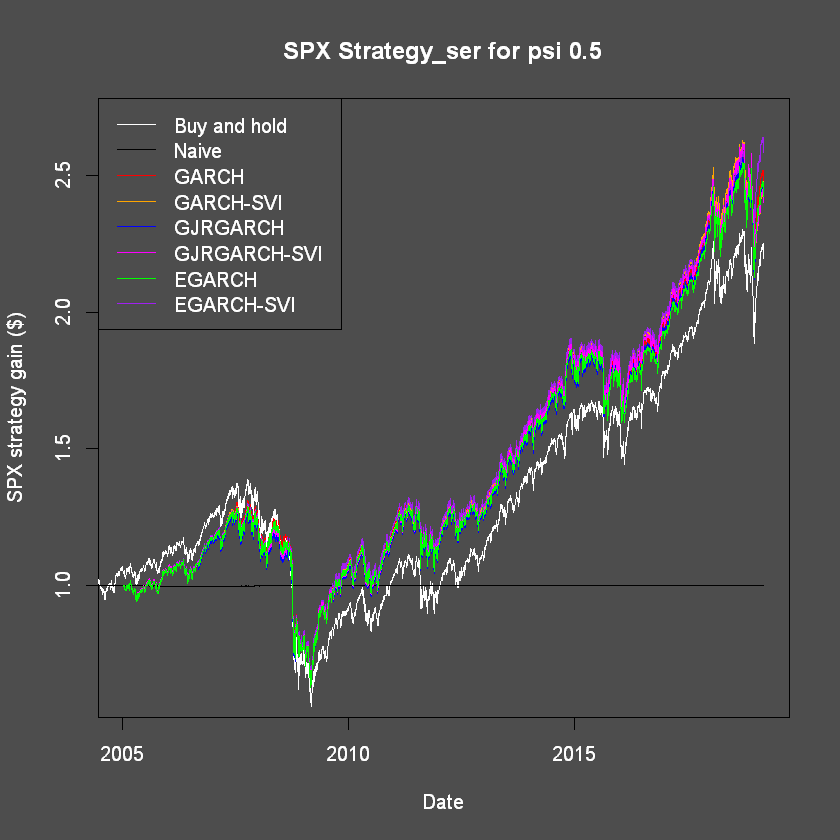

In [70]:
# Plot all 2d polts

par(bg = "grey30", col.axis = "white", col.lab = "white", col.main = "white", col.sub = "white")

plot(zoo(R_Active_GARCH11_p_cumulated_ser,
         as.Date(zoo::index(y_hat_d_GARCH11_ser[2:length(y_hat_d_GARCH11_ser)]))),
     cex.axis=1, type="l",col="red", xlab='Date', ylim=c(0.6,2.7), ylab='SPX strategy gain ($)', main=str_c("SPX Strategy_ser for psi ", p))
lines(zoo(R_cumulated,
          as.Date(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))),
      col = "white")
lines(zoo(R_Active_Naive_p_cumulated,
          as.Date(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))),
      col="black")
lines(zoo(R_Active_GARCH11SVI_p_cumulated_ser,
          as.Date(zoo::index(y_hat_d_GARCH11SVI_ser[2:length(y_hat_d_GARCH11SVI_ser)]))),
      col="orange")
lines(zoo(R_Active_EGARCH11SVI_p_cumulated_ser,
          as.Date(zoo::index(y_hat_d_EGARCH11SVI_ser[2:length(y_hat_d_EGARCH11SVI_ser)]))),
      col="purple")
lines(zoo(R_Active_GJRGARCH11_p_cumulated_ser,
          as.Date(zoo::index(y_hat_d_GJRGARCH11_ser[2:length(y_hat_d_GJRGARCH11_ser)]))),
      col="blue")
lines(zoo(R_Active_GJRGARCH11SVI_p_cumulated_ser,
          as.Date(zoo::index(y_hat_d_GJRGARCH11SVI_ser[2:length(y_hat_d_GJRGARCH11SVI_ser)]))),
      col="magenta")
lines(zoo(R_Active_EGARCH11_p_cumulated_ser,
          as.Date(zoo::index(y_hat_d_EGARCH11_ser[2:length(y_hat_d_EGARCH11_ser)]))),
      col="green")
legend(lty=1, cex=1,
       "topleft", col = c("white", "black", "red", "orange", "blue", "magenta", "green", "purple"), text.col = c("white"),
       legend=c("Buy and hold", "Naive", "GARCH", "GARCH-SVI", "GJRGARCH", "GJRGARCH-SVI", "EGARCH", "EGARCH-SVI"))

To get a narrower view of this graph, we can have a look at the difference between the (active) Buy & Hold model's output and the other's:

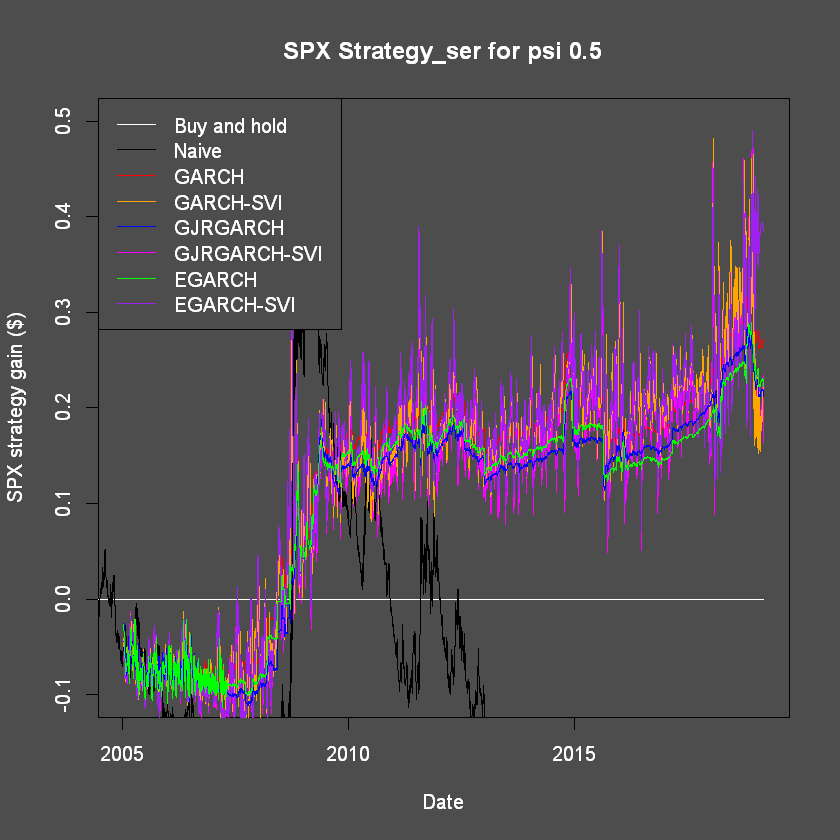

In [71]:
par(bg = "grey30", col.axis = "white", col.lab = "white", col.main = "white", col.sub = "white")

plot(zoo(R_Active_GARCH11_p_cumulated_ser - R_cumulated[(length(R_cumulated)-length(R_Active_GARCH11_p_cumulated_ser)+1):length(R_cumulated)],
         as.Date(zoo::index(y_hat_d_GARCH11_ser[2:length(y_hat_d_GARCH11_ser)]))),
     cex.axis=1, type="l",col="red", xlab='Date', ylim=c(-0.1,0.5), ylab='SPX strategy gain ($)', main=str_c("SPX Strategy_ser for psi ", p))
lines(zoo(R_Active_GJRGARCH11SVI_p_cumulated_ser - R_cumulated[(length(R_cumulated)-length(R_Active_GJRGARCH11SVI_p_cumulated_ser)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_GJRGARCH11SVI_ser[2:length(y_hat_d_GJRGARCH11SVI_ser)]))),
      col="magenta")
lines(zoo(R_cumulated - R_cumulated,
          as.Date(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))),
      col = "white")
lines(zoo(R_Active_Naive_p_cumulated - R_cumulated[(length(R_cumulated)-length(R_Active_Naive_p_cumulated)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))),
      col="black")
lines(zoo(R_Active_GARCH11SVI_p_cumulated_ser - R_cumulated[(length(R_cumulated)-length(R_Active_GARCH11SVI_p_cumulated_ser)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_GARCH11SVI_ser[2:length(y_hat_d_GARCH11SVI_ser)]))),
      col="orange")
lines(zoo(R_Active_EGARCH11SVI_p_cumulated_ser - R_cumulated[(length(R_cumulated)-length(R_Active_EGARCH11SVI_p_cumulated_ser)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_EGARCH11SVI_ser[2:length(y_hat_d_EGARCH11SVI_ser)]))),
      col="purple")
lines(zoo(R_Active_GJRGARCH11_p_cumulated_ser - R_cumulated[(length(R_cumulated)-length(R_Active_GJRGARCH11_p_cumulated_ser)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_GJRGARCH11_ser[2:length(y_hat_d_GJRGARCH11_ser)]))),
      col="blue")
lines(zoo(R_Active_EGARCH11_p_cumulated_ser - R_cumulated[(length(R_cumulated)-length(R_Active_EGARCH11_p_cumulated_ser)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_EGARCH11_ser[2:length(y_hat_d_EGARCH11_ser)]))),
      col="green")
legend(lty=1, cex=1,
       "topleft", col = c("white", "black", "red", "orange", "blue", "magenta", "green", "purple"), text.col = c("white"),
       legend=c("Buy and hold", "Naive", "GARCH", "GARCH-SVI", "GJRGARCH", "GJRGARCH-SVI", "EGARCH", "EGARCH-SVI"))

Note the variance shown in lines in the graph above does not represent their variance, only the variance in their level difference with the (active) Buy & Hold model's output. The fact that some lines look flatter than others simply portrays how is follows the B&H model.

### Parallel

Let's have a look at the cumulative returns of our trader following each of the strategies with estimates computed in parallel

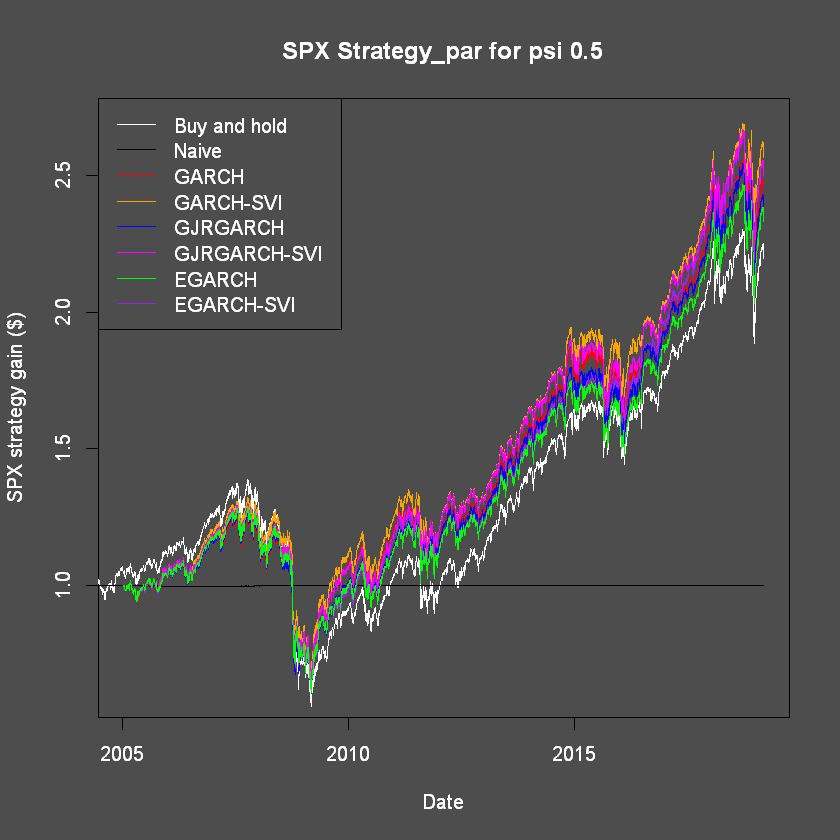

In [72]:
# Plot all 2d polts

par(bg = "grey30", col.axis = "white", col.lab = "white", col.main = "white", col.sub = "white")

plot(zoo(R_Active_GARCH11_p_cumulated_par,
         as.Date(zoo::index(y_hat_d_GARCH11_par[2:length(y_hat_d_GARCH11_par)]))),
     cex.axis=1, type="l",col="red", xlab='Date', ylim=c(0.6,2.7), ylab='SPX strategy gain ($)', main=str_c("SPX Strategy_par for psi ", p))
lines(zoo(R_cumulated,
          as.Date(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))),
      col = "white")
lines(zoo(R_Active_Naive_p_cumulated,
          as.Date(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))),
      col="black")
lines(zoo(R_Active_GARCH11SVI_p_cumulated_par,
          as.Date(zoo::index(y_hat_d_GARCH11SVI_par[2:length(y_hat_d_GARCH11SVI_par)]))),
      col="orange")
lines(zoo(R_Active_EGARCH11SVI_p_cumulated_par,
          as.Date(zoo::index(y_hat_d_EGARCH11SVI_par[2:length(y_hat_d_EGARCH11SVI_par)]))),
      col="purple")
lines(zoo(R_Active_GJRGARCH11_p_cumulated_par,
          as.Date(zoo::index(y_hat_d_GJRGARCH11_par[2:length(y_hat_d_GJRGARCH11_par)]))),
      col="blue")
lines(zoo(R_Active_GJRGARCH11SVI_p_cumulated_par,
          as.Date(zoo::index(y_hat_d_GJRGARCH11SVI_par[2:length(y_hat_d_GJRGARCH11SVI_par)]))),
      col="magenta")
lines(zoo(R_Active_EGARCH11_p_cumulated_par,
          as.Date(zoo::index(y_hat_d_EGARCH11_par[2:length(y_hat_d_EGARCH11_par)]))),
      col="green")
legend(lty=1, cex=1,
       "topleft", col = c("white", "black", "red", "orange", "blue", "magenta", "green", "purple"), text.col = c("white"),
       legend=c("Buy and hold", "Naive", "GARCH", "GARCH-SVI", "GJRGARCH", "GJRGARCH-SVI", "EGARCH", "EGARCH-SVI"))

To get a narrower view of this graph, we can have a look at the difference between the (active) Buy & Hold model's output and the other's:

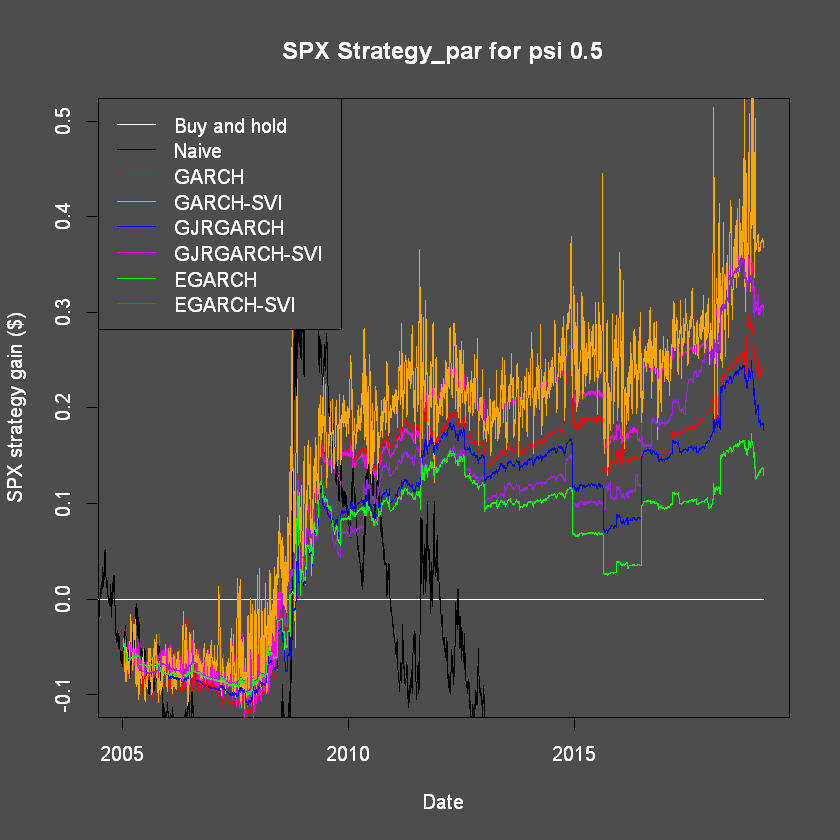

In [73]:
par(bg = "grey30", col.axis = "white", col.lab = "white", col.main = "white", col.sub = "white")

plot(zoo(R_Active_GARCH11_p_cumulated_par - R_cumulated[(length(R_cumulated)-length(R_Active_GARCH11_p_cumulated_par)+1):length(R_cumulated)],
         as.Date(zoo::index(y_hat_d_GARCH11_par[2:length(y_hat_d_GARCH11_par)]))),
     cex.axis=1, type="l",col="red", xlab='Date', ylim=c(-0.1,0.5), ylab='SPX strategy gain ($)', main=str_c("SPX Strategy_par for psi ", p))
lines(zoo(R_Active_GJRGARCH11SVI_p_cumulated_par - R_cumulated[(length(R_cumulated)-length(R_Active_GJRGARCH11SVI_p_cumulated_par)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_GJRGARCH11SVI_par[2:length(y_hat_d_GJRGARCH11SVI_par)]))),
      col="magenta")
lines(zoo(R_cumulated - R_cumulated,
          as.Date(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))),
      col = "white")
lines(zoo(R_Active_Naive_p_cumulated - R_cumulated[(length(R_cumulated)-length(R_Active_Naive_p_cumulated)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))),
      col="black")
lines(zoo(R_Active_GARCH11SVI_p_cumulated_par - R_cumulated[(length(R_cumulated)-length(R_Active_GARCH11SVI_p_cumulated_par)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_GARCH11SVI_par[2:length(y_hat_d_GARCH11SVI_par)]))),
      col="orange")
lines(zoo(R_Active_EGARCH11SVI_p_cumulated_par - R_cumulated[(length(R_cumulated)-length(R_Active_EGARCH11SVI_p_cumulated_par)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_EGARCH11SVI_par[2:length(y_hat_d_EGARCH11SVI_par)]))),
      col="purple")
lines(zoo(R_Active_GJRGARCH11_p_cumulated_par - R_cumulated[(length(R_cumulated)-length(R_Active_GJRGARCH11_p_cumulated_par)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_GJRGARCH11_par[2:length(y_hat_d_GJRGARCH11_par)]))),
      col="blue")
lines(zoo(R_Active_EGARCH11_p_cumulated_par - R_cumulated[(length(R_cumulated)-length(R_Active_EGARCH11_p_cumulated_par)+1):length(R_cumulated)],
          as.Date(zoo::index(y_hat_d_EGARCH11_par[2:length(y_hat_d_EGARCH11_par)]))),
      col="green")
legend(lty=1, cex=1,
       "topleft", col = c("white", "black", "red", "orange", "blue", "magenta", "green", "purple"), text.col = c("white"),
       legend=c("Buy and hold", "Naive", "GARCH", "GARCH-SVI", "GJRGARCH", "GJRGARCH-SVI", "EGARCH", "EGARCH-SVI"))

Note the variance shown in lines in the graph above does not represent their variance, only the variance in their level difference with the (active) Buy & Hold model's output. Similarly, sharp and instantaneous decreases or increases are not reflective of $\mathcal{R}_{SPX, j, t}$. The fact that some lines look flatter than others simply portrays how is follows the B&H model.

$$ \\ $$
Saving our data this far to help with de-bugging if needed:

In [74]:
save.image(file = "IDaSRP_work_space_p5.29.RData")
# # To restore your workspace, type this:
# load("IDaSRP_work_space_p5.29.RData")

$$ \\ $$
## Trading Strategy Results

This section investigates the financial implications of my work via the lens of a single
profit maximising agent deciding on whether to invest in the risk-free rate of the index host's
country (U.S.D. in this instance) or in the index itself. In this instance, the investor chooses
between the One-Month United States' Treasury Bill and the S&P 500.

$$ \\ $$
### Sharpe-Ratios

For completeness, Sharpe-Ratios of such $\mathcal{R}_{SPX, j, t}$ are also provided. They are defined as:

$$
\frac{ \mathcal{R}_{SPX, j, t} - \mathcal{R}_{f_{SPX}, t} }{ \sqrt{Var(\mathcal{R}_{SPX, j, t})} }
$$

where $\mathcal{R}_{f_{SPX}, t}$ is $r_{f_{SPX},t}$ equivalent to $\mathcal{R}_{SPX, j, t}$ above for `like-to-like' comparison such that $\mathcal{R}_{f_{SPX}, t} = \prod_{i=1}^{t} r_{f_{SPX},t} \text{ .}$

$$ \\ $$

#### Example of the computation of Sharpe-Ratios with $\mathcal{R}_{SPX, EGARCH11}$

- 1st: We need to compute $\mathcal{R}_{f_{SPX}}$ via $ \text{ } \mathbf{cumulative\_R\_f} =$ $\left[ \begin{matrix}
    \mathcal{R}_{f_{SPX}, 1} \\
    \mathcal{R}_{f_{SPX}, 2} \\
    \vdots\\
    \mathcal{R}_{f_{SPX}, {T_{cumulative\_R\_f}}}
\end{matrix} \right]
\text{ }$ where $t \in \mathbb{Z}$ and $ 1 \le t \ge T_{cumulative\_R\_f}$.

In [66]:
one_m_r_f = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30)
cumulative_R_f = matrix(,nrow=(length(one_m_r_f)-1))
for (i in c(2:(length(one_m_r_f))))
{cumulative_R_f[i] = prod((1 + one_m_r_f[2:i]))}
cumulative_R_f_zoo = zoo(cumulative_R_f,
                         as.Date(index(one_m_r_f)[2:(length(one_m_r_f))]))

- 2nd we need to know when the latest value for our $\mathcal{R}_{SPX, j, t}$ was recorded to match it with the equivalent value in $\mathcal{R}_{f_{SPX}, t}$

In [37]:
zoo(R_Active_EGARCH11_p_cumulated_par,
    as.Date(zoo::index(y_hat_d_EGARCH11_par[2:length(y_hat_d_EGARCH11_par)])))[length(R_Active_EGARCH11_p_cumulated_par)]

2019-03-13 
  2.383941 

In [71]:
time(zoo(R_Active_EGARCH11_p_cumulated_par,
         as.Date(zoo::index(y_hat_d_EGARCH11_par[2:length(y_hat_d_EGARCH11_par)])))[length(R_Active_EGARCH11_p_cumulated_par)])

[1] "2019-03-13"

In [72]:
cumulative_R_f_zoo[time(zoo(R_Active_EGARCH11_p_cumulated_par,
                            as.Date(zoo::index(y_hat_d_EGARCH11_par[2:length(y_hat_d_EGARCH11_par)])))[length(R_Active_EGARCH11_p_cumulated_par)])]

2019-03-13 
  1.168543 

- 3rd We can put it all together:

In [83]:
EGARCH11_Sharpe_Ratio1 = (
    (
        as.numeric(
            zoo(
                R_Active_EGARCH11_p_cumulated_par,
                as.Date(
                    zoo::index(
                        y_hat_d_EGARCH11_par[2:length(y_hat_d_EGARCH11_par)]
                    )
                )
            )[length(R_Active_EGARCH11_p_cumulated_par)]
        ) - as.numeric(cumulative_R_f_zoo[time(
            zoo(
                R_Active_EGARCH11_p_cumulated_par,
                as.Date(
                    zoo::index(
                        y_hat_d_EGARCH11_par[2:length(
                            y_hat_d_EGARCH11_par
                        )]
                    )
                )
            )[length(R_Active_EGARCH11_p_cumulated_par)])])
    )/(sd(R_Active_EGARCH11_p_cumulated_par)))

In [84]:
EGARCH11_Sharpe_Ratio1

[1] 2.816876

#### Generalisation (making an R function) of Sharpe-Ratio

In [79]:
Cumulated_Sharpe_Ratio  = function(cumulative_R_zoo, r_f_zoo){
    
    # Compute cumulative_R_f
    cumulative_R_f = matrix(,nrow=(length(r_f_zoo)-1))
    for (i in c(2:(length(r_f_zoo))))
    {cumulative_R_f[i] = prod((1 + r_f_zoo[2:i]))}
    cumulative_R_f_zoo = zoo(cumulative_R_f,
                             as.Date(index(r_f_zoo)[2:(length(r_f_zoo))]))
    
    # Calculate the cumulated_R_f
    cumulated_R_f = cumulative_R_f_zoo[time(cumulative_R_zoo[length(cumulative_R_zoo)])]
    
    # Calculate Cumulated_Sharpe_Ratio:
    Cumulated_Sharpe_Ratio = (
        (as.numeric(
            cumulative_R_zoo[length(
                cumulative_R_zoo
            )]) - as.numeric(
            cumulated_R_f
        )
        )/(sd(cumulative_R_zoo)))
    
    # return a list including r_f 0th and YTM 1st.
    return(Cumulated_Sharpe_Ratio)}

In [80]:
EGARCH11_Sharpe_Ratio = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_EGARCH11_p_cumulated_par,as.Date(zoo::index(y_hat_d_EGARCH11_par[2:length(y_hat_d_EGARCH11_par)]))),
                                               r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))

In [81]:
EGARCH11_Sharpe_Ratio

[1] 2.816876

#### Sharpe-Ratio of our $\mathcal{R}_{SPX, j}$

In [101]:
R_cumulated_Sharpe_Ratio = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_cumulated, as.Date(zoo::index(y_hat_d_Naive[2:length(y_hat_d_Naive)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))

In [103]:
GARCH11_Sharpe_Ratio_par = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_GARCH11_p_cumulated_par,as.Date(zoo::index(y_hat_d_GARCH11_par[2:length(y_hat_d_GARCH11_par)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
GARCH11SVI_Sharpe_Ratio_par = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_GARCH11SVI_p_cumulated_par,as.Date(zoo::index(y_hat_d_GARCH11SVI_par[2:length(y_hat_d_GARCH11SVI_par)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
GJRGARCH11_Sharpe_Ratio_par = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_GJRGARCH11_p_cumulated_par,as.Date(zoo::index(y_hat_d_GJRGARCH11_par[2:length(y_hat_d_GJRGARCH11_par)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
GJRGARCH11SVI_Sharpe_Ratio_par = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_GJRGARCH11SVI_p_cumulated_par,as.Date(zoo::index(y_hat_d_GJRGARCH11SVI_par[2:length(y_hat_d_GJRGARCH11SVI_par)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
EGARCH11_Sharpe_Ratio_par = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_EGARCH11_p_cumulated_par,as.Date(zoo::index(y_hat_d_EGARCH11_par[2:length(y_hat_d_EGARCH11_par)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
EGARCH11SVI_Sharpe_Ratio_par = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_EGARCH11SVI_p_cumulated_par,as.Date(zoo::index(y_hat_d_EGARCH11SVI_par[2:length(y_hat_d_EGARCH11SVI_par)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))

In [104]:
GARCH11_Sharpe_Ratio_ser = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_GARCH11_p_cumulated_ser,as.Date(zoo::index(y_hat_d_GARCH11_ser[2:length(y_hat_d_GARCH11_ser)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
GARCH11SVI_Sharpe_Ratio_ser = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_GARCH11SVI_p_cumulated_ser,as.Date(zoo::index(y_hat_d_GARCH11SVI_ser[2:length(y_hat_d_GARCH11SVI_ser)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
GJRGARCH11_Sharpe_Ratio_ser = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_GJRGARCH11_p_cumulated_ser,as.Date(zoo::index(y_hat_d_GJRGARCH11_ser[2:length(y_hat_d_GJRGARCH11_ser)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
GJRGARCH11SVI_Sharpe_Ratio_ser = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_GJRGARCH11SVI_p_cumulated_ser,as.Date(zoo::index(y_hat_d_GJRGARCH11SVI_ser[2:length(y_hat_d_GJRGARCH11SVI_ser)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
EGARCH11_Sharpe_Ratio_ser = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_EGARCH11_p_cumulated_ser,as.Date(zoo::index(y_hat_d_EGARCH11_ser[2:length(y_hat_d_EGARCH11_ser)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))
EGARCH11SVI_Sharpe_Ratio_ser = Cumulated_Sharpe_Ratio(cumulative_R_zoo = zoo(R_Active_EGARCH11SVI_p_cumulated_ser,as.Date(zoo::index(y_hat_d_EGARCH11SVI_ser[2:length(y_hat_d_EGARCH11SVI_ser)]))), r_f_zoo = ZCB_YTM_Implied_r_f(CMR = TRUS1MT_raw, Maturity = (1/12), D = 30))

In [111]:
rbind(as.data.table(list(Data_Set = "Buy_and_Hold", Sharpe_Ratio = R_cumulated_Sharpe_Ratio,
                         Cumulative_Return = R_cumulated[length(R_cumulated)])),
      as.data.table(list(Data_Set = "GARCH11_par", Sharpe_Ratio = GARCH11_Sharpe_Ratio_par,
                         Cumulative_Return = R_Active_GARCH11_p_cumulated_par[length(R_Active_GARCH11_p_cumulated_par)])),
      as.data.table(list(Data_Set = "GARCH11SVI_par", Sharpe_Ratio = GARCH11SVI_Sharpe_Ratio_par,
                         Cumulative_Return = R_Active_GARCH11SVI_p_cumulated_par[length(R_Active_GARCH11SVI_p_cumulated_par)])),
      as.data.table(list(Data_Set = "GARCH11_ser", Sharpe_Ratio = GARCH11_Sharpe_Ratio_ser,
                         Cumulative_Return = R_Active_GARCH11_p_cumulated_ser[length(R_Active_GARCH11_p_cumulated_ser)])),
      as.data.table(list(Data_Set = "GARCH11SVI_ser", Sharpe_Ratio = GARCH11SVI_Sharpe_Ratio_ser,
                         Cumulative_Return = R_Active_GARCH11SVI_p_cumulated_ser[length(R_Active_GARCH11SVI_p_cumulated_ser)])),
      as.data.table(list(Data_Set = "GJRGARCH11_par", Sharpe_Ratio = GJRGARCH11_Sharpe_Ratio_par,
                         Cumulative_Return = R_Active_GJRGARCH11_p_cumulated_par[length(R_Active_GJRGARCH11_p_cumulated_par)])),
      as.data.table(list(Data_Set = "GJRGARCH11SVI_par", Sharpe_Ratio = GJRGARCH11SVI_Sharpe_Ratio_par,
                         Cumulative_Return = R_Active_GJRGARCH11SVI_p_cumulated_par[length(R_Active_GJRGARCH11SVI_p_cumulated_par)])),
      as.data.table(list(Data_Set = "GJRGARCH11_ser", Sharpe_Ratio = GJRGARCH11_Sharpe_Ratio_ser,
                         Cumulative_Return = R_Active_GJRGARCH11_p_cumulated_ser[length(R_Active_GJRGARCH11_p_cumulated_ser)])),
      as.data.table(list(Data_Set = "GJRGARCH11SVI_ser", Sharpe_Ratio = GJRGARCH11SVI_Sharpe_Ratio_ser,
                         Cumulative_Return = R_Active_GJRGARCH11SVI_p_cumulated_ser[length(R_Active_GJRGARCH11SVI_p_cumulated_ser)])),
      as.data.table(list(Data_Set = "EGARCH11_par", Sharpe_Ratio = EGARCH11_Sharpe_Ratio_par,
                         Cumulative_Return = R_Active_EGARCH11_p_cumulated_par[length(R_Active_EGARCH11_p_cumulated_par)])),
      as.data.table(list(Data_Set = "EGARCH11SVI_par", Sharpe_Ratio = EGARCH11SVI_Sharpe_Ratio_par,
                         Cumulative_Return = R_Active_EGARCH11SVI_p_cumulated_par[length(R_Active_EGARCH11SVI_p_cumulated_par)])) ,
      as.data.table(list(Data_Set = "EGARCH11_ser", Sharpe_Ratio = EGARCH11_Sharpe_Ratio_ser,
                         Cumulative_Return = R_Active_EGARCH11_p_cumulated_ser[length(R_Active_EGARCH11_p_cumulated_ser)])),
      as.data.table(list(Data_Set = "EGARCH11SVI_ser", Sharpe_Ratio = EGARCH11SVI_Sharpe_Ratio_ser,
                         Cumulative_Return = R_Active_EGARCH11SVI_p_cumulated_ser[length(R_Active_EGARCH11SVI_p_cumulated_ser)])))

Data_Set,Sharpe_Ratio,Cumulative_Return
<chr>,<dbl>,<dbl>
Buy_and_Hold,2.738442,2.253220
GARCH11_par,2.870103,2.487054
GARCH11SVI_par,2.980150,2.623453
GARCH11_ser,2.905228,2.518621
GARCH11SVI_ser,2.770977,2.478100
GJRGARCH11_par,2.766061,2.430767
GJRGARCH11SVI_par,2.852719,2.555329
GJRGARCH11_ser,2.821888,2.466335
GJRGARCH11SVI_ser,2.669043,2.418233


Over all, the SVI_par model was always the best performing bar the EGARCHSVI_ser that performed [exceptionally well](https://www.investopedia.com/ask/answers/010815/what-good-sharpe-ratio.asp#:~:text=Usually%2C%20any%20Sharpe%20ratio%20greater,1.0%20is%20considered%20sub%2Doptimal.). It is also interesting to note that the SVI models always outperformed the non-SVI ones both in terms of returns and Sharpe-Ratios.

$$ \\ $$
## Conclusion

$$ \\ $$


This article replicated part of the work of CPV (Chronopoulos et al. (2018)) on the SPX. It empirically investigates the explanatory and predictive powers of Google Trends data as a proxy for information demand in a series of GARCH models and using the C\&D (Christoffersen and Diebold (2006)) framework. In the interest of time, I empirically studied the financial implications of my findings, but not their economic significance, inferring them instead from financial and graphical analyses.

$$ \\ $$

Before moving on any further, it must be noted that I externally investigated the effect of using different Google Trends draw (SVIs) and found that they may impact results. However, the conclusion and the relative performance of each model were the same.
I would also like to note that further external analysis additionally indicated that investors clued into its forecasting models' effectiveness and reduced their performance over time by using it - in a similar fashion as in Simon (1955).

Findings above also highlighted how the inclusion of a single external variable in recursive models - namely $\Delta$SVI - is extremely limiting as it does not allow for the inclusion of new variables that may become relevant due to structural changes in domestic economies. It is unrealistic to expect a priori knowledge of all variables affecting asset price change sign movements.
One may attempt to use other factors in combination with dummy variables to anticipate when they should apply ex ante (Pesaran and Timmermann (2000)) such as in Vlastakis and Markellos (2012) where a dummy variable is attached to $\Delta$SVI for low and high economic states (when returns dropped or rose by more than one standard deviation in a week).


$$ \\ $$

These particular predictive challenges - however - do not seem to be caused by the model constructions. Original tests on the use of Google Trends data in SPX’s excess return variance forecasts were positive. SPX excess return sign forecasts compiled via C\&D's framework also proved more successful to a profit maximising agent trading daily than comparable buy-and- hold and naive model forecasts.

One must - however - be careful when interpreting these results. Graphical analyses indicated that models tend not to foresee economic crashes, and that an application of my strategy may not be superior to buy-and-hold's at any time.

Moreover, it would be interesting to investigate the optimal risk-aversion level one ought to have to maximise their profits; *i.e.*: the optimal level of $\psi$.

Furthermore, SPX SVI-implementing strategies worked remarkably well despite their variance forecasting models performing at a level that could not be determined in comparison to their SVI-free counterparts. This could be indicative of SVI-implementation in C\&D's models as useful in surprising ways - not in aiding variance forecasting, but in channelling its predictive powers via variance forecasting other than by improving it, possibly by reducing only Type II or Type I errors. Further studies on this aspect of results above would be enlightening.

$$ \\ $$

In conclusion, further studies are needed to statistically-significantly propose that Google Trends can be used in forecasting the sign of index excess return at a daily frequency. Indeed, Google Trends data may have changed in minute but substantial ways - possibly since the introduction of caffeine on the 8th of June 2010. It may be enlightening to look into structural changes in $\Delta$SVI at that time before implementing it in this study.

Moreover, it would be compelling to continue the work above with a draw of SVI for other indices only for their respective country region – *e.g.*: for the FTSE and the U.K.. Extending the logic in Preis et al. (2013), one may find more robust findings this way.

Furthermore, only AR and GARCH models of order one were used in my (and CPV's) paper. It may be revealing to see how Rt or $\Delta$SVI of further lags may pick up on cyclical trends (that can be seen in the graph of our SVI). One may attempt and find their best orders via Information Criteria analyses akin to in Brooks and Burke (1998).

Following from the study in Fleming, Kirby, and Ostdiek (2003), models using Realised Volatility instead of the Moving Average components of the GARCH models($\sigma_{t-1}$) could also be a novel implementation to improve volatility forecasts and see their repercussions in C\&D's model.

In this study, excess returns from our strategy were computed using a risk-free rate based on the change in the same bond's market price from one day to the next; this is not quite so conventional. In order to produce findings more comparable with others in similar fields , one ought to re-create this study using a YTM implied daily risk-free rate.

Investigating the different forecasting models via the Henriksson and Merton (1981) test of market timing would be extremely interesting as well.

An attempt at the above profit maximising strategies over any period of time may also be revealing. They proved useful over our time periods, but that does not constitute of proof that it is the case for any period. These strategies only showed their use following the 2008 crisis and did not foresee significant economic crashes due to its short forecasting horizon. This leads to believe that longer horizons with lower frequency data - such as weekly data – could be easier to forecast and thus more accurate - as per Preis et al. (2013). This strategy would also allow for lower trading costs and improved overall performance.

Finally, and most obviously, one ought to complete this article’s work on the SPX and investigate the economic significance of the findings above in an empirical manner using Granger and Pesaran (2000)'s framework and implement trading costs in analyses.


$$ \\ $$

## Appendix

$$ \\ $$

## Literature Review


Whilst a family of GARCH models are used in this thesis to remedy the particular issue
of heteroscedasticity modelling, the task of predicting asset prices remains notoriously difficulties;
often, "even the best prediction models have no out-of-sample forecasting powers" (Bossaerts
and Hillion (1999), p.405) (e.g.: Kostakis, Magdalinos, and Stamatogiannis (2014)). This is
what motivated C&D to challege such difficulties by demonstrating how correlations between
asset price volatilities and returns arise given non-zero expected returns irrespective of the
shape of their distribution. When expected returns are zero, Christoffersen, Diebold, Mariano,
Tay, and Tse (2006) (CDMTT hereon) highlighted that sign prediction was still possible with
asymmetrically distributed returns - in alignment with SFFR (i).


Market participants try to inform themselves optimally prior to trading (Simon (1955)).
Therefore, risk aversion and information demand are closely related, it is thus so for investment
activities too, that in turn cause asset price changes. While model specifications such as
C&D's are naturally of paramount importance, numerous economists also investigated the explanatory
powers of exogenous variables in forecasting models since Keynes' study on Business
Cycles (e.g.: Fama and French (1996), famously).


CPV novelly incorporated such a variable - information demand - in these models to study
their forecasting powers. While a plethora of studies investigated how asset prices are affected/correlated with information demand indexed via Wikipedia (Moat et al. (2013); Rubin and
Rubin (2010)), online message boards (Antweiler and Frank (2004)), et cetera (Vlastakis and
Markellos (2012)), Google Trends stood out as particularly useful in finance (Da, Engelberg, and
Gao (2011); Preis, Moat, and Stanley (2013)). The prevalence of Google as the internationally
dominant search-engine allowed for the use of Google Trends in academia with varying degrees
of accuracy in (science (Pelat, Turbelin, Bar-Hen, Flahault, and Valleron (2009)), economics
(Askitas and Zimmermann (2009)), and) finance (Choi and Varian (2012); Curme, Preis, Stanley,
and Moat (2014), and Jiang (2016)). It is best to note that Google is not strictly dominant in all countries. Notable exceptions exist in South Korea (with Naver), Russia (with Yandex) and China (with Baidu). Vlastakis and Markellos (2012) found that financial
information-networks (e.g.: Reuters, Bloomberg, ...) tend to share articles outside their platforms
and lead to information arriving in traditional and non-traditional information-channels
at approximately the same time; Google Trends can thus be used to measure signals of investor
interests in certain topics/assets and that there is a relationship between the information demand
of an asset and its return's volatility.


CPV thus used Google Trends data as a proxy for information demand in the form of a
Search Vector Index (SVI). They found evidence of distribution asymmetry in the SPX excess
returns - allowing for the application of CDMTT's work - as well as a clear and statistically significant relationship between those returns and the first difference in SVI - $\Delta$SVI - using
a family of GARCH models which were then used in C&D's framework. This proved highly
successful: when testing their findings using Granger and Pesaran (2000)'s framework over the
time period extending from the 1st of January 2004 to the 31st of December 2016 (01/01/2004 - 31/12/2016), their scenario analysis resulted in higher Sharpe-ratios (Sharpe (1966)) when
implementing SVIs in an active strategy compared to a naive or a buy-and-hold (B&H) strategy
for a utility maximising investor acting with a Constant Absolute Risk Aversion (i.e.: with a
negative exponential utility function) with and without short-selling. It is also interesting to
note that short- and long-term interest rates were shown to have smaller - but still significant -
predictive powers when using monthly data (comparing CPV's findings to Nyberg (2011) and
Chevapatrakul (2013)'s) suggesting that higher frequency data - such as $\Delta$SVI - may be of
better use.

$$ \\ $$

### References

- Anand, A., Irvine, P., Puckett, A., & Venkataraman, K. (2011). Performance of institutional trading desks: An analysis of persistence in trading costs. The Review of Financial Studies, 25 (2), 557-598.
- Andersen, T. G., Bollerslev, T., Diebold, F. X., & Ebens, H. (2001). The distribution of realized stock return volatility. Journal of financial economics, 61 (1), 43-76.
- Antweiler, W., & Frank, M. Z. (2004). Is all that talk just noise? the information content of internet stock message boards. The Journal of finance, 59 (3), 1259-1294.
- Askitas, N., & Zimmermann, K. F. (2009). Google econometrics and unemployment forecasting. SSRN Electronic Journal.
- Awartani, B. M., & Corradi, V. (2005). Predicting the volatility of the s&p-500 stock index via garch models: the role of asymmetries. International Journal of Forecasting, 21 (1), 167-183.
- Barndorff-Nielsen, O. E., & Shephard, N. (2002). Econometric analysis of realized volatility and its use in estimating stochastic volatility models. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 64 (2), 253-280.
- Bollerslev, T. (1986). Generalized autoregressive conditional heteroskedasticity. Journal of econometrics, 31 (3), 307-327.
- Booth, G., & Gurun, U. (2004). Financial archaeology: Capitalism, financial markets, and price volatility. Michigan State University.
- Bossaerts, P., & Hillion, P. (1999). Implementing statistical criteria to select return forecasting models: what do we learn? The Review of Financial Studies, 12 (2), 405.
- Brier, G. W. (1950). Verification of forecasts expressed in terms of probability. Monthly weather review, 78 (1), 1-3.
- Brooks, C., & Burke, S. P. (1998). Forecasting exchange rate volatility using conditional variance models selected by information criteria. Economics Letters, 61 (3), 273-278.
- Chevapatrakul, T. (2013). Return sign forecasts based on conditional risk: Evidence from the uk stock market index. Journal of Banking & Finance, 37 (7), 2342-2353.
- Choi, H., & Varian, H. (2012). Predicting the present with google trends. Economic Record, 88 , 2-9.
- Christoffersen, P., & Diebold, F. X. (2006). Financial asset returns, direction-of-change forecasting, and volatility dynamics. Management Science, 52 (8), 1273-1287.
- Christoffersen, P., Diebold, F. X., Mariano, R. S., Tay, A. S., & Tse, Y. K. (2006). Directionof-change forecasts based on conditional variance, skewness and kurtosis dynamics: international evidence.
- Chronopoulos, D. K., Papadimitriou, F. I., & Vlastakis, N. (2018). Information demand and stock return predictability. Journal of International Money and Finance, 80 , 59-74. Retrieved from https://www.sciencedirect.com/science/article/pii/S0261560617301912?via%3Dihub
- Curme, C., Preis, T., Stanley, H. E., & Moat, H. S. (2014). Quantifying the semantics of search behavior before stock market moves. Proceedings of the National Academy of Sciences, 111 (32), 11600-11605.
- Da, Z. H., Engelberg, J., & Gao, P. (2011). In search of attention. The Journal of Finance, 66 (5), 1461-1499.
- Dave Davis. (2017). Google's caffeine update: Better indexing & fresher search results. Retrieved 29/08/2019, from https://www.searchenginejournal.com/google-algorithm-history/caffeine-update/
- Dickey, D. A., & Fuller, W. A. (1979). Distribution of the estimators for autoregressive time series with a unit root. Journal of the American statistical association, 74 (366a), 427-431.
- Diebold, F. X., & Mariano, R. S. (1995). Comparing predictive accuracy. Journal of Business and Economic Statistics, 13 (3), 253-263.
- Economist, T. (8th of Febuary 2018). Bets on low market volatility went spectacularly wrong: Vexed about vix. The Economist, Slowbalisation(Print edition | Finance and economics). Retrieved 19th of August 2019, from https://www.economist.com/finance-and-economics/2018/02/08/bets-on-low-market-volatility-went-spectacularly-wrong
- Engle, R. F. (1982). Autoregressive conditional heteroscedasticity with estimates of the variance of united kingdom in ation. Econometrica: Journal of the Econometric Society, 987-1007.
- Fama, E. F., & French, K. R. (1996). Multifactor explanations of asset pricing anomalies. The journal of finance, 51 (1), 55-84.
- Fleming, J., Kirby, C., & Ostdiek, B. (2003). The economic value of volatility timing using "realized" volatility. Journal of Financial Economics, 67 (3), 473-509.
- Glosten, L. R., Jagannathan, R., & Runkle, D. E. (1993). On the relation between the expected value and the volatility of the nominal excess return on stocks. The journal of finance, 48 (5), 1779-1801.
- Granger, C. W., & Pesaran, M. H. (2000). Economic and statistical measures of forecast accuracy. Journal of Forecasting, 19 (7), 537-560.
- Harrison, P. (1998). Similarities in the distribution of stock market price changes between the eighteenth and twentieth centuries. The Journal of Business, 71 (1), 55-79.
- Henriksson, R. D., & Merton, R. C. (1981). On market timing and investment performance. ii. statistical procedures for evaluating forecasting skills. Journal of business, 513-533.
- Jiang, W. (2016). Stock market valuation using internet search volumes: Us-china comparison. Kandel, S., & Stambaugh, R. F. (1996). On the predictability of stock returns: an assetallocation perspective. The Journal of Finance, 51 (2), 385-424.
- Kostakis, A., Magdalinos, T., & Stamatogiannis, M. P. (2014). Robust econometric inference for stock return predictability. The Review of Financial Studies, 28 (5), 1506-1553.
- Lesmond, D. A., Ogden, J. P., & Trzcinka, C. A. (1999). A new estimate of transaction costs. The Review of Financial Studies, 12 (5), 1113-1141.
- Lo, A. W. (2005). Reconciling efficient markets with behavioral finance: the adaptive markets hypothesis. Journal of investment consulting, 7 (2), 21-44.
- Mandelbrot, B. (1963). The variation of certain of certain speculative. Journal of Finance, 36 , 418.
- Mitchell, H., Brown, R., & Easton, S. (2002). Old volatility-arch effects in 19th century consol data. Applied Financial Economics, 12 (4), 301-307.
- Moat, H. S., Curme, C., Avakian, A., Kenett, D. Y., Stanley, H. E., & Preis, T. (2013). Quantifying wikipedia usage patterns before stock market moves. Scientific Reports, 3 (1), 269.
- N., J., & Wold, H. (1939). A study in analysis of stationary time series. Journal of the Royal Statistical Society, 102 (2), 295.
- Nelson, D. B. (1991). Conditional heteroskedasticity in asset returns: A new approach. Econo-metrica: Journal of the Econometric Society, 347-370.
- Nyberg, H. (2011). Forecasting the direction of the us stock market with dynamic binary probit models. International Journal of Forecasting, 27 (2), 561-578.
- Pelat, C., Turbelin, C., Bar-Hen, A., Flahault, A., & Valleron, A.-J. (2009). More diseases tracked by using google trends. Emerging infectious diseases, 15 (8), 1327.
- Pesaran, M. H., & Timmermann, A. (1995). Predictability of stock returns: Robustness and economic significance. The Journal of Finance, 50 (4), 1201-1228.
- Pesaran, M. H., & Timmermann, A. (2000). A recursive modelling approach to predicting uk stock returns. The Economic Journal, 110 (460), 159-191.
- Phillips, P. C., & Perron, P. (1988). Testing for a unit root in time series regression. Biometrika, 75 (2), 335-346.
- Poon, S.-H., & Granger, C. W. (2003). Forecasting volatility in financial markets: A review. Journal of economic literature, 41 (2), 478-539.
- Preis, T., Moat, H. S., & Stanley, H. E. (2013). Quantifying trading behavior in financial markets using google trends.
- Rapach, D., & Zhou, G. (2013). Forecasting stock returns. In Handbook of economic forecasting (Vol. 2, pp. 328-383). Elsevier.
- Rubin, A., & Rubin, E. (2010). Informed investors and the internet. Journal of Business Finance & Accounting, 37 (7-8), 841-865.
- Sharpe, W. F. (1966). Mutual fund performance. The Journal of business, 39 (1), 119-138.
- Silk, M. J. (2012). Link between s&p 500 and ftse 100 and the comparison of that link before and after the s&p 500 peak in october 2007. Lingnan Journal of Banking, Finance and Economics, 3 (1), 3.
- Simon, H. A. (1955). A behavioral model of rational choice. The quarterly journal of economics, 69 (1), 99-118.
- Taylor, S. J. (2005). Asset price dynamics, volatility, and prediction. Princeton university press.
- Timmermann, A., & Granger, C. W. (2004). Efficient market hypothesis and forecasting. International Journal of forecasting, 20 (1), 15-27.
- Tinbergen, J. (1933). Statistiek en wiskunde in dienst van het konjunktuuronderzoek: Statistics and mathematics in the service of business cycle research. Netherlands School of Economics.
- Tong, H. (1990). Non-linear time series: a dynamical system approach. Oxford University Press.
- Verbeek, M. (2008). A guide to modern econometrics (2nd ed.). John Wiley & Sons. Vlastakis, N., & Markellos, R. N. (2012). Information demand and stock market volatility. Journal of Banking & Finance, 36 (6), 1808-1821.
- Whittle, P. (1951). Hypothesis testing in time series analysis.
- Yule, G. U. (1927). On a method of investigating periodicities in disturbed series, with special reference to wolfer's sunspot numbers. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 226 (636-646), 267-298.

$$ \\ $$

### df

In [28]:
as_tibble(df, rownames = NA)

,S.PCOMP,TRUS1MT,TRUS3MT,TRUS10T,US_1MO_r_f,SPX_R,SPX_RV,SPX_SVI,SPX_dSVI
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004-01-05,1122.22,0.865,0.917,4.384,-8.262244e-06,0.0124036144,0.005919711,16,2
2004-01-06,1123.67,0.875,0.922,4.275,-8.261425e-06,0.0013003432,0.004468624,23,7
2004-01-07,1126.33,0.855,0.897,4.246,1.652387e-05,0.0023507192,0.005380438,14,-9
2004-01-08,1131.92,0.875,0.866,4.258,-1.652360e-05,0.0049795451,0.005636016,15,1
2004-01-09,1121.85,0.855,0.861,4.084,1.652387e-05,-0.0089129123,0.008299253,9,-6
2004-01-14,1130.52,0.835,0.876,3.997,1.239564e-05,0.0082821407,0.004631834,10,1
2004-01-15,1132.05,0.805,0.866,3.974,2.479697e-05,0.0013285625,0.007092478,7,-3
2004-01-16,1139.83,0.780,0.871,4.016,2.066974e-05,0.0068518182,0.005964541,14,7
2004-01-20,1138.77,0.770,0.866,4.063,1.653781e-05,-0.0009465010,0.004815061,7,-7
